# Machine Failure Prediction

## 1. Data Preparation

### 1.1 Installing & Importing Library

In [ ]:
import keras
print(keras.__version__)

2.9.0


In [ ]:
pip install EMD-signal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 7.4 MB/s eta 0:00:00


In [ ]:
from PyEMD import EMD

In [ ]:
# !git clone https://github.com/titu1994/Keras-just-another-network-JANET

In [ ]:
# !git clone https://github.com/JosvanderWesthuizen/janet

In [ ]:
# import sys
# sys.path.insert(0,'/content/janet/requirements.txt')

In [ ]:
from scipy.io import loadmat

In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os 
import scipy
import math
import keras
from scipy.stats import entropy
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit
from scipy import signal

In [ ]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### 1.2 Downloading Data

#### 1.2.1 Data IMS

In [ ]:
colnames = ['b1_x','b1_y','b2_x','b2_y','b3_x','b3_y','b4_x','b4_y']
data_1 = pd.read_csv('gdrive/MyDrive/IMS/1st_test/1st_test/2003.10.22.12.06.24',sep='\t',names=colnames)

In [ ]:
data_1.head()

,b1_x,b1_y,b2_x,b2_y,b3_x,b3_y,b4_x,b4_y
0,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
1,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122
2,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071
3,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078
4,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066


In [ ]:
dataset_path_1st = 'gdrive/MyDrive/IMS/1st_test/1st_test'
dataset_path_2nd = 'gdrive/MyDrive/IMS/2nd_test/2nd_test'
dataset_path_3rd = 'gdrive/MyDrive/IMS/3rd_test/4th_test/txt'

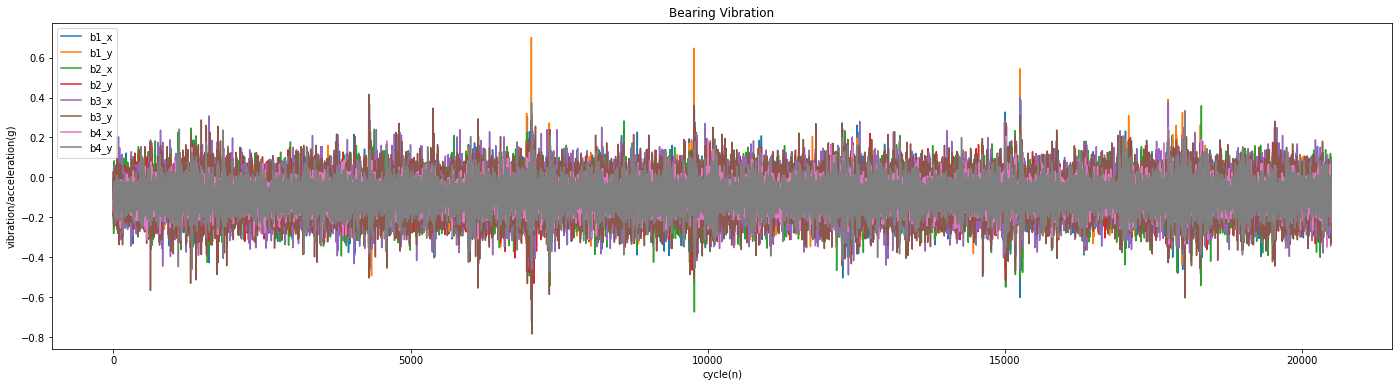

In [ ]:
colnames = ['b1_x','b1_y','b2_x','b2_y','b3_x','b3_y','b4_x','b4_y']
dataset = pd.read_csv('gdrive/MyDrive/IMS/1st_test/1st_test/2003.10.22.12.06.24', sep='\t',names=colnames)
ax = dataset.plot(figsize = (24,6), title= "Bearing Vibration" , legend = True)
ax.set(xlabel="cycle(n)", ylabel="vibration/acceleration(g)")
plt.show()

#### 1.2.2 Data CWRU

In [ ]:
from scipy.io import loadmat

In [ ]:
path = '/content/gdrive/MyDrive/IMS/CWRU Data/12DriveEndFault/1730/0.007-Ball.mat'


temp_x = loadmat(path)

[i for x in temp_x[list((temp_x.keys()))[3]] for i in x]

[0.09031393213572854,
 0.22497265469061875,
 -0.1088315369261477,
 -0.18533848303393216,
 0.04791836327345309,
 0.0222536127744511,
 -0.0839789620758483,
 0.0402839121756487,
 0.08885201596806389,
 0.008933932135728542,
 -0.010233413173652695,
 0.08706522954091817,
 0.02339065868263473,
 -0.18956179640718565,
 -0.06481161676646706,
 0.1611356487025948,
 0.06010099800399202,
 0.0222536127744511,
 0.19053640718562875,
 0.11224267465069859,
 -0.10444578842315369,
 -0.07959321357285429,
 0.05474063872255489,
 -0.028913453093812373,
 -0.18111516966067864,
 -0.010395848303393213,
 0.14001908183632736,
 -0.01835516966067864,
 -0.08998906187624751,
 0.05116706586826347,
 0.10298387225548902,
 -0.01900491017964072,
 -0.08982662674650697,
 -0.0032487025948103793,
 0.13530846307385228,
 0.11938982035928143,
 -0.039471736526946105,
 -0.13222219560878243,
 -0.03005049900199601,
 0.04564427145708583,
 -0.08300435129740519,
 -0.14602918163672654,
 -0.04808079840319361,
 0.07959321357285429,
 0.036710

In [ ]:
list(temp_x.keys())

['__header__',
 '__version__',
 '__globals__',
 'X121_DE_time',
 'X121_FE_time',
 'X121_BA_time',
 'X121RPM']

In [ ]:
data_dir = '/content/gdrive/MyDrive/IMS/CWRU Data/48DriveEndFault/1730'

def dir_to_data(data_dir,rpm):
  arr_data=[]
  arr_indeks=[]
  for filename in (np.sort(os.listdir(data_dir))):
    files=data_dir + filename
    temp_x = loadmat(files)

    for i in list((temp_x.keys())):
      if(str(type(temp_x[i]))=='<class \'numpy.ndarray\'>' and len(temp_x[i])>1):
        arr_data.append([i for x in temp_x[i] for i in x])
        arr_indeks.append(i)
    

    arr_data.append([rpm for i in range(len(arr_data[0]))])
    arr_data.append([filename for i in range(len(arr_data[0]))])
    arr_indeks.append('rpm')
    arr_indeks.append('fault')

    # arr_transpose=np.transpose(arr_data)
  return arr_data,arr_indeks

In [ ]:
data_dir = '/content/gdrive/MyDrive/IMS/CWRU Data/NormalBaseline/1750/Normal.mat'

loadmat(data_dir)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 11:19:25 2000',
 '__version__': '1.0',
 '__globals__': [],
 'ans': array([[1]], dtype=uint8),
 'X098_DE_time': array([[ 0.046104  ],
        [-0.03713354],
        [-0.089496  ],
        ...,
        [-0.09909231],
        [-0.10827138],
        [-0.07092923]]),
 'X098_FE_time': array([[ 0.02321636],
        [ 0.08115455],
        [ 0.09533091],
        ...,
        [-0.00760182],
        [ 0.04026909],
        [ 0.06102   ]]),
 'X099_DE_time': array([[ 0.06425354],
        [ 0.06300185],
        [-0.00438092],
        ...,
        [ 0.00521538],
        [-0.06571385],
        [-0.12266585]]),
 'X099_FE_time': array([[0.03862545],
        [0.09676909],
        [0.12738182],
        ...,
        [0.03164   ],
        [0.113     ],
        [0.16292545]])}

###### Buat data yg normal

In [ ]:
data_dir = '/content/gdrive/MyDrive/IMS/CWRU Data/NormalBaseline/'

merged_data=pd.DataFrame()

for filename in (np.sort(os.listdir(data_dir))):
  temp_dir = data_dir + filename + '/'
  
  arr_1,indeks_1=dir_to_data(temp_dir,filename)
  
  try:
    merged_data=pd.concat([merged_data,pd.DataFrame(arr_1,columns=indeks_1)],axis=1)
  except:
    if(filename=='1750'):
      arr_1_1750=arr_1
      indeks_1_1750=indeks_1
    merged_data=pd.concat([merged_data,pd.DataFrame({
        indeks_1[0]:arr_1[0][:483903],
        indeks_1[1]:arr_1[1][:483903],
        indeks_1[2]:arr_1[2][:483903],
        indeks_1[3]:arr_1[3][:483903],
        indeks_1[4]:arr_1[4][:483903],
        indeks_1[5]:arr_1[5][:483903]
    })],axis=1)
    print()

IndexError: ignored

In [ ]:
merged_data

In [ ]:
merged_data.to_csv('data_normal.csv')

In [ ]:
dir_to_data(data_dir)

###### Fault 1

In [ ]:
data_dir = '/content/gdrive/MyDrive/IMS/CWRU Data/48DriveEndFault/1797/'

temp_data_1730=dir_to_data(data_dir,1797)

In [ ]:
temp_data_1730[1][0]

In [ ]:
data_1730=pd.DataFrame(temp_data_1730[0]).transpose()
data_1730.columns=temp_data_1730[1]
data_1730.to_csv('data_48k_1797.csv')

In [ ]:
data_dir = '/content/gdrive/MyDrive/IMS/CWRU Data/12DriveEndFault/'

merged_data=pd.DataFrame()

for filename in (np.sort(os.listdir(data_dir))):
  temp_dir = data_dir + filename + '/'
  print(temp_dir)
  arr_1,indeks_1=dir_to_data(temp_dir,filename)
  
  try:
    merged_data=pd.concat([merged_data,pd.DataFrame(arr_1,columns=indeks_1)],axis=1)
  except:
    if(filename=='1750'):
      arr_1_1750=arr_1
      indeks_1_1750=indeks_1
    merged_data=pd.concat([merged_data,pd.DataFrame({
        indeks_1[0]:arr_1[0][:483903],
        indeks_1[1]:arr_1[1][:483903],
        indeks_1[2]:arr_1[2][:483903],
        indeks_1[3]:arr_1[3][:483903],
        indeks_1[4]:arr_1[4][:483903],
        indeks_1[5]:arr_1[5][:483903]
    })],axis=1)
    print(filename)

In [ ]:
merged_data

###### Manual

In [ ]:
data_dir = '/content/gdrive/MyDrive/IMS/CWRU Data/NormalBaseline/1730/'
merged_data = pd.DataFrame()

for filename in (np.sort(os.listdir(data_dir))):
  try:
    temp=data_dir + filename
    data = loadmat(temp)
    print(filename)
    print(data[list(data.keys())[4]])
    xx = pd.DataFrame([i for x in data[list(data.keys())[4]] for i in x])

    temp_rms=[]
    temp_max=[]
    temp_min=[]
    temp_skew=[]
    temp_entropy=[]
    temp_mean_abs=[]
    temp_std=[]
    temp_kurtosis=[]
    temp_p2p=[]
    temp_clearence=[]
    temp_max_abs=[]
    for i in range(0,xx.shape[0],1000):
      if(i+1000<(xx.shape[0])):
        temp_rms.append(calculate_rms(xx.iloc[i:(i+1000),:]))
        temp_max.append(xx.iloc[i:(i+1000),:].max())
        temp_min.append(xx.iloc[i:(i+1000),:].min())
        temp_skew.append(xx.iloc[i:(i+1000),:].skew())
        temp_entropy.append(calculate_entropy(xx.iloc[i:(i+1000),:]))
        temp_mean_abs.append(xx.iloc[i:(i+1000),:].abs().mean())
        temp_std.append(xx.iloc[i:(i+1000)].std())
        temp_kurtosis.append(xx.iloc[i:(i+1000)].kurtosis())
        temp_p2p.append(calculate_p2p(xx.iloc[i:(i+1000)]))
        temp_clearence.append(calculate_clearence(xx.iloc[i:(i+1000)]))
        temp_max_abs.append(xx.iloc[i:(i+1000),:].abs().max())

        temp_impulse=[temp_max_abs[i] / temp_mean_abs[i] for i in range(len(temp_max_abs))]
        temp_shape = [temp_rms[i] / temp_mean_abs[i] for i in range(len(temp_rms))]
        crest = [temp_max_abs[i]/temp_rms[i] for i in range(len(temp_max_abs))]

      else:
        temp_rms.append(calculate_rms(xx.iloc[i:xx.shape[0],:]))
        temp_max.append(xx.iloc[i:xx.shape[0],:].max())
        temp_min.append(xx.iloc[i:xx.shape[0],:].min())
        temp_skew.append(xx.iloc[i:xx.shape[0],:].skew())
        temp_entropy.append(calculate_entropy(xx.iloc[i:xx.shape[0],:]))
        temp_mean_abs.append(xx.iloc[i:xx.shape[0],:].abs().mean())
        temp_std.append(xx.iloc[i:xx.shape[0]].std())
        temp_kurtosis.append(xx.iloc[i:xx.shape[0]].kurtosis())
        temp_p2p.append(calculate_p2p(xx.iloc[i:xx.shape[0]]))
        temp_clearence.append(calculate_clearence(xx.iloc[i:xx.shape[0]]))
        temp_max_abs.append(xx.iloc[i:xx.shape[0],:].abs().max()) 

        temp_impulse=[temp_max_abs[i] / temp_mean_abs[i] for i in range(len(temp_max_abs))]
        temp_shape = [temp_rms[i] / temp_mean_abs[i] for i in range(len(temp_rms))]
        crest = [temp_max_abs[i]/temp_rms[i] for i in range(len(temp_max_abs))]

    data_1 = pd.DataFrame({
      'rms':temp_rms,
      'max':temp_max,
      'min':temp_min,
      'skew':temp_skew,
      'entropy':temp_entropy,
      'abs':temp_mean_abs,
      'std':temp_std,
      'kurtosis':temp_kurtosis,
      'p2p':temp_p2p,
      'temp_clearence':temp_clearence,
      'max_abs':temp_max_abs,
      'fault':filename
    })

    merged_data = pd.concat([merged_data,data_1],axis=1)

  except:
    print('error at: ', filename)

In [ ]:
data

In [ ]:
list(data.keys())[3]

In [ ]:
len(data[list(data.keys())[3]])

In [ ]:
pd.DataFrame([i for x in data['X225_DE_time'] for i in x])

In [ ]:
merged_data = pd.DataFrame()
temp=[]

for filename in (np.sort(os.listdir(data_dir))):
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    merged_data = pd.concat([merged_data,dataset],axis=0)

## 2. Data Exploration

### 2.1 Data Cleaning

#### 2.1.1 RMS Sum

In [ ]:
# Root Mean Squared Sum
def calculate_rms(df):
    result = []
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col]))
        result.append(r)
    return result

#### 2.1.2 P2P Features

In [ ]:
# extract peak-to-peak features
def calculate_p2p(df):
    return np.array(df.max().abs() + df.min().abs())

#### 2.1.3 Shannon Energy

In [ ]:
# extract shannon entropy (cut signals to 500 bins)
def calculate_entropy(df):
    ent = []
    for col in df:
        ent.append(entropy(pd.cut(df[col], 500).value_counts()))
    return np.array(ent)

#### 2.1.4 Clearance Factor

In [ ]:
# extract clearence factor
def calculate_clearence(df):
    result = []
    for col in df:
        r = ((np.sqrt(df[col].abs())).sum() / len(df[col]))**2
        result.append(r)
    return result

#### 2.1.5 Time Features

In [ ]:
def time_features(dataset_path, id_set=None):
    time_features = ['mean','std','skew','kurtosis','entropy','rms','max','p2p', 'crest', 'clearence', 'shape', 'impulse']
    cols1 = ['B1_x','B1_y','B2_x','B2_y','B3_x','B3_y','B4_x','B4_y']
    cols2 = ['B1','B2','B3','B4']
    
    # initialize
    if id_set == 1:
        columns = [c+'_'+tf for c in cols1 for tf in time_features]
        data = pd.DataFrame(columns=columns)
    else:
        columns = [c+'_'+tf for c in cols2 for tf in time_features]
        data = pd.DataFrame(columns=columns)

        
        
    for filename in os.listdir(dataset_path):
        # read dataset
        raw_data = pd.read_csv(os.path.join(dataset_path, filename), sep='\t')
        
        # time features
        mean_abs = np.array(raw_data.abs().mean())
        std = np.array(raw_data.std())
        skew = np.array(raw_data.skew())
        kurtosis = np.array(raw_data.kurtosis())
        entropy = calculate_entropy(raw_data)
        rms = np.array(calculate_rms(raw_data))
        max_abs = np.array(raw_data.abs().max())
        p2p = calculate_p2p(raw_data)
        crest = max_abs/rms
        clearence = np.array(calculate_clearence(raw_data))
        shape = rms / mean_abs
        impulse = max_abs / mean_abs
        
        if id_set == 1:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,8), columns=[c+'_mean' for c in cols1])
            std = pd.DataFrame(std.reshape(1,8), columns=[c+'_std' for c in cols1])
            skew = pd.DataFrame(skew.reshape(1,8), columns=[c+'_skew' for c in cols1])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,8), columns=[c+'_kurtosis' for c in cols1])
            entropy = pd.DataFrame(entropy.reshape(1,8), columns=[c+'_entropy' for c in cols1])
            rms = pd.DataFrame(rms.reshape(1,8), columns=[c+'_rms' for c in cols1])
            max_abs = pd.DataFrame(max_abs.reshape(1,8), columns=[c+'_max' for c in cols1])
            p2p = pd.DataFrame(p2p.reshape(1,8), columns=[c+'_p2p' for c in cols1])
            crest = pd.DataFrame(crest.reshape(1,8), columns=[c+'_crest' for c in cols1])
            clearence = pd.DataFrame(clearence.reshape(1,8), columns=[c+'_clearence' for c in cols1])
            shape = pd.DataFrame(shape.reshape(1,8), columns=[c+'_shape' for c in cols1])
            impulse = pd.DataFrame(impulse.reshape(1,8), columns=[c+'_impulse' for c in cols1])
            
        else:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,4), columns=[c+'_mean' for c in cols2])
            std = pd.DataFrame(std.reshape(1,4), columns=[c+'_std' for c in cols2])
            skew = pd.DataFrame(skew.reshape(1,4), columns=[c+'_skew' for c in cols2])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,4), columns=[c+'_kurtosis' for c in cols2])
            entropy = pd.DataFrame(entropy.reshape(1,4), columns=[c+'_entropy' for c in cols2])
            rms = pd.DataFrame(rms.reshape(1,4), columns=[c+'_rms' for c in cols2])
            max_abs = pd.DataFrame(max_abs.reshape(1,4), columns=[c+'_max' for c in cols2])
            p2p = pd.DataFrame(p2p.reshape(1,4), columns=[c+'_p2p' for c in cols2])
            crest = pd.DataFrame(crest.reshape(1,4), columns=[c+'_crest' for c in cols2])
            clearence = pd.DataFrame(clearence.reshape(1,4), columns=[c+'_clearence' for c in cols2])
            shape = pd.DataFrame(shape.reshape(1,4), columns=[c+'_shape' for c in cols2])
            impulse = pd.DataFrame(impulse.reshape(1,4), columns=[c+'_impulse' for c in cols2])
            
        mean_abs.index = [filename]
        std.index = [filename]
        skew.index = [filename]
        kurtosis.index = [filename]
        entropy.index = [filename]
        rms.index = [filename]
        max_abs.index = [filename]
        p2p.index = [filename]
        crest.index = [filename]
        clearence.index = [filename]
        shape.index = [filename]
        impulse.index = [filename] 
        
        # concat
        merge = pd.concat([mean_abs, std, skew, kurtosis, entropy, rms, max_abs, p2p,crest,clearence, shape, impulse], axis=1)
        data = data.append(merge)
        
    if id_set == 1:
        cols = [c+'_'+tf for c in cols1 for tf in time_features]
        data = data[cols]
    else:
        cols = [c+'_'+tf for c in cols2 for tf in time_features]
        data = data[cols]
        
    data.index = pd.to_datetime(data.index, format='%Y.%m.%d.%H.%M.%S')
    data = data.sort_index()
    return data

#### 2.1.6 Moving Average Filter

In [ ]:
data_1.iloc[:1000,0].rolling(10).sum().plot()

NameError: ignored

In [ ]:
data_1.iloc[:1000,0].plot()

#### 2.1.7 Butterworth Filter

Di bawa ini kode buat manipulasi data raw menjadi hasil time features, untuk training, testing, validasi, dan blind test

In [ ]:
data_dir = '/content/gdrive/MyDrive/IMS/CWRU Data/NormalBaseline/1750/Normal.mat'

data_temp = loadmat(data_dir)

data_temp

In [ ]:
data_dir = '/content/gdrive/MyDrive/IMS/CWRU Data/NormalBaseline/1730/'
merged_data = pd.DataFrame()

for filename in (np.sort(os.listdir(data_dir))):
  try:
    temp=data_dir + filename
    data = loadmat(temp)
    print(filename)
    print(data[list(data.keys())[4]])
    xx = pd.DataFrame([i for x in data[list(data.keys())[4]] for i in x])

    temp_rms=[]
    temp_max=[]
    temp_min=[]
    temp_skew=[]
    temp_entropy=[]
    temp_mean_abs=[]
    temp_std=[]
    temp_kurtosis=[]
    temp_p2p=[]
    temp_clearence=[]
    temp_max_abs=[]
    for i in range(0,xx.shape[0],1000):
      if(i+1000<(xx.shape[0])):
        temp_rms.append(calculate_rms(xx.iloc[i:(i+1000),:]))
        temp_max.append(xx.iloc[i:(i+1000),:].max())
        temp_min.append(xx.iloc[i:(i+1000),:].min())
        temp_skew.append(xx.iloc[i:(i+1000),:].skew())
        temp_entropy.append(calculate_entropy(xx.iloc[i:(i+1000),:]))
        temp_mean_abs.append(xx.iloc[i:(i+1000),:].abs().mean())
        temp_std.append(xx.iloc[i:(i+1000)].std())
        temp_kurtosis.append(xx.iloc[i:(i+1000)].kurtosis())
        temp_p2p.append(calculate_p2p(xx.iloc[i:(i+1000)]))
        temp_clearence.append(calculate_clearence(xx.iloc[i:(i+1000)]))
        temp_max_abs.append(xx.iloc[i:(i+1000),:].abs().max())

        temp_impulse=[temp_max_abs[i] / temp_mean_abs[i] for i in range(len(temp_max_abs))]
        temp_shape = [temp_rms[i] / temp_mean_abs[i] for i in range(len(temp_rms))]
        crest = [temp_max_abs[i]/temp_rms[i] for i in range(len(temp_max_abs))]

      else:
        temp_rms.append(calculate_rms(xx.iloc[i:xx.shape[0],:]))
        temp_max.append(xx.iloc[i:xx.shape[0],:].max())
        temp_min.append(xx.iloc[i:xx.shape[0],:].min())
        temp_skew.append(xx.iloc[i:xx.shape[0],:].skew())
        temp_entropy.append(calculate_entropy(xx.iloc[i:xx.shape[0],:]))
        temp_mean_abs.append(xx.iloc[i:xx.shape[0],:].abs().mean())
        temp_std.append(xx.iloc[i:xx.shape[0]].std())
        temp_kurtosis.append(xx.iloc[i:xx.shape[0]].kurtosis())
        temp_p2p.append(calculate_p2p(xx.iloc[i:xx.shape[0]]))
        temp_clearence.append(calculate_clearence(xx.iloc[i:xx.shape[0]]))
        temp_max_abs.append(xx.iloc[i:xx.shape[0],:].abs().max()) 

        temp_impulse=[temp_max_abs[i] / temp_mean_abs[i] for i in range(len(temp_max_abs))]
        temp_shape = [temp_rms[i] / temp_mean_abs[i] for i in range(len(temp_rms))]
        crest = [temp_max_abs[i]/temp_rms[i] for i in range(len(temp_max_abs))]

    data_1 = pd.DataFrame({
      'rms':temp_rms,
      'max':temp_max,
      'min':temp_min,
      'skew':temp_skew,
      'entropy':temp_entropy,
      'abs':temp_mean_abs,
      'std':temp_std,
      'kurtosis':temp_kurtosis,
      'p2p':temp_p2p,
      'temp_clearence':temp_clearence,
      'max_abs':temp_max_abs,
      'fault':filename
    })

    merged_data = pd.concat([merged_data,data_1],axis=1)

  except:
    print('error at: ', filename)

In [ ]:
m_data = pd.concat([merged_data.iloc[:,:12],merged_data.iloc[:,12:24],merged_data.iloc[:,24:36],
           merged_data.iloc[:,36:48],merged_data.iloc[:,48:60],merged_data.iloc[:,60:72],
           merged_data.iloc[:,72:84],merged_data.iloc[:,84:96],merged_data.iloc[:,96:108],
           merged_data.iloc[:,108:120],merged_data.iloc[:,120:132],merged_data.iloc[:,132:144],
           merged_data.iloc[:,144:156],merged_data.iloc[:,156:168],merged_data.iloc[:,168:180]],axis=0)

In [ ]:
m_data = m_data.dropna().reset_index().drop('index',axis=1)
m_data['kurtosis']=[x for i in [x.values for x in m_data['kurtosis']] for x in i]
m_data['max_abs']=[x for i in [x.values for x in m_data['max_abs']] for x in i]
m_data['rms']=[x for i in m_data['rms'] for x in i]
m_data['entropy']=[x for i in m_data['entropy'] for x in i]
m_data['p2p']=[x for i in m_data['p2p'] for x in i]
m_data['std']=[x for i in [x.values for x in m_data['std']] for x in i]
m_data['temp_clearence']=[x for i in m_data['temp_clearence'] for x in i]
m_data['max']=[x for i in [x.values for x in m_data['max']] for x in i]
m_data['min']=[x for i in [x.values for x in m_data['min']] for x in i]
m_data['skew']=[x for i in [x.values for x in m_data['skew']] for x in i]
m_data['abs']=[x for i in [x.values for x in m_data['abs']] for x in i]

In [ ]:
# m_data = m_data.drop(m_data.loc[m_data.fault=='0.014-InnerRace.mat'].index,axis=0).reset_index().drop('index',axis=1)

In [ ]:
m_data.head()

In [ ]:
m_data.shape

In [ ]:
m_data.to_csv('Normal_FE_1730_merged_new.csv')

#### 2.1.8 Downsampling

##### 2.1.8.1 IMS

In [ ]:
data_dir = 'gdrive/MyDrive/IMS/1st_test/1st_test'
merged_data = pd.DataFrame()
temp=[]

for filename in (np.sort(os.listdir(data_dir))):
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')

    temp_rms=[]
    temp_max=[]
    temp_min=[]
    temp_skew=[]
    for i in range(math.floor((data_1.shape[0])/1000)):
      temp_rms.append(calculate_rms(data_1.iloc[i:(i+1000),:]))
      temp_max.append(data_1.iloc[i:(i+1000),:].max())
      temp_min.append(data_1.iloc[i:(i+1000),:].min())
      temp_skew.append(data_1.iloc[i:(i+1000),:].skew())

    data_1_200ms = pd.DataFrame({
        'rms':temp_rms,
        'max':temp_max,
        'min':temp_min,
        'skew':temp_skew
    })
    
    merged_data = pd.concat([merged_data,data_1_200ms],axis=0)

In [ ]:
m_data.head()

,rms,max,min,skew,entropy,abs,std,kurtosis,p2p,temp_clearence,max_abs,fault
0,[0.10904335349484744],0 0.257297 dtype: float64,0 -0.266881 dtype: float64,0 0.015945 dtype: float64,[4.4804036934873],0 0.08862 dtype: float64,0 0.109531 dtype: float64,0 -0.296611 dtype: float64,[0.5241781636726547],[0.07667941022448939],0 0.266881 dtype: float64,0.007-Ball.mat
1,[0.16044696177286183],0 0.455955 dtype: float64,0 -0.275652 dtype: float64,0 0.086372 dtype: float64,[4.40585649399366],0 0.136335 dtype: float64,0 0.161134 dtype: float64,0 -0.732599 dtype: float64,[0.7316078243512973],[0.11942804044827858],0 0.455955 dtype: float64,0.007-Ball.mat
2,[0.1596019797389465],0 0.436301 dtype: float64,0 -0.319835 dtype: float64,0 0.143952 dtype: float64,[4.433582381216058],0 0.134124 dtype: float64,0 0.160404 dtype: float64,0 -0.647738 dtype: float64,[0.7561355289421159],[0.11722220286704538],0 0.436301 dtype: float64,0.007-Ball.mat
3,[0.14689143051709203],0 0.299693 dtype: float64,0 -0.325033 dtype: float64,0 0.13379 dtype: float64,[4.414486956167214],0 0.126345 dtype: float64,0 0.147629 dtype: float64,0 -0.871091 dtype: float64,[0.6247255089820359],[0.11298894100304016],0 0.325033 dtype: float64,0.007-Ball.mat
4,[0.17960829842570059],0 0.41827 dtype: float64,0 -0.415184 dtype: float64,0 -0.01068 dtype: float64,[4.438814862653704],0 0.140011 dtype: float64,0 0.180369 dtype: float64,0 -0.211916 dtype: float64,[0.8334546506986028],[0.11499425876104541],0 0.41827 dtype: float64,0.007-Ball.mat


In [ ]:
m_data['max'][0].values

array([0.25729725])

In [ ]:
temp=[]
for i in range(math.floor((data_1.shape[0])/2000)):
  temp.append(calculate_rms(data_1.iloc[i:(i+2000),:]))

data_1_1ms = pd.DataFrame(temp)

In [ ]:
data_1_1ms.shape

(10, 8)

In [ ]:
per1 = pd.date_range('1-1-2018', periods=10, freq ='100ms')

In [ ]:
pd.concat([pd.DataFrame(per1),data_1_1ms],axis=1)

,0,0,1,2,3,4,5,6,7
0,2018-01-01 00:00:00.000,0.127195,0.120884,0.131948,0.123419,0.132342,0.138333,0.110505,0.117323
1,2018-01-01 00:00:00.100,0.127200,0.120905,0.131903,0.123438,0.132369,0.138384,0.110528,0.117290
2,2018-01-01 00:00:00.200,0.127187,0.120908,0.131854,0.123377,0.132406,0.138504,0.110584,0.117273
3,2018-01-01 00:00:00.300,0.127142,0.120889,0.131795,0.123378,0.132420,0.138505,0.110580,0.117264
4,2018-01-01 00:00:00.400,0.127114,0.120839,0.131766,0.123327,0.132516,0.138489,0.110591,0.117254
5,2018-01-01 00:00:00.500,0.127053,0.120810,0.131655,0.123454,0.132481,0.138436,0.110654,0.117255
6,2018-01-01 00:00:00.600,0.127015,0.120806,0.131524,0.123499,0.132551,0.138454,0.110650,0.117244
7,2018-01-01 00:00:00.700,0.127034,0.120770,0.131490,0.123487,0.132547,0.138525,0.110617,0.117242
8,2018-01-01 00:00:00.800,0.127084,0.120746,0.131527,0.123548,0.132522,0.138565,0.110569,0.117264
9,2018-01-01 00:00:00.900,0.127089,0.120775,0.131535,0.123548,0.132516,0.138577,0.110503,0.117283


In [ ]:
pd.concat([pd.DataFrame(per1),data_1_1ms],axis=1)

### 2.2 Implementasi

#### 2.2.1 Time Features

In [ ]:
set1 = time_features(dataset_path_1st, id_set=1)
set1

KeyboardInterrupt: ignored

In [ ]:
set1.to_csv('set1_timefeatures.csv')

In [ ]:
col = ['B1_x_mean','B1_x_std','B1_x_skew','B1_x_kurtosis','B1_x_entropy','B1_x_rms','B1_x_max','B1_x_p2p',
       'B1_x_crest', 'B1_x_clearence', 'B1_x_shape', 'B1_x_impulse', 'B1_y_mean','B1_y_std','B1_y_skew','B1_y_kurtosis',
       'B1_y_entropy','B1_y_rms','B1_y_max','B1_y_p2p', 'B1_y_crest', 'B1_y_clearence', 'B1_y_shape', 'B1_y_impulse']

set1[col].iloc[:100,:12].describe()

,B1_x_mean,B1_x_std,B1_x_skew,B1_x_kurtosis,B1_x_entropy,B1_x_rms,B1_x_max,B1_x_p2p,B1_x_crest,B1_x_clearence,B1_x_shape,B1_x_impulse
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.106141,0.084785,-0.044101,1.053993,4.897074,0.127569,0.639630,1.042520,5.011348,0.092517,1.201796,6.023715
std,0.001516,0.003723,0.037304,0.206492,0.054333,0.002458,0.079002,0.114543,0.585680,0.001074,0.006482,0.715429
min,0.103651,0.079417,-0.132399,0.677075,4.771597,0.123812,0.510000,0.822000,4.060894,0.090784,1.192201,4.878529
25%,0.104882,0.081735,-0.066610,0.917283,4.865139,0.125481,0.575500,0.954500,4.529311,0.091679,1.196630,5.453995
50%,0.105601,0.083477,-0.045463,1.050487,4.908934,0.126536,0.624000,1.043000,4.939131,0.092247,1.199704,5.935604
75%,0.107530,0.088623,-0.022268,1.195947,4.930933,0.130043,0.690000,1.108250,5.429303,0.093493,1.208105,6.545904
max,0.109387,0.093167,0.071573,1.617346,5.006705,0.132752,0.935000,1.428000,7.123639,0.094950,1.215335,8.657607


In [ ]:
x_ = []
x_index = set1[col].iloc[i:i+20,:12].mean().index
for i in range(math.floor(set1.shape[0]/20)):
  x_.append(set1[col].iloc[i:i+20,:12].mean().values)

In [ ]:
pd.DataFrame(x_,columns=x_index)

,B1_x_mean,B1_x_std,B1_x_skew,B1_x_kurtosis,B1_x_entropy,B1_x_rms,B1_x_max,B1_x_p2p,B1_x_crest,B1_x_clearence,B1_x_shape,B1_x_impulse
0,0.104880,0.081443,-0.040509,0.936092,4.881749,0.125463,0.61575,0.99515,4.909364,0.091665,1.196242,5.872426
1,0.104948,0.081543,-0.042273,0.935346,4.887888,0.125554,0.61050,0.98700,4.863671,0.091728,1.196346,5.818256
2,0.105078,0.081772,-0.040002,0.920144,4.892588,0.125725,0.60650,0.98155,4.825151,0.091832,1.196487,5.772884
3,0.105089,0.081945,-0.037993,0.918053,4.894789,0.125777,0.60490,0.98315,4.810428,0.091818,1.196854,5.757046
4,0.105149,0.082179,-0.043334,0.919953,4.899749,0.125905,0.60675,0.97865,4.820136,0.091853,1.197385,5.771269
...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.107560,0.088631,-0.060353,1.200727,4.895651,0.130022,0.68210,1.11845,5.243632,0.093450,1.208815,6.339836
64,0.107706,0.088947,-0.060234,1.228306,4.893844,0.130248,0.69015,1.13310,5.297618,0.093561,1.209283,6.407154
65,0.107711,0.088916,-0.058611,1.210116,4.897407,0.130242,0.68650,1.12860,5.269848,0.093563,1.209180,6.373066
66,0.107652,0.088807,-0.059326,1.225974,4.890516,0.130162,0.68880,1.13615,5.290543,0.093526,1.209095,6.397746


In [ ]:
set1[col].iloc[101:200,:12].describe()

,B1_x_mean,B1_x_std,B1_x_skew,B1_x_kurtosis,B1_x_entropy,B1_x_rms,B1_x_max,B1_x_p2p,B1_x_crest,B1_x_clearence,B1_x_shape,B1_x_impulse
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.117401,0.094637,-0.036875,0.969962,4.970563,0.141250,0.695101,1.126081,4.951536,0.102295,1.203757,5.962860
std,0.010708,0.006163,0.030911,0.299293,0.094237,0.012082,0.073235,0.108525,0.640464,0.009744,0.007794,0.791763
min,0.106782,0.087292,-0.109717,0.371741,4.767018,0.129103,0.542000,0.903000,3.753663,0.092497,1.184731,4.491804
25%,0.107797,0.089340,-0.058205,0.718857,4.896825,0.130463,0.633500,1.037000,4.535740,0.093542,1.197726,5.439909
50%,0.108655,0.090737,-0.034428,1.024098,4.970017,0.131579,0.693000,1.099000,4.860304,0.094430,1.206397,5.852924
75%,0.129167,0.101192,-0.013408,1.190898,5.029710,0.154421,0.751000,1.215000,5.318958,0.113002,1.210849,6.409960
max,0.132656,0.106123,0.019590,1.578873,5.171695,0.158986,0.879000,1.396000,6.743679,0.115981,1.215931,8.164948


In [ ]:
data_48k_1730.head()

,Unnamed: 0,X125_DE_time,X125_FE_time,rpm,fault,X112_DE_time,X112_FE_time,rpm.1,fault.1,X164_DE_time,...,rpm.10,fault.10,X253_DE_time,X253_FE_time,rpm.11,fault.11,X241_DE_time,X241_FE_time,rpm.12,fault.12
0,0,0.253050,0.053829,1730.0,0.007-Ball.mat,0.453113,0.223124,1730.0,0.007-InnerRace.mat,0.167101,...,1730.0,0.021-OuterRace12.mat,1.548307,0.249483,1730.0,0.021-OuterRace3.mat,-0.055088,0.100286,1730.0,0.021-OuterRace6.mat
1,1,0.257431,0.122656,1730.0,0.007-Ball.mat,0.385104,0.245518,1730.0,0.007-InnerRace.mat,0.159591,...,1730.0,0.021-OuterRace12.mat,1.504069,0.157417,1730.0,0.021-OuterRace3.mat,-0.076789,0.043567,1730.0,0.021-OuterRace6.mat
2,2,0.238447,0.162515,1730.0,0.007-Ball.mat,0.235318,0.271816,1730.0,0.007-InnerRace.mat,0.128507,...,1730.0,0.021-OuterRace12.mat,1.083397,0.108918,1730.0,0.021-OuterRace3.mat,-0.076789,-0.019317,1730.0,0.021-OuterRace6.mat
3,3,0.218838,0.138065,1730.0,0.007-Ball.mat,0.095754,0.260722,1730.0,0.007-InnerRace.mat,0.076562,...,1730.0,0.021-OuterRace12.mat,0.640189,0.055897,1730.0,0.021-OuterRace3.mat,-0.075955,-0.040690,1730.0,0.021-OuterRace6.mat
4,4,0.191718,0.108685,1730.0,0.007-Ball.mat,0.024199,0.182855,1730.0,0.007-InnerRace.mat,0.023782,...,1730.0,0.021-OuterRace12.mat,0.156917,0.012330,1730.0,0.021-OuterRace3.mat,-0.085136,-0.019317,1730.0,0.021-OuterRace6.mat


#### 2.2.2 Manipulasi Data

In [ ]:
#DE 1730
temp_data_1 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/fault_12_1730_merged_new.csv')
temp_data_2 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/fault_12_DE_1730_2_merged_new.csv')
temp_data_3 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/fault_48_1730_merged_new.csv')
temp_data_4 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/Normal_DE_1730_merged_new.csv')

temp_data_1['RPM'] = 1730
temp_data_2['RPM'] = 1730
temp_data_3['RPM'] = 1730
temp_data_4['RPM'] = 1730

temp_data_1['Location'] = 'DE'
temp_data_2['Location'] = 'DE'
temp_data_3['Location'] = 'DE'
temp_data_4['Location'] = 'DE'

#DE 1750
temp_data_5 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/Normal_DE_1750_merged_new.csv')
temp_data_6 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/Normal_DE_1750_2_merged_new.csv')
temp_data_7 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/fault_48_1750_merged_new.csv')
temp_data_8 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/fault_12_1750_merged_new.csv')
temp_data_9 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/fault_12_DE_1750_2_merged_new.csv')

temp_data_5['RPM'] = 1750
temp_data_6['RPM'] = 1750
temp_data_7['RPM'] = 1750
temp_data_8['RPM'] = 1750
temp_data_9['RPM'] = 1750

temp_data_5['Location'] = 'DE'
temp_data_6['Location'] = 'DE'
temp_data_7['Location'] = 'DE'
temp_data_8['Location'] = 'DE'
temp_data_9['Location'] = 'DE'

#DE 1772
temp_data_10 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/Normal_DE_1772_merged_new.csv')
temp_data_11 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/fault_48_1772_merged_new.csv')
temp_data_12 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/fault_12_1772_merged_new.csv')
temp_data_13 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/fault_12_DE_1772_2_merged_new.csv')

temp_data_10['RPM'] = 1772
temp_data_11['RPM'] = 1772
temp_data_12['RPM'] = 1772
temp_data_13['RPM'] = 1772

temp_data_10['Location'] = 'DE'
temp_data_11['Location'] = 'DE'
temp_data_12['Location'] = 'DE'
temp_data_13['Location'] = 'DE'

#DE 1797
temp_data_14 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/fault_12_DE_1797_2_merged_new.csv')
temp_data_15 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/fault_12_1797_merged_new.csv')
temp_data_16 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/fault_48_1797_merged_new.csv')
temp_data_17 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/Normal_DE_1797_merged_new.csv')

temp_data_14['RPM'] = 1797
temp_data_15['RPM'] = 1797
temp_data_16['RPM'] = 1797
temp_data_17['RPM'] = 1797

temp_data_14['Location'] = 'DE'
temp_data_15['Location'] = 'DE'
temp_data_16['Location'] = 'DE'
temp_data_17['Location'] = 'DE'

#FE 1730
temp_data_18 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/Normal_FE_1730_merged_new.csv')
temp_data_19 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/fault_12_FE_1730_2_merged_new.csv')
temp_data_20 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/fault_12_FE_1730_merged_new.csv')
temp_data_21 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/fault_48_FE_1730_merged_new.csv')

temp_data_18['RPM'] = 1730
temp_data_19['RPM'] = 1730
temp_data_20['RPM'] = 1730
temp_data_21['RPM'] = 1730

temp_data_18['Location'] = 'FE'
temp_data_19['Location'] = 'FE'
temp_data_20['Location'] = 'FE'
temp_data_21['Location'] = 'FE'

#FE 1750
temp_data_22 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/Normal_FE_1750_merged_new.csv')
temp_data_23 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/Normal_FE_1750_2_merged_new.csv')
temp_data_24 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/fault_12_FE_1750_2_merged_new.csv')
temp_data_25 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/fault_12_FE_1750_merged_new.csv')
temp_data_26 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/fault_48_FE_1750_merged_new.csv')

temp_data_22['RPM'] = 1750
temp_data_23['RPM'] = 1750
temp_data_24['RPM'] = 1750
temp_data_25['RPM'] = 1750
temp_data_26['RPM'] = 1750

temp_data_22['Location'] = 'FE'
temp_data_23['Location'] = 'FE'
temp_data_24['Location'] = 'FE'
temp_data_25['Location'] = 'FE'
temp_data_26['Location'] = 'FE'

#FE 1772
temp_data_27 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/fault_12_FE_1772_2_merged_new.csv')
temp_data_28 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/fault_12_FE_1772_merged_new.csv')
temp_data_29 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/Normal_FE_1772_merged_new.csv')
temp_data_30 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/fault_48_FE_1772_merged_new.csv')

temp_data_27['RPM'] = 1730
temp_data_28['RPM'] = 1730
temp_data_29['RPM'] = 1730
temp_data_30['RPM'] = 1730

temp_data_27['Location'] = 'FE'
temp_data_28['Location'] = 'FE'
temp_data_29['Location'] = 'FE'
temp_data_30['Location'] = 'FE'

#FE 1797
temp_data_31 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/fault_12_FE_1797_2_merged_new.csv')
temp_data_32 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/fault_12_FE_1797_merged_new.csv')
temp_data_33 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/fault_48_FE_1797_merged_new.csv')
temp_data_34 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/Normal_FE_1797_merged_new.csv')

temp_data_31['RPM'] = 1730
temp_data_32['RPM'] = 1730
temp_data_33['RPM'] = 1730
temp_data_34['RPM'] = 1730

temp_data_31['Location'] = 'FE'
temp_data_32['Location'] = 'FE'
temp_data_33['Location'] = 'FE'
temp_data_34['Location'] = 'FE'


In [ ]:
data_gabungan_DE=pd.concat([temp_data_1,temp_data_2,temp_data_3,temp_data_4,temp_data_5,temp_data_6,
           temp_data_7,temp_data_8,temp_data_9,temp_data_10,temp_data_11,temp_data_12,
           temp_data_13,temp_data_14,temp_data_15,temp_data_16,temp_data_17],
           axis=0).reset_index().drop(['index','Unnamed: 0'],axis=1)

data_gabungan_DE.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/data_gabungan_DE.csv')

In [ ]:
temp = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/DE/data_gabungan_DE.csv')

1. p2p
2. rms
3. max_abs

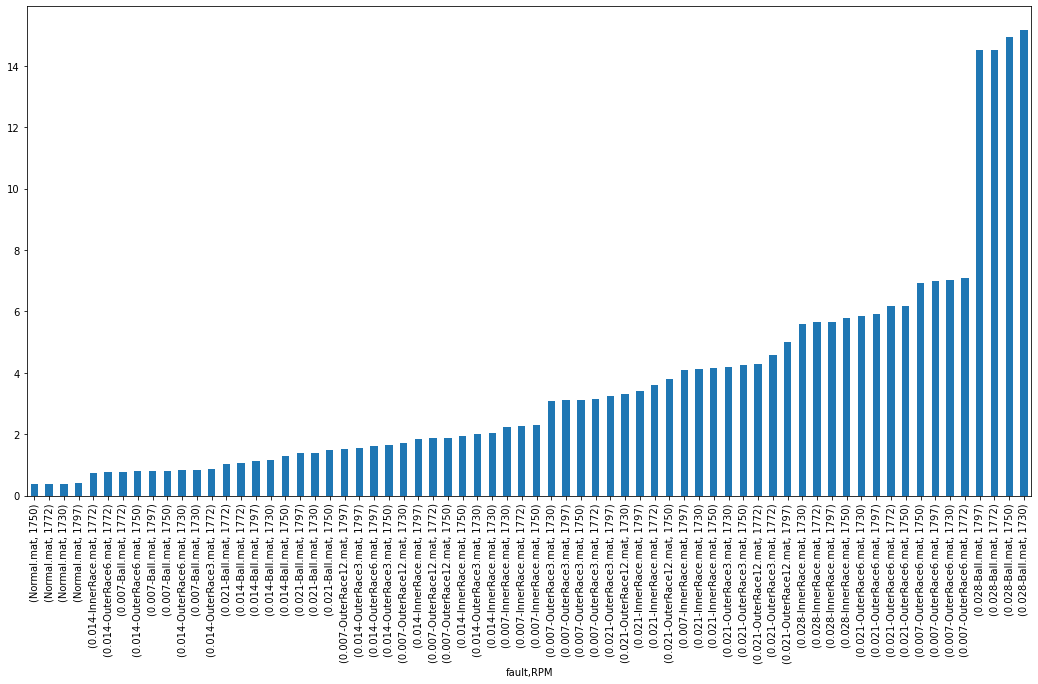

In [ ]:
plt.figure(figsize=(18,9))
temp.groupby(['fault','RPM'])['p2p'].mean().sort_values().plot(kind='bar')

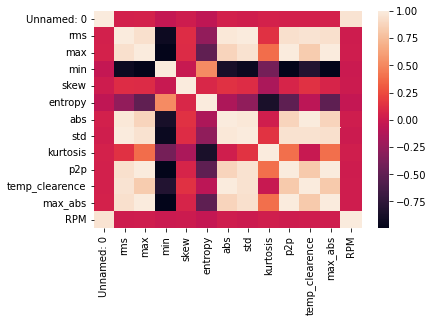

In [ ]:
sns.heatmap(temp.corr())

In [ ]:
temp.corr()

,Unnamed: 0,rms,max,min,skew,entropy,abs,std,kurtosis,p2p,temp_clearence,max_abs,RPM
Unnamed: 0,1.000000,0.043394,0.051468,-0.036828,0.010016,-0.055033,0.042881,0.031003,0.048950,0.044588,0.044161,0.051258,0.959581
rms,0.043394,1.000000,0.944782,-0.933803,0.114644,-0.269029,0.982610,0.997540,0.140680,0.942344,0.956074,0.941045,0.015586
max,0.051468,0.944782,1.000000,-0.987894,0.108418,-0.500255,0.882619,0.946584,0.385921,0.997076,0.835027,0.996896,0.021637
min,-0.036828,-0.933803,-0.987894,1.000000,-0.018800,0.517915,-0.865857,-0.939086,-0.403677,-0.996851,-0.814985,-0.994016,-0.005013
skew,0.010016,0.114644,0.108418,-0.018800,1.000000,0.082845,0.135320,0.114351,-0.153491,0.064372,0.141156,0.066066,0.007852
entropy,-0.055033,-0.269029,-0.500255,0.517915,0.082845,1.000000,-0.141313,-0.274928,-0.860029,-0.510455,-0.075936,-0.513082,-0.031562
abs,0.042881,0.982610,0.882619,-0.865857,0.135320,-0.141313,1.000000,0.977476,0.032213,0.877187,0.993596,0.876718,0.017787
std,0.031003,0.997540,0.946584,-0.939086,0.114351,-0.274928,0.977476,1.000000,0.144751,0.945748,0.948770,0.943023,0.002679
kurtosis,0.048950,0.140680,0.385921,-0.403677,-0.153491,-0.860029,0.032213,0.144751,1.000000,0.395853,-0.017146,0.398092,0.030150
p2p,0.044588,0.942344,0.997076,-0.996851,0.064372,-0.510455,0.877187,0.945748,0.395853,1.000000,0.827877,0.998532,0.013690


1. max_abs
2. max
3. temp_clearence
4. entropy
5. skew

In [ ]:
temp = temp.drop(['max_abs','max','temp_clearence','entropy','skew','min'],axis=1)

In [ ]:
data_gabungan_FE=pd.concat([temp_data_18,temp_data_19,temp_data_20,temp_data_21,temp_data_22,temp_data_23,
           temp_data_24,temp_data_25,temp_data_26,temp_data_27,temp_data_28,temp_data_29,
           temp_data_30,temp_data_31,temp_data_32,temp_data_33,temp_data_34],
           axis=0).reset_index().drop(['index','Unnamed: 0'],axis=1)

data_gabungan_FE.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/FE/data_gabungan_FE.csv')

#### 2.2.2 Filtering

#### 2.2.3 Exploration

##### Awal

In [ ]:
data_48k_1730 = pd.read_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1730.csv')
data_48k_1750 = pd.read_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1750.csv')
data_48k_1772 = pd.read_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1772.csv')
data_48k_1797 = pd.read_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1797.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,8,12,16,20,24,30,34,38,42,46,50,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,8,12,16,20,24,28,32,36,40,44,48,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data_48k_1730.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491446 entries, 0 to 491445
Data columns (total 55 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    491446 non-null  int64  
 1   X125_DE_time  488545 non-null  float64
 2   X125_FE_time  488545 non-null  float64
 3   rpm           488545 non-null  float64
 4   fault         488545 non-null  object 
 5   X112_DE_time  485643 non-null  float64
 6   X112_FE_time  485643 non-null  float64
 7   rpm.1         488545 non-null  float64
 8   fault.1       488545 non-null  object 
 9   X164_DE_time  484483 non-null  float64
 10  X164_FE_time  484483 non-null  float64
 11  rpm.2         488545 non-null  float64
 12  fault.2       488545 non-null  object 
 13  X151_DE_time  486224 non-null  float64
 14  X151_FE_time  486224 non-null  float64
 15  rpm.3         488545 non-null  float64
 16  fault.3       488545 non-null  object 
 17  X138_DE_time  487964 non-null  float64
 18  X138

In [ ]:
data_48k_1730.head()

,Unnamed: 0,X125_DE_time,X125_FE_time,rpm,fault,X112_DE_time,X112_FE_time,rpm.1,fault.1,X164_DE_time,...,rpm.10,fault.10,X253_DE_time,X253_FE_time,rpm.11,fault.11,X241_DE_time,X241_FE_time,rpm.12,fault.12
0,0,0.253050,0.053829,1730.0,0.007-Ball.mat,0.453113,0.223124,1730.0,0.007-InnerRace.mat,0.167101,...,1730.0,0.021-OuterRace12.mat,1.548307,0.249483,1730.0,0.021-OuterRace3.mat,-0.055088,0.100286,1730.0,0.021-OuterRace6.mat
1,1,0.257431,0.122656,1730.0,0.007-Ball.mat,0.385104,0.245518,1730.0,0.007-InnerRace.mat,0.159591,...,1730.0,0.021-OuterRace12.mat,1.504069,0.157417,1730.0,0.021-OuterRace3.mat,-0.076789,0.043567,1730.0,0.021-OuterRace6.mat
2,2,0.238447,0.162515,1730.0,0.007-Ball.mat,0.235318,0.271816,1730.0,0.007-InnerRace.mat,0.128507,...,1730.0,0.021-OuterRace12.mat,1.083397,0.108918,1730.0,0.021-OuterRace3.mat,-0.076789,-0.019317,1730.0,0.021-OuterRace6.mat
3,3,0.218838,0.138065,1730.0,0.007-Ball.mat,0.095754,0.260722,1730.0,0.007-InnerRace.mat,0.076562,...,1730.0,0.021-OuterRace12.mat,0.640189,0.055897,1730.0,0.021-OuterRace3.mat,-0.075955,-0.040690,1730.0,0.021-OuterRace6.mat
4,4,0.191718,0.108685,1730.0,0.007-Ball.mat,0.024199,0.182855,1730.0,0.007-InnerRace.mat,0.023782,...,1730.0,0.021-OuterRace12.mat,0.156917,0.012330,1730.0,0.021-OuterRace3.mat,-0.085136,-0.019317,1730.0,0.021-OuterRace6.mat


In [ ]:
data_48k_1730.shape

(491446, 55)

##### RPM 1730

In [ ]:
temp_1 = data_48k_1730.iloc[:,1:5].dropna()
temp_2 = data_48k_1730.iloc[:,5:9].dropna()
temp_3 = data_48k_1730.iloc[:,9:13].dropna()
temp_4 = data_48k_1730.iloc[:,13:17].dropna()
temp_5 = data_48k_1730.iloc[:,17:21].dropna()
temp_6 = data_48k_1730.iloc[:,21:25].dropna()
temp_7 = data_48k_1730.iloc[:,25:29].dropna()
temp_8 = data_48k_1730.iloc[:,29:33].dropna()
temp_9 = data_48k_1730.iloc[:,33:37].dropna()
temp_10 = data_48k_1730.iloc[:,[37,38,41,42]].dropna()
# temp_11 = data_48k_1730.iloc[:,[39,40,41,42]].dropna()
temp_12 = data_48k_1730.iloc[:,43:47].dropna()
temp_13 = data_48k_1730.iloc[:,47:51].dropna()
temp_14 = data_48k_1730.iloc[:,51:55].dropna()


temp_2.columns = temp_1.columns
temp_3.columns = temp_1.columns
temp_4.columns = temp_1.columns
temp_5.columns = temp_1.columns
temp_6.columns = temp_1.columns
temp_7.columns = temp_1.columns
temp_8.columns = temp_1.columns
temp_9.columns = temp_1.columns
temp_10.columns = temp_1.columns
# temp_11.columns = temp_1.columns
temp_12.columns = temp_1.columns
temp_13.columns = temp_1.columns
temp_14.columns = temp_1.columns

data_48k_1730_merged = pd.concat([temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,
           temp_10,temp_12,temp_13,temp_14],axis=0)

In [ ]:
data_48k_1730_merged.to_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1730_merged.csv')

In [ ]:
data_48k_1730_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6327872 entries, 0 to 488544
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   X125_DE_time  float64
 1   X125_FE_time  float64
 2   rpm           float64
 3   fault         object 
dtypes: float64(3), object(1)
memory usage: 241.4+ MB


In [ ]:
data_ball_48k_1730 = data_48k_1730.iloc[:,[1,2,3,4]].dropna()
data_ball_48k_1750 = data_48k_1750.iloc[:,[1,2,3,4]].dropna()
data_ball_48k_1772 = data_48k_1772.iloc[:,[1,2,3,4]].dropna()
data_ball_48k_1797 = data_48k_1797.iloc[:,[1,2,3,4]].dropna()

In [ ]:
data_ball_48k_1797.shape

(244739, 4)

(array([6.6000e+01, 1.2430e+03, 9.6470e+03, 4.2019e+04, 8.4699e+04,
        7.4542e+04, 2.7202e+04, 4.8610e+03, 4.4100e+02, 1.9000e+01]),
 array([-0.62459446, -0.48849378, -0.35239311, -0.21629243, -0.08019175,
         0.05590892,  0.1920096 ,  0.32811028,  0.46421095,  0.60031163,
         0.73641231]),
 <a list of 10 Patch objects>)

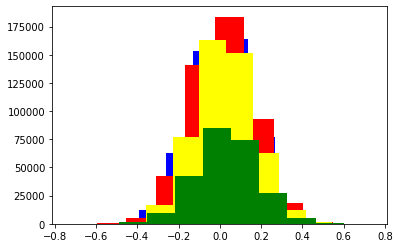

In [ ]:
plt.figure()
plt.hist(data_ball_48k_1730.iloc[:,0],color='blue')
plt.hist(data_ball_48k_1750.iloc[:,0],color='red')
plt.hist(data_ball_48k_1772.iloc[:,0],color='yellow')
plt.hist(data_ball_48k_1797.iloc[:,0],color='green')

In [ ]:
import numpy as np
import scipy

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


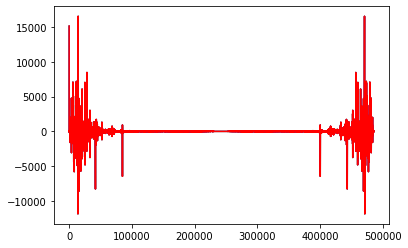

In [ ]:
plt.figure()
plt.plot(np.fft.fft(temp_2.iloc[:,1]),color='yellow')
plt.plot(np.fft.fft(temp_2.iloc[:,1]),color='blue')
plt.plot(np.fft.fft(temp_2.iloc[:,1]),color='red')

##### RPM 1750

In [ ]:
data_48k_1750.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491446 entries, 0 to 491445
Data columns (total 53 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    491446 non-null  int64  
 1   X124_DE_time  486804 non-null  float64
 2   X124_FE_time  486804 non-null  float64
 3   rpm           486804 non-null  float64
 4   fault         486804 non-null  object 
 5   X111_DE_time  485643 non-null  float64
 6   X111_FE_time  485643 non-null  float64
 7   rpm.1         486804 non-null  float64
 8   fault.1       486804 non-null  object 
 9   X163_DE_time  483323 non-null  float64
 10  X163_FE_time  483323 non-null  float64
 11  rpm.2         486804 non-null  float64
 12  fault.2       486804 non-null  object 
 13  X150_DE_time  485643 non-null  float64
 14  X150_FE_time  485643 non-null  float64
 15  rpm.3         486804 non-null  float64
 16  fault.3       486804 non-null  object 
 17  X137_DE_time  486804 non-null  float64
 18  X137

In [ ]:
temp_1 = data_48k_1750.iloc[:,1:5].dropna()
temp_2 = data_48k_1750.iloc[:,5:9].dropna()
temp_3 = data_48k_1750.iloc[:,9:13].dropna()
temp_4 = data_48k_1750.iloc[:,13:17].dropna()
temp_5 = data_48k_1750.iloc[:,17:21].dropna()
temp_6 = data_48k_1750.iloc[:,21:25].dropna()
temp_7 = data_48k_1750.iloc[:,25:29].dropna()
temp_8 = data_48k_1750.iloc[:,29:33].dropna()
temp_9 = data_48k_1750.iloc[:,33:37].dropna()
temp_10 = data_48k_1750.iloc[:,[37,38,39,40]].dropna()
temp_11 = data_48k_1750.iloc[:,41:45].dropna()
temp_12 = data_48k_1750.iloc[:,45:49].dropna()
temp_13 = data_48k_1750.iloc[:,49:53].dropna()


temp_2.columns = temp_1.columns
temp_3.columns = temp_1.columns
temp_4.columns = temp_1.columns
temp_5.columns = temp_1.columns
temp_6.columns = temp_1.columns
temp_7.columns = temp_1.columns
temp_8.columns = temp_1.columns
temp_9.columns = temp_1.columns
temp_10.columns = temp_1.columns
temp_11.columns = temp_1.columns
temp_12.columns = temp_1.columns
temp_13.columns = temp_1.columns

data_48k_1750_merged = pd.concat([temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,
           temp_10,temp_11,temp_12,temp_13],axis=0)

In [ ]:
data_48k_1750_merged.to_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1750_merged.csv')

##### RPM 1772

In [ ]:
data_48k_1772.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978250 entries, 0 to 978249
Data columns (total 55 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    978250 non-null  int64  
 1   X123_DE_time  487384 non-null  float64
 2   X123_FE_time  487384 non-null  float64
 3   rpm           487384 non-null  float64
 4   fault         487384 non-null  object 
 5   X110_DE_time  486224 non-null  float64
 6   X110_FE_time  486224 non-null  float64
 7   rpm.1         487384 non-null  float64
 8   fault.1       487384 non-null  object 
 9   X162_DE_time  482742 non-null  float64
 10  X162_FE_time  482742 non-null  float64
 11  rpm.2         487384 non-null  float64
 12  fault.2       487384 non-null  object 
 13  X149_DE_time  485063 non-null  float64
 14  X149_FE_time  485063 non-null  float64
 15  rpm.3         487384 non-null  float64
 16  fault.3       487384 non-null  object 
 17  X136_DE_time  486804 non-null  float64
 18  X136

In [ ]:
temp_1 = data_48k_1772.iloc[:,1:5].dropna()
temp_2 = data_48k_1772.iloc[:,5:9].dropna()
temp_3 = data_48k_1772.iloc[:,9:13].dropna()
temp_4 = data_48k_1772.iloc[:,13:17].dropna()
temp_5 = data_48k_1772.iloc[:,17:21].dropna()
temp_6 = data_48k_1772.iloc[:,21:25].dropna()
temp_7 = data_48k_1772.iloc[:,27:31].dropna()
temp_8 = data_48k_1772.iloc[:,31:35].dropna()
temp_9 = data_48k_1772.iloc[:,35:39].dropna()
temp_10 = data_48k_1772.iloc[:,39:43].dropna()
temp_11 = data_48k_1772.iloc[:,43:47].dropna()
temp_12 = data_48k_1772.iloc[:,47:51].dropna()
temp_13 = data_48k_1772.iloc[:,51:55].dropna()

temp_2.columns = temp_1.columns
temp_3.columns = temp_1.columns
temp_4.columns = temp_1.columns
temp_5.columns = temp_1.columns
temp_6.columns = temp_1.columns
temp_7.columns = temp_1.columns
temp_8.columns = temp_1.columns
temp_9.columns = temp_1.columns
temp_10.columns = temp_1.columns
temp_11.columns = temp_1.columns
temp_12.columns = temp_1.columns
temp_13.columns = temp_1.columns

data_48k_1772_merged = pd.concat([temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,
           temp_10,temp_11,temp_12,temp_13],axis=0)

In [ ]:
data_48k_1772_merged.to_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1772_merged.csv')

In [ ]:
data_48k_1730.iloc[:,1]

0         0.253050
1         0.257431
2         0.238447
3         0.218838
4         0.191718
            ...   
491441         NaN
491442         NaN
491443         NaN
491444         NaN
491445         NaN
Name: X125_DE_time, Length: 491446, dtype: float64

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


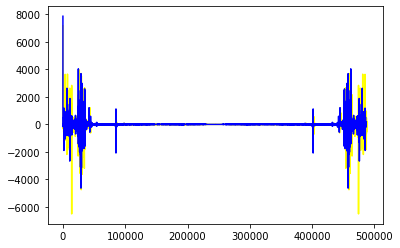

In [ ]:
# zz = .iloc[:,1:5].dropna()

plt.plot(np.fft.fft(data_48k_1730.iloc[:,1].dropna()),color='yellow')
plt.plot(np.fft.fft(data_48k_1750.iloc[:,1].dropna()),color='blue')

##### RPM 1797

In [ ]:
data_48k_1797.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249146 entries, 0 to 249145
Data columns (total 53 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    249146 non-null  int64  
 1   X122_DE_time  244739 non-null  float64
 2   X122_FE_time  244739 non-null  float64
 3   rpm           244739 non-null  float64
 4   fault         244739 non-null  object 
 5   X109_DE_time  243938 non-null  float64
 6   X109_FE_time  243938 non-null  float64
 7   rpm.1         244739 non-null  float64
 8   fault.1       244739 non-null  object 
 9   X161_DE_time  129969 non-null  float64
 10  X161_FE_time  129969 non-null  float64
 11  rpm.2         244739 non-null  float64
 12  fault.2       244739 non-null  object 
 13  X148_DE_time  124602 non-null  float64
 14  X148_FE_time  124602 non-null  float64
 15  rpm.3         244739 non-null  float64
 16  fault.3       244739 non-null  object 
 17  X135_DE_time  243538 non-null  float64
 18  X135

In [ ]:
temp_1 = data_48k_1797.iloc[:,1:5].dropna()
temp_2 = data_48k_1797.iloc[:,5:9].dropna()
temp_3 = data_48k_1797.iloc[:,9:13].dropna()
temp_4 = data_48k_1797.iloc[:,13:17].dropna()
temp_5 = data_48k_1797.iloc[:,17:21].dropna()
temp_6 = data_48k_1797.iloc[:,21:25].dropna()
temp_7 = data_48k_1797.iloc[:,25:29].dropna()
temp_8 = data_48k_1797.iloc[:,29:33].dropna()
temp_9 = data_48k_1797.iloc[:,33:37].dropna()
temp_10 = data_48k_1797.iloc[:,37:41].dropna()
temp_11 = data_48k_1797.iloc[:,41:45].dropna()
temp_12 = data_48k_1797.iloc[:,45:49].dropna()
temp_13 = data_48k_1797.iloc[:,49:53].dropna()

temp_2.columns = temp_1.columns
temp_3.columns = temp_1.columns
temp_4.columns = temp_1.columns
temp_5.columns = temp_1.columns
temp_6.columns = temp_1.columns
temp_7.columns = temp_1.columns
temp_8.columns = temp_1.columns
temp_9.columns = temp_1.columns
temp_10.columns = temp_1.columns
temp_11.columns = temp_1.columns
temp_12.columns = temp_1.columns
temp_13.columns = temp_1.columns

data_48k_1797_merged = pd.concat([temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,
           temp_10,temp_11,temp_12,temp_13],axis=0)

In [ ]:
data_48k_1797_merged.to_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1797_merged.csv')

##### Gabungan

In [ ]:
data_normal = pd.read_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_normal.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485643 entries, 0 to 485642
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      485643 non-null  int64  
 1   X100_DE_time    485643 non-null  float64
 2   X100_FE_time    485643 non-null  float64
 3   rpm             485643 non-null  int64  
 4   fault           485643 non-null  object 
 5   X098_DE_time    483903 non-null  float64
 6   X098_FE_time    483903 non-null  float64
 7   X099_DE_time    483903 non-null  float64
 8   X099_FE_time    483903 non-null  float64
 9   rpm.1           483903 non-null  float64
 10  fault.1         483903 non-null  object 
 11  X098_DE_time.1  483903 non-null  float64
 12  X098_FE_time.1  483903 non-null  float64
 13  rpm.2           483903 non-null  float64
 14  fault.2         483903 non-null  object 
 15  X097_DE_time    243938 non-null  float64
 16  X097_FE_time    243938 non-null  float64
 17  rpm.3     

In [ ]:
temp_1 = data_normal.iloc[:,1:5].dropna()
temp_2 = data_normal.iloc[:,[5,6,9,10]].dropna()
# temp_3 = data_normal.iloc[:,[7,8,9,10]].dropna()
temp_4 = data_normal.iloc[:,11:15].dropna()
temp_5 = data_normal.iloc[:,15:19].dropna()

temp_2.columns = temp_1.columns
# temp_3.columns = temp_1.columns
temp_4.columns = temp_1.columns
temp_5.columns = temp_1.columns

data_normal_merged = pd.concat([temp_1,temp_2,temp_4,temp_5],axis=0)

In [ ]:
data_normal_merged.to_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_normal_merged.csv')

In [ ]:
data_48k_1730_merged.columns

Index(['X125_DE_time', 'X125_FE_time', 'rpm', 'fault'], dtype='object')

In [ ]:
temp_1.columns = data_48k_1730_merged.columns

data_48k_1730_complete = pd.concat([data_48k_1730_merged,temp_1],axis=0)
data_48k_1730_complete.to_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1730_complete.csv')

In [ ]:
temp_2.columns = data_48k_1750_merged.drop('Unnamed: 0',axis=1).columns
temp_3.columns = data_48k_1750_merged.drop('Unnamed: 0',axis=1).columns

data_48k_1730_complete = pd.concat([data_48k_1750_merged,temp_2,temp_3],axis=0).drop('Unnamed: 0',axis=1)
data_48k_1730_complete.to_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1750_complete.csv')

In [ ]:
temp_4.columns = data_48k_1772_merged.drop('Unnamed: 0',axis=1).columns

data_48k_1730_complete = pd.concat([data_48k_1772_merged,temp_4],axis=0).drop('Unnamed: 0',axis=1)
data_48k_1730_complete.to_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1772_complete.csv')

In [ ]:
temp_5.columns = data_48k_1797_merged.drop('Unnamed: 0',axis=1).columns

data_48k_1730_complete = pd.concat([data_48k_1797_merged,temp_5],axis=0).drop('Unnamed: 0',axis=1)
data_48k_1730_complete.to_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1797_complete.csv')

In [ ]:
data_48k_1730_complete.groupby('fault')['fault'].count()

fault
0.007-Ball.mat           488545
0.007-InnerRace.mat      485643
0.007-OuterRace12.mat    484483
0.007-OuterRace3.mat     486224
0.007-OuterRace6.mat     487964
0.014-Ball.mat           486804
0.014-InnerRace.mat      485063
0.014-OuterRace6.mat     488545
0.021-Ball.mat           486804
0.021-InnerRace.mat      488545
0.021-OuterRace12.mat    486224
0.021-OuterRace3.mat     484483
0.021-OuterRace6.mat     488545
Normal.mat               485643
Name: fault, dtype: int64

##### Lain2

In [ ]:
from PyEMD import EEMD

In [ ]:
pip install dsatools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import dsatools
from dsatools import decomposition
import dsatools.utilits as ut

In [ ]:
data_48k_1730_merged = pd.read_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1730_merged.csv')
data_48k_1750_merged = pd.read_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1750_merged.csv')
data_48k_1772_merged = pd.read_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1772_merged.csv')
data_48k_1797_merged = pd.read_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1797_merged.csv')

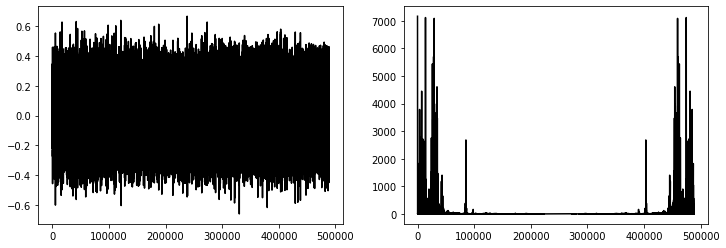

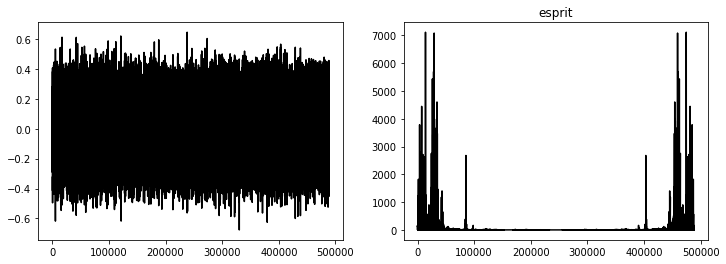

In [ ]:
signal1 = list(data_48k_1730_merged['X125_DE_time'].loc[data_48k_1730_merged.fault=='0.007-Ball.mat'])

ut.probe(signal1)
x = signal1

psds = decomposition.emd(x,order=6)
ut.probe(psds.sum(axis=0),title='esprit')

In [ ]:
sin = lambda x, p: np.sin(2 * np.pi * x * t + p)
S = 3 * sin(18, 0.2) * (t - 0.2) ** 2
S += 5 * sin(11, 2.7)
S += 3 * sin(14, 1.6)
S += 1 * np.sin(4 * 2 * np.pi * (t - 0.8) ** 2)
S += t ** 2.1 - t

S

array([4.79133598, 4.79078185, 4.79022759, ..., 6.36180179, 6.3615976 ,
       6.36139325])

In [ ]:
import numpy as np
from scipy.signal import resample

# Load the signal from a file
signal = data_ball_48k_1730.iloc[:,0]

# Set the original and target sampling frequencies
fs_original = 48000
fs_target = 1000

# Calculate the downsampling factor
downsampling_factor = int(fs_original / fs_target)

# Downsample the signal
downsampled_signal = resample(signal, int(len(signal) / downsampling_factor))

# Print the downsampled signal
print(downsampled_signal)

[0.01850731 0.0025876  0.02525422 ... 0.03306298 0.02610923 0.03417746]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


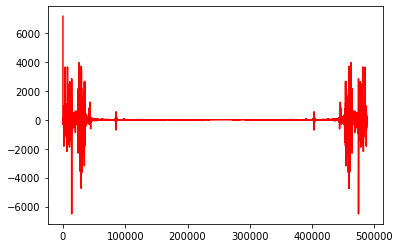

In [ ]:
plt.figure()
plt.plot(np.fft.fft(data_ball_48k_1730.iloc[:,0]),color='red')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


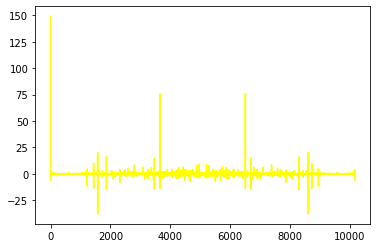

In [ ]:
plt.plot(np.fft.fft(downsampled_signal),color='yellow')

In [ ]:
import pandas as pd
import numpy as np

# Load the signal from a file
signal = np.array(data_ball_48k_1730.iloc[:,0])

# Set the original and target sampling frequencies
fs_original = 48000
fs_target = 1000

# Create a timestamp for the original signal
timestamp = np.arange(0, len(signal) / fs_original, 1/fs_original)

# Create a Dataframe with the timestamp and signal
df = pd.DataFrame({'timestamp': timestamp, 'signal': signal})

# Resample the signal with the target frequency
downsampled_signal = df.set_index('timestamp').resample(str(1/fs_target)+'S').mean()

# Print the downsampled signal
print(downsampled_signal)

In [ ]:
import numpy as np
from PyEMD import EMD

# Create a signal
signal = data_48k_1730_merged['X125_DE_time'].loc[data_48k_1730_merged.fault=='0.007-Ball.mat'].values


# Initialize the EMD object
emd = EMD()

# Decompose the signal
imfs = emd.emd(signal)

# Print the IMFs
print(imfs)

[[ 0.00151689  0.00990604 -0.00728852 ... -0.05324497 -0.17363148
  -0.26600402]
 [ 0.12470704  0.1313938   0.13915082 ... -0.04473572 -0.04363619
  -0.04171134]
 [ 0.07279886  0.06664136  0.06168119 ... -0.02027646 -0.02004404
  -0.01826081]
 ...
 [ 0.00116167  0.00116168  0.00116169 ...  0.00325355  0.00325354
   0.00325353]
 [-0.00032304 -0.00032305 -0.00032305 ... -0.00260762 -0.00260761
  -0.00260761]
 [ 0.01451106  0.01451106  0.01451106 ...  0.01461158  0.01461158
   0.01461158]]


In [ ]:
pd.DataFrame(imfs).transpose().to_csv('imfs_data_48k_1730_de.csv')

##### Eksplorasi

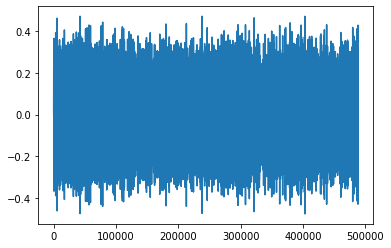

In [ ]:
plt.plot(imfs[0])

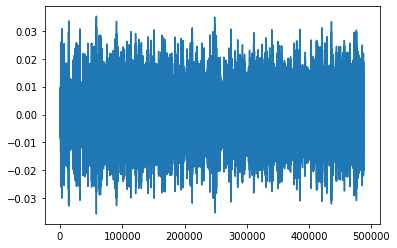

In [ ]:
plt.plot(imfs[6])

## 3. Machine Learning

### 3.1 Preprocessing

#### 3.1.1 Fungsi-Fungsi

##### 3.1.1.1 Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

def pca(x):
  pca = PCA()
  return pca.fit_transform(x)

##### 3.1.1.2 Scaling / Standardize

In [ ]:
from sklearn import preprocessing

#### 3.1.3 Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split


#### 3.1.2 Implementasi

In [ ]:
dat_1 = pd.read_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1730_complete.csv')
dat_2 = pd.read_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1750_complete.csv')
dat_3 = pd.read_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1772_complete.csv')
dat_4 = pd.read_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1797_complete.csv')

In [ ]:
dat_4.groupby('fault')['fault'].count()

fault
0.007-Ball.mat           244739
0.007-InnerRace.mat      243938
0.007-OuterRace12.mat    129969
0.007-OuterRace3.mat     124602
0.007-OuterRace6.mat     243538
0.014-Ball.mat           244739
0.014-InnerRace.mat       63788
0.014-OuterRace6.mat     244739
0.021-Ball.mat           243938
0.021-InnerRace.mat      244339
0.021-OuterRace12.mat    130549
0.021-OuterRace3.mat     128663
0.021-OuterRace6.mat     244739
Normal.mat               243938
Name: fault, dtype: int64

In [ ]:
dat_1 = dat_1.drop('Unnamed: 0',axis=1)
dat_2 = dat_2.drop('Unnamed: 0',axis=1)
dat_3 = dat_3.drop('Unnamed: 0',axis=1)
dat_4 = dat_4.drop('Unnamed: 0',axis=1)

In [ ]:
dat_1.head()

,X125_DE_time,X125_FE_time,rpm,fault
0,0.253050,0.053829,1730.0,0.007-Ball.mat
1,0.257431,0.122656,1730.0,0.007-Ball.mat
2,0.238447,0.162515,1730.0,0.007-Ball.mat
3,0.218838,0.138065,1730.0,0.007-Ball.mat
4,0.191718,0.108685,1730.0,0.007-Ball.mat


In [ ]:
import pywt

In [ ]:
#STFT
from scipy import signal
f, t, Sxx = signal.spectrogram(vibration_signal, sampling_rate)

#WT
from scipy.signal import cwt
scales = np.arange(1, 128)
coefs, freqs = pywt.cwt(vibration_signal, scales, 'mexh')

In [ ]:
len(freqs)

127

##### Time Features

###### Data Train

In [ ]:
merged_dat = pd.DataFrame()

for i in range(len(dat_1.fault.unique())):
  temp = dat_1.loc[dat_1.fault==dat_1.fault.unique()[i]]

  a = [np.sqrt(np.mean(np.square(temp.iloc[xx:xx+1000,0]))) if (xx+1000<temp.shape[0]) else 
        np.sqrt(np.mean(np.square(temp.iloc[xx:temp.shape[0],0]))) for xx in range(0,temp.shape[0],1000)]
  
  b = [scipy.stats.kurtosis(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        scipy.stats.kurtosis(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  c = [np.max(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        np.max(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  d = [np.min(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        np.min(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  e = [np.std(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        np.std(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  f = [np.mean(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        np.mean(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  g = [c[j]/a[j] for j in range(len(c))]

  h = [scipy.stats.skew(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        scipy.stats.skew(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  i = [temp.iloc[0,-1] for k in range(0,temp.shape[0],1000)]

  temp_dat = pd.DataFrame({
      'rms' : a,
      'kurtosis' : b,
      'max' : c,
      'min' : d,
      'std' : e,
      'mean' : f,
      'crest_factor' : g,
      'skewness':h,
      'fault' : i
  })

  merged_dat = pd.concat([merged_dat,temp_dat],axis=0)


In [ ]:
merged_dat.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features.csv')

###### Data Validasi

In [ ]:
dat_1.iloc[:,1]==dat_1.iloc[:,0]

0          False
1          False
2          False
3          False
4          False
           ...  
7302055    False
7302056    False
7302057    False
7302058    False
7302059    False
Length: 7302060, dtype: bool

In [ ]:
merged_dat_1730 = pd.DataFrame()

for i in range(len(dat_1.fault.unique())):
  temp = dat_1.loc[dat_1.fault==dat_1.fault.unique()[i]]

  a = [np.sqrt(np.mean(np.square(temp.iloc[xx:xx+1000,1]))) if (xx+1000<temp.shape[0]) else 
        np.sqrt(np.mean(np.square(temp.iloc[xx:temp.shape[0],1]))) for xx in range(0,temp.shape[0],1000)]
  
  b = [scipy.stats.kurtosis(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        scipy.stats.kurtosis(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  c = [np.max(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        np.max(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  d = [np.min(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        np.min(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  e = [np.std(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        np.std(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  f = [np.mean(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        np.mean(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  g = [c[j]/a[j] for j in range(len(c))]

  h = [scipy.stats.skew(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else
        scipy.stats.skew(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  l = [temp.iloc[0,-1] for k in range(0,temp.shape[0],1000)]

  temp_dat = pd.DataFrame({
      'rms' : a,
      'kurtosis' : b,
      'max' : c,
      'min' : d,
      'std' : e,
      'mean' : f,
      'crest_factor' : g,
      'skewness':h,
      'fault' : l
  })

  merged_dat_1730 = pd.concat([merged_dat_1730,temp_dat],axis=0)


In [ ]:
merged_dat_1730.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_validasi_1730.csv')

###### Data RPM 1797

In [ ]:
dat_2.groupby('fault')['fault'].count()

fault
0.007-Ball.mat           486804
0.007-InnerRace.mat      485643
0.007-OuterRace12.mat    483323
0.007-OuterRace3.mat     485643
0.007-OuterRace6.mat     486804
0.014-Ball.mat           486804
0.014-InnerRace.mat      486804
0.014-OuterRace6.mat     486804
0.021-Ball.mat           486804
0.021-InnerRace.mat      486804
0.021-OuterRace12.mat    486804
0.021-OuterRace3.mat     486804
0.021-OuterRace6.mat     486804
Normal.mat               967806
Name: fault, dtype: int64

In [ ]:
merged_dat_4 = pd.DataFrame()

for i in range(len(dat_4.fault.unique())):
  temp = dat_4.loc[dat_4.fault==dat_4.fault.unique()[i]]

  a = [np.sqrt(np.mean(np.square(temp.iloc[xx:xx+1000,0]))) if (xx+1000<temp.shape[0]) else 
        np.sqrt(np.mean(np.square(temp.iloc[xx:temp.shape[0],0]))) for xx in range(0,temp.shape[0],1000)]
  
  b = [scipy.stats.kurtosis(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        scipy.stats.kurtosis(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  c = [np.max(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        np.max(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  d = [np.min(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        np.min(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  e = [np.std(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        np.std(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  f = [np.mean(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        np.mean(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  g = [c[j]/a[j] for j in range(len(c))]

  h = [scipy.stats.skew(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        scipy.stats.skew(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  l = [temp.iloc[0,-1] for k in range(0,temp.shape[0],1000)]

  temp_dat = pd.DataFrame({
      'rms' : a,
      'kurtosis' : b,
      'max' : c,
      'min' : d,
      'std' : e,
      'mean' : f,
      'crest_factor' : g,
      'skewness':h,
      'fault' : l
  })

  merged_dat_4 = pd.concat([merged_dat_4,temp_dat],axis=0)


In [ ]:
merged_dat_4.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_1797.csv')

In [ ]:
merged_dat_4_FE = pd.DataFrame()

for i in range(len(dat_4.fault.unique())):
  temp = dat_4.loc[dat_4.fault==dat_4.fault.unique()[i]]

  a = [np.sqrt(np.mean(np.square(temp.iloc[xx:xx+1000,1]))) if (xx+1000<temp.shape[0]) else 
        np.sqrt(np.mean(np.square(temp.iloc[xx:temp.shape[0],1]))) for xx in range(0,temp.shape[0],1000)]
  
  b = [scipy.stats.kurtosis(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        scipy.stats.kurtosis(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  c = [np.max(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        np.max(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  d = [np.min(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        np.min(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  e = [np.std(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        np.std(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  f = [np.mean(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        np.mean(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  g = [c[j]/a[j] for j in range(len(c))]

  h = [(d[j]-c[j])/a[j] for j in range(len(c))]

  i = [scipy.stats.skew(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        scipy.stats.skew(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  j = [temp.iloc[0,-1] for l in range(0,temp.shape[0],1000)]

  temp_dat = pd.DataFrame({
      'rms' : a,
      'kurtosis' : b,
      'max' : c,
      'min' : d,
      'std' : e,
      'mean' : f,
      'crest_factor' : g,
      'skewness':h,
      'shape_factor':i,
      'fault' : j
  })

  merged_dat_4_FE = pd.concat([merged_dat_4_FE,temp_dat],axis=0)


In [ ]:
merged_dat_4_FE.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_FE_1797.csv')

###### Data RPM 1772

In [ ]:
merged_dat_3 = pd.DataFrame()

for i in range(len(dat_3.fault.unique())):
  temp = dat_3.loc[dat_3.fault==dat_3.fault.unique()[i]]

  a = [np.sqrt(np.mean(np.square(temp.iloc[xx:xx+1000,0]))) if (xx+1000<temp.shape[0]) else 
        np.sqrt(np.mean(np.square(temp.iloc[xx:temp.shape[0],0]))) for xx in range(0,temp.shape[0],1000)]
  
  b = [scipy.stats.kurtosis(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        scipy.stats.kurtosis(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  c = [np.max(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        np.max(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  d = [np.min(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        np.min(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  e = [np.std(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        np.std(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  f = [np.mean(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        np.mean(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  g = [c[j]/a[j] for j in range(len(c))]

  h = [scipy.stats.skew(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        scipy.stats.skew(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  l = [temp.iloc[0,-1] for k in range(0,temp.shape[0],1000)]

  temp_dat = pd.DataFrame({
      'rms' : a,
      'kurtosis' : b,
      'max' : c,
      'min' : d,
      'std' : e,
      'mean' : f,
      'crest_factor' : g,
      'skewness':h,
      'fault' : l
  })

  merged_dat_3 = pd.concat([merged_dat_3,temp_dat],axis=0)


In [ ]:
merged_dat_3.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_1772.csv')

In [ ]:
merged_dat_3_FE = pd.DataFrame()

for i in range(len(dat_3.fault.unique())):
  temp = dat_3.loc[dat_3.fault==dat_3.fault.unique()[i]]

  a = [np.sqrt(np.mean(np.square(temp.iloc[xx:xx+1000,1]))) if (xx+1000<temp.shape[0]) else 
        np.sqrt(np.mean(np.square(temp.iloc[xx:temp.shape[0],1]))) for xx in range(0,temp.shape[0],1000)]
  
  b = [scipy.stats.kurtosis(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        scipy.stats.kurtosis(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  c = [np.max(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        np.max(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  d = [np.min(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        np.min(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  e = [np.std(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        np.std(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  f = [np.mean(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        np.mean(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  g = [c[j]/a[j] for j in range(len(c))]

  h = [scipy.stats.skew(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        scipy.stats.skew(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  k = [temp.iloc[0,-1] for l in range(0,temp.shape[0],1000)]

  temp_dat = pd.DataFrame({
      'rms' : a,
      'kurtosis' : b,
      'max' : c,
      'min' : d,
      'std' : e,
      'mean' : f,
      'crest_factor' : g,
      'skewness':h,
      'fault' : k
  })

  merged_dat_3_FE = pd.concat([merged_dat_3_FE,temp_dat],axis=0)


In [ ]:
merged_dat_3_FE.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_FE_1772.csv')

###### Data RPM 1750

In [ ]:
merged_dat_2 = pd.DataFrame()

for i in range(len(dat_2.fault.unique())):
  temp = dat_2.loc[dat_2.fault==dat_2.fault.unique()[i]]

  a = [np.sqrt(np.mean(np.square(temp.iloc[xx:xx+1000,0]))) if (xx+1000<temp.shape[0]) else 
        np.sqrt(np.mean(np.square(temp.iloc[xx:temp.shape[0],0]))) for xx in range(0,temp.shape[0],1000)]
  
  b = [scipy.stats.kurtosis(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        scipy.stats.kurtosis(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  c = [np.max(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        np.max(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  d = [np.min(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        np.min(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  e = [np.std(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        np.std(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  f = [np.mean(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        np.mean(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  g = [c[j]/a[j] for j in range(len(c))]

  h = [scipy.stats.skew(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        scipy.stats.skew(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]

  l = [temp.iloc[0,-1] for k in range(0,temp.shape[0],1000)]

  temp_dat = pd.DataFrame({
      'rms' : a,
      'kurtosis' : b,
      'max' : c,
      'min' : d,
      'std' : e,
      'mean' : f,
      'crest_factor' : g,
      'skewness':h,
      'fault' : l
  })

  merged_dat_2 = pd.concat([merged_dat_2,temp_dat],axis=0)


In [ ]:
merged_dat_2.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_1750.csv')

In [ ]:
merged_dat_2_FE = pd.DataFrame()

for i in range(len(dat_2.fault.unique())):
  temp = dat_2.loc[dat_2.fault==dat_2.fault.unique()[i]]

  a = [np.sqrt(np.mean(np.square(temp.iloc[xx:xx+1000,1]))) if (xx+1000<temp.shape[0]) else 
        np.sqrt(np.mean(np.square(temp.iloc[xx:temp.shape[0],1]))) for xx in range(0,temp.shape[0],1000)]
  
  b = [scipy.stats.kurtosis(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        scipy.stats.kurtosis(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  c = [np.max(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        np.max(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  d = [np.min(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        np.min(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  e = [np.std(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        np.std(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  f = [np.mean(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        np.mean(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  g = [c[j]/a[j] for j in range(len(c))]

  h = [scipy.stats.skew(temp.iloc[xx:xx+1000,1]) if (xx+1000<temp.shape[0]) else 
        scipy.stats.skew(temp.iloc[xx:temp.shape[0],1]) for xx in range(0,temp.shape[0],1000)]

  k = [temp.iloc[0,-1] for l in range(0,temp.shape[0],1000)]

  temp_dat = pd.DataFrame({
      'rms' : a,
      'kurtosis' : b,
      'max' : c,
      'min' : d,
      'std' : e,
      'mean' : f,
      'crest_factor' : g,
      'skewness':h,
      'fault' : k
  })

  merged_dat_2_FE = pd.concat([merged_dat_2_FE,temp_dat],axis=0)


In [ ]:
merged_dat_2_FE.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_FE_1750.csv')

In [ ]:
merged_dat

,rms,kurtosis,max,min,std,mean,crest_factor,skewness,fault
0,0.135563,0.286809,0.457285,-0.455407,0.134853,0.013859,3.373228,0.099459,0.007-Ball.mat
1,0.139051,-0.190881,0.376759,-0.415562,0.138127,0.016008,2.709500,-0.049557,0.007-Ball.mat
2,0.139974,-0.022892,0.450818,-0.386982,0.139237,0.014338,3.220734,-0.114988,0.007-Ball.mat
3,0.156974,-0.371071,0.459788,-0.423906,0.156354,0.013941,2.929073,-0.005449,0.007-Ball.mat
4,0.148735,-0.497189,0.435589,-0.353812,0.148195,0.012668,2.928617,0.066072,0.007-Ball.mat
...,...,...,...,...,...,...,...,...,...
481,0.071024,-0.150088,0.207155,-0.235110,0.069082,0.016495,2.916690,-0.289409,Normal.mat
482,0.065472,0.168356,0.175654,-0.230729,0.063857,0.014451,2.682883,-0.245658,Normal.mat
483,0.063740,-0.130056,0.187128,-0.184416,0.061818,0.015533,2.935807,-0.141836,Normal.mat
484,0.067178,0.103131,0.223218,-0.215500,0.065347,0.015575,3.322812,0.021237,Normal.mat


##### Frequency Features

In [ ]:
#frequency center
import numpy as np
from scipy.fftpack import fft

def rms_frequency(signal):
    # Calculate the FFT of the signal
    fft_signal = np.abs(fft(signal))

    # Calculate the RMS frequency
    rms_frequency = np.sqrt(np.mean(fft_signal ** 2))

    return rms_frequency

In [ ]:
import numpy as np
from scipy.fftpack import fft

def rvf_frequency(signal):
    # Calculate the FFT of the signal
    fft_signal = np.abs(fft(signal))

    # Calculate the RVF frequency
    rvf_frequency = np.sqrt(np.var(fft_signal))

    return rvf_frequency

In [ ]:
import numpy as np
from scipy.fftpack import fft

def peak_frequency(signal):
    # Calculate the FFT of the signal
    fft_signal = np.abs(fft(signal))

    # Find the index of the peak frequency
    peak_index = np.argmax(fft_signal)

    # Calculate the sampling frequency
    sampling_frequency = 1 / (signal.shape[0] / len(signal))

    # Calculate the peak frequency
    peak_frequency = peak_index * sampling_frequency

    return peak_frequency

In [ ]:
fft_signal = np.abs(fft(dat_1.iloc[:1000,0].values))

# Find the index of the peak frequency
peak_index = np.argmax(fft_signal)

# Calculate the sampling frequency
sampling_frequency = 1

# Calculate the peak frequency
peak_frequency = peak_index * sampling_frequency
print(peak_frequency)

60


In [ ]:
import numpy as np
from scipy.fftpack import fft

def dominant_frequency(signal):
    # Calculate the FFT of the signal
    fft_signal = np.abs(fft(signal))

    # Find the index of the dominant frequency
    dominant_index = np.argmax(fft_signal)

    # Calculate the sampling frequency
    sampling_frequency = 1 / (signal.shape[0] / len(signal))

    # Calculate the dominant frequency
    dominant_frequency = dominant_index * sampling_frequency

    return dominant_frequency

In [ ]:
import numpy as np
from scipy.fftpack import fft

def spectral_centroid(signal):
    # Calculate the FFT of the signal
    fft_signal = np.abs(fft(signal))

    # Calculate the spectral centroid
    spectral_centroid = np.sum(fft_signal * np.arange(len(fft_signal))) / np.sum(fft_signal)

    # Calculate the sampling frequency
    sampling_frequency = 1 / (signal.shape[0] / len(signal))

    # Convert the spectral centroid to frequency
    spectral_centroid_frequency = spectral_centroid * sampling_frequency

    return spectral_centroid_frequency

In [ ]:
merged_dat = pd.DataFrame()

for i in range(len(dat_1.fault.unique())):
  temp = dat_1.loc[dat_1.fault==dat_1.fault.unique()[i]]

  temp_rms_freq=[]
  temp_rvf_freq=[]
  temp_peak_freq=[]
  temp_spec_centroid=[]

  for j in range(0,temp.shape[0],1000):
    fft_signal = np.abs(fft(temp.iloc[j:j+1000,0]))

    rms_frequency = np.sqrt(np.mean(fft_signal ** 2))
    rvf_frequency = np.sqrt(np.var(fft_signal))


    peak_index = np.argmax(fft_signal)
    # Calculate the sampling frequency
    sampling_frequency = 1 / (signal.shape[0] / len(signal))
    # Calculate the peak frequency
    peak_frequency = peak_index * sampling_frequency

    spectral_centroid = np.sum(fft_signal * np.arange(len(fft_signal))) / np.sum(fft_signal)

    temp_rms_freq.append(rms_frequency)
    temp_rvf_freq.append(rvf_frequency)
    temp_peak_freq.append(peak_frequency)
    temp_spec_centroid.append(spectral_centroid)

    

##### Time-Frequency Features

### 3.2 Labelling

### 3.3 Bikin Model

Reference: https://github.com/titu1994/Keras-just-another-network-JANET

#### 3.3.1 Dropout Mask & Dropout Ones

In [ ]:
from tensorflow.python.ops import array_ops

In [ ]:
def _generate_dropout_ones(inputs, dims):
    return K.ones((array_ops.shape(inputs)[0], dims))


def _generate_dropout_mask(ones, rate, training=None, count=1):

    def dropped_inputs():
        return K.dropout(ones, rate)

    if count > 1:
        return [
        K.in_train_phase( 
         dropped_inputs, ones, 
         training=training)
         for _ in range(count)]
    return K.in_train_phase( 
       dropped_inputs, ones, 
       training=training)

#### 3.3.2 Chrono Initializer

In [ ]:
from keras.utils.generic_utils import get_custom_objects
from keras import initializers
from keras import backend as K


class ChronoInitializer(initializers.RandomUniform):
    """
    Chrono Initializer from the paper :
    [Can recurrent neural networks warp time? ](https://openreview.net/forum?id=SJcKhk-Ab)
    """

    def __init__(self, max_timesteps, seed=None):
        super(ChronoInitializer, self).__init__(1., max_timesteps - 1, seed)
        self.max_timesteps = max_timesteps

    def __call__(self, shape, dtype=None):
        values = super(ChronoInitializer, self).__call__(shape, dtype=dtype)
        return K.log(values)

    def get_config(self):
        config = {
            'max_timesteps': self.max_timesteps
        }
        base_config = super(ChronoInitializer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


get_custom_objects().update({'ChronoInitializer': ChronoInitializer,
                             'chrono_initializer': ChronoInitializer})

#### 3.3.3 Chrono LSTM

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings

from keras import backend as K
from keras import activations
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.layers import RNN
# from keras.layers.recurrent import _generate_dropout_ones
# from keras.layers.recurrent import _generate_dropout_mask
from keras.layers import Layer
from keras.layers import InputSpec
from keras.utils.generic_utils import has_arg
from keras.utils.generic_utils import get_custom_objects

# from chrono_initializer import ChronoInitializer


class ChronoLSTMCell(Layer):
    """Cell class for the LSTM layer with Chrono Initialization
    # Arguments
        units: Positive integer, dimensionality of the output space.
        max_timesteps: Positive integer, maximum number of timesteps possible.
        activation: Activation function to use
            (see [activations](../activations.md)).
            Default: hyperbolic tangent (`tanh`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        recurrent_activation: Activation function to use
            for the recurrent step
            (see [activations](../activations.md)).
            Default: hard sigmoid (`hard_sigmoid`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).x
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix,
            used for the linear transformation of the inputs
            (see [initializers](../initializers.md)).
        recurrent_initializer: Initializer for the `recurrent_kernel`
            weights matrix,
            used for the linear transformation of the recurrent state
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        use_chrono_initialization: Boolean.
            If True, uses Chrono Initialization from the paper
            [Can recurrent neural networks warp time?](https://openreview.net/pdf?id=SJcKhk-Ab)
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        recurrent_regularizer: Regularizer function applied to
            the `recurrent_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        recurrent_constraint: Constraint function applied to
            the `recurrent_kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
        dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the inputs.
        recurrent_dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the recurrent state.
        implementation: Implementation mode, either 1 or 2.
            Mode 1 will structure its operations as a larger number of
            smaller dot products and additions, whereas mode 2 will
            batch them into fewer, larger operations. These modes will
            have different performance profiles on different hardware and
            for different applications.
    """

    def __init__(self, units, max_timesteps,
                 activation='tanh',
                 recurrent_activation='sigmoid',
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 use_chrono_initialization=True,
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 dropout=0.,
                 recurrent_dropout=0.,
                 implementation=1,
                 **kwargs):
        super(ChronoLSTMCell, self).__init__(**kwargs)
        self.units = units
        self.max_timestep = max_timesteps if max_timesteps is not None else int(10000)
        self.activation = activations.get(activation)
        self.recurrent_activation = activations.get(recurrent_activation)
        self.use_bias = use_bias

        self.kernel_initializer = initializers.get(kernel_initializer)
        self.recurrent_initializer = initializers.get(recurrent_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.use_chrono_initialization = use_chrono_initialization

        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.recurrent_regularizer = regularizers.get(recurrent_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)

        self.kernel_constraint = constraints.get(kernel_constraint)
        self.recurrent_constraint = constraints.get(recurrent_constraint)
        self.bias_constraint = constraints.get(bias_constraint)

        self.dropout = min(1., max(0., dropout))
        self.recurrent_dropout = min(1., max(0., recurrent_dropout))
        self.implementation = implementation
        self.state_size = (self.units, self.units)
        self._dropout_mask = None
        self._recurrent_dropout_mask = None

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.kernel = self.add_weight(shape=(input_dim, self.units * 4),
                                      name='kernel',
                                      initializer=self.kernel_initializer,
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units * 4),
            name='recurrent_kernel',
            initializer=self.recurrent_initializer,
            regularizer=self.recurrent_regularizer,
            constraint=self.recurrent_constraint)

        if self.use_bias:
            if self.use_chrono_initialization:
                def bias_initializer(_, *args, **kwargs):
                    f_init = ChronoInitializer(self.max_timestep)((self.units,), *args, **kwargs)
                    i_init = -K.identity(f_init)

                    return K.concatenate([
                        i_init,
                        f_init,
                        self.bias_initializer((self.units * 2,), *args, **kwargs),
                    ])
            else:
                bias_initializer = self.bias_initializer
            self.bias = self.add_weight(shape=(self.units * 4,),
                                        name='bias',
                                        initializer=bias_initializer,
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None

        self.kernel_i = self.kernel[:, :self.units]
        self.kernel_f = self.kernel[:, self.units: self.units * 2]
        self.kernel_c = self.kernel[:, self.units * 2: self.units * 3]
        self.kernel_o = self.kernel[:, self.units * 3:]

        self.recurrent_kernel_i = self.recurrent_kernel[:, :self.units]
        self.recurrent_kernel_f = self.recurrent_kernel[:, self.units: self.units * 2]
        self.recurrent_kernel_c = self.recurrent_kernel[:, self.units * 2: self.units * 3]
        self.recurrent_kernel_o = self.recurrent_kernel[:, self.units * 3:]

        if self.use_bias:
            self.bias_i = self.bias[:self.units]
            self.bias_f = self.bias[self.units: self.units * 2]
            self.bias_c = self.bias[self.units * 2: self.units * 3]
            self.bias_o = self.bias[self.units * 3:]
        else:
            self.bias_i = None
            self.bias_f = None
            self.bias_c = None
            self.bias_o = None
        self.built = True

    def call(self, inputs, states, training=None):
        if 0 < self.dropout < 1 and self._dropout_mask is None:
            self._dropout_mask = _generate_dropout_mask(
                _generate_dropout_ones(inputs, K.shape(inputs)[-1]),
                self.dropout,
                training=training,
                count=4)
        if (0 < self.recurrent_dropout < 1 and
                self._recurrent_dropout_mask is None):
            self._recurrent_dropout_mask = _generate_dropout_mask(
                _generate_dropout_ones(inputs, self.units),
                self.recurrent_dropout,
                training=training,
                count=4)

        # dropout matrices for input units
        dp_mask = self._dropout_mask
        # dropout matrices for recurrent units
        rec_dp_mask = self._recurrent_dropout_mask

        h_tm1 = states[0]  # previous memory state
        c_tm1 = states[1]  # previous carry state

        if self.implementation == 1:
            if 0 < self.dropout < 1.:
                inputs_i = inputs * dp_mask[0]
                inputs_f = inputs * dp_mask[1]
                inputs_c = inputs * dp_mask[2]
                inputs_o = inputs * dp_mask[3]
            else:
                inputs_i = inputs
                inputs_f = inputs
                inputs_c = inputs
                inputs_o = inputs
            x_i = K.dot(inputs_i, self.kernel_i)
            x_f = K.dot(inputs_f, self.kernel_f)
            x_c = K.dot(inputs_c, self.kernel_c)
            x_o = K.dot(inputs_o, self.kernel_o)
            if self.use_bias:
                x_i = K.bias_add(x_i, self.bias_i)
                x_f = K.bias_add(x_f, self.bias_f)
                x_c = K.bias_add(x_c, self.bias_c)
                x_o = K.bias_add(x_o, self.bias_o)

            if 0 < self.recurrent_dropout < 1.:
                h_tm1_i = h_tm1 * rec_dp_mask[0]
                h_tm1_f = h_tm1 * rec_dp_mask[1]
                h_tm1_c = h_tm1 * rec_dp_mask[2]
                h_tm1_o = h_tm1 * rec_dp_mask[3]
            else:
                h_tm1_i = h_tm1
                h_tm1_f = h_tm1
                h_tm1_c = h_tm1
                h_tm1_o = h_tm1
            i = self.recurrent_activation(x_i + K.dot(h_tm1_i,
                                                      self.recurrent_kernel_i))
            f = self.recurrent_activation(x_f + K.dot(h_tm1_f,
                                                      self.recurrent_kernel_f))
            c = f * c_tm1 + i * self.activation(x_c + K.dot(h_tm1_c,
                                                            self.recurrent_kernel_c))
            o = self.recurrent_activation(x_o + K.dot(h_tm1_o,
                                                      self.recurrent_kernel_o))
        else:
            if 0. < self.dropout < 1.:
                inputs *= dp_mask[0]
            z = K.dot(inputs, self.kernel)
            if 0. < self.recurrent_dropout < 1.:
                h_tm1 *= rec_dp_mask[0]
            z += K.dot(h_tm1, self.recurrent_kernel)
            if self.use_bias:
                z = K.bias_add(z, self.bias)

            z0 = z[:, :self.units]
            z1 = z[:, self.units: 2 * self.units]
            z2 = z[:, 2 * self.units: 3 * self.units]
            z3 = z[:, 3 * self.units:]

            i = self.recurrent_activation(z0)
            f = self.recurrent_activation(z1)
            c = f * c_tm1 + i * self.activation(z2)
            o = self.recurrent_activation(z3)

        h = o * self.activation(c)
        if 0 < self.dropout + self.recurrent_dropout:
            if training is None:
                h._uses_learning_phase = True
        return h, [h, c]

    def get_config(self):
        config = {'units': self.units,
                  'max_timesteps': self.max_timestep,
                  'activation': activations.serialize(self.activation),
                  'recurrent_activation': activations.serialize(self.recurrent_activation),
                  'use_bias': self.use_bias,
                  'kernel_initializer': initializers.serialize(self.kernel_initializer),
                  'recurrent_initializer': initializers.serialize(self.recurrent_initializer),
                  'bias_initializer': initializers.serialize(self.bias_initializer),
                  'use_chrono_initialization': self.use_chrono_initialization,
                  'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
                  'recurrent_regularizer': regularizers.serialize(self.recurrent_regularizer),
                  'bias_regularizer': regularizers.serialize(self.bias_regularizer),
                  'kernel_constraint': constraints.serialize(self.kernel_constraint),
                  'recurrent_constraint': constraints.serialize(self.recurrent_constraint),
                  'bias_constraint': constraints.serialize(self.bias_constraint),
                  'dropout': self.dropout,
                  'recurrent_dropout': self.recurrent_dropout,
                  'implementation': self.implementation}
        base_config = super(ChronoLSTMCell, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class ChronoLSTM(RNN):
    """Long Short-Term Memory layer - Hochreiter 1997 with Chrono Initialization.
    # Arguments
        units: Positive integer, dimensionality of the output space.
        max_timesteps: Positive integer, maximum number of timesteps possible.
        activation: Activation function to use
            (see [activations](../activations.md)).
            Default: hyperbolic tangent (`tanh`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        recurrent_activation: Activation function to use
            for the recurrent step
            (see [activations](../activations.md)).
            Default: hard sigmoid (`hard_sigmoid`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix,
            used for the linear transformation of the inputs.
            (see [initializers](../initializers.md)).
        recurrent_initializer: Initializer for the `recurrent_kernel`
            weights matrix,
            used for the linear transformation of the recurrent state.
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        use_chrono_initialization: Boolean.
            If True, uses Chrono Initialization from the paper
            [Can recurrent neural networks warp time?](https://openreview.net/pdf?id=SJcKhk-Ab)
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        recurrent_regularizer: Regularizer function applied to
            the `recurrent_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        activity_regularizer: Regularizer function applied to
            the output of the layer (its "activation").
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        recurrent_constraint: Constraint function applied to
            the `recurrent_kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
        dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the inputs.
        recurrent_dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the recurrent state.
        implementation: Implementation mode, either 1 or 2.
            Mode 1 will structure its operations as a larger number of
            smaller dot products and additions, whereas mode 2 will
            batch them into fewer, larger operations. These modes will
            have different performance profiles on different hardware and
            for different applications.
        return_sequences: Boolean. Whether to return the last output
            in the output sequence, or the full sequence.
        return_state: Boolean. Whether to return the last state
            in addition to the output.
        go_backwards: Boolean (default False).
            If True, process the input sequence backwards and return the
            reversed sequence.
        stateful: Boolean (default False). If True, the last state
            for each sample at index i in a batch will be used as initial
            state for the sample of index i in the following batch.
        unroll: Boolean (default False).
            If True, the network will be unrolled,
            else a symbolic loop will be used.
            Unrolling can speed-up a RNN,
            although it tends to be more memory-intensive.
            Unrolling is only suitable for short sequences.
    # References
        - [Can recurrent neural networks warp time? ](https://openreview.net/forum?id=SJcKhk-Ab)
        - [Long short-term memory](http://www.bioinf.jku.at/publications/older/2604.pdf) (original 1997 paper)
        - [Learning to forget: Continual prediction with LSTM](http://www.mitpressjournals.org/doi/pdf/10.1162/089976600300015015)
        - [Supervised sequence labeling with recurrent neural networks](http://www.cs.toronto.edu/~graves/preprint.pdf)
        - [A Theoretically Grounded Application of Dropout in Recurrent Neural Networks](http://arxiv.org/abs/1512.05287)
    """

    def __init__(self, units, max_timesteps,
                 activation='tanh',
                 recurrent_activation='sigmoid',
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 use_chrono_initialization=True,
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 dropout=0.,
                 recurrent_dropout=0.,
                 implementation=1,
                 return_sequences=False,
                 return_state=False,
                 go_backwards=False,
                 stateful=False,
                 unroll=False,
                 **kwargs):
        if implementation == 0:
            warnings.warn('`implementation=0` has been deprecated, '
                          'and now defaults to `implementation=1`.'
                          'Please update your layer call.')
        if K.backend() == 'theano' and (dropout or recurrent_dropout):
            warnings.warn(
                'RNN dropout is no longer supported with the Theano backend '
                'due to technical limitations. '
                'You can either set `dropout` and `recurrent_dropout` to 0, '
                'or use the TensorFlow backend.')
            dropout = 0.
            recurrent_dropout = 0.

        cell = ChronoLSTMCell(units, max_timesteps,
                              activation=activation,
                              recurrent_activation=recurrent_activation,
                              use_bias=use_bias,
                              kernel_initializer=kernel_initializer,
                              recurrent_initializer=recurrent_initializer,
                              use_chrono_initialization=use_chrono_initialization,
                              bias_initializer=bias_initializer,
                              kernel_regularizer=kernel_regularizer,
                              recurrent_regularizer=recurrent_regularizer,
                              bias_regularizer=bias_regularizer,
                              kernel_constraint=kernel_constraint,
                              recurrent_constraint=recurrent_constraint,
                              bias_constraint=bias_constraint,
                              dropout=dropout,
                              recurrent_dropout=recurrent_dropout,
                              implementation=implementation)
        super(ChronoLSTM, self).__init__(cell,
                                         return_sequences=return_sequences,
                                         return_state=return_state,
                                         go_backwards=go_backwards,
                                         stateful=stateful,
                                         unroll=unroll,
                                         **kwargs)
        self.activity_regularizer = regularizers.get(activity_regularizer)

    def call(self, inputs, mask=None, training=None, initial_state=None):
        self.cell._dropout_mask = None
        self.cell._recurrent_dropout_mask = None
        return super(ChronoLSTM, self).call(inputs,
                                            mask=mask,
                                            training=training,
                                            initial_state=initial_state)

    @property
    def units(self):
        return self.cell.units

    @property
    def max_timesteps(self):
        return self.cell.max_timesteps

    @property
    def activation(self):
        return self.cell.activation

    @property
    def recurrent_activation(self):
        return self.cell.recurrent_activation

    @property
    def use_bias(self):
        return self.cell.use_bias

    @property
    def kernel_initializer(self):
        return self.cell.kernel_initializer

    @property
    def recurrent_initializer(self):
        return self.cell.recurrent_initializer

    @property
    def bias_initializer(self):
        return self.cell.bias_initializer

    @property
    def use_chrono_initialization(self):
        return self.cell.use_chrono_initialization

    @property
    def kernel_regularizer(self):
        return self.cell.kernel_regularizer

    @property
    def recurrent_regularizer(self):
        return self.cell.recurrent_regularizer

    @property
    def bias_regularizer(self):
        return self.cell.bias_regularizer

    @property
    def kernel_constraint(self):
        return self.cell.kernel_constraint

    @property
    def recurrent_constraint(self):
        return self.cell.recurrent_constraint

    @property
    def bias_constraint(self):
        return self.cell.bias_constraint

    @property
    def dropout(self):
        return self.cell.dropout

    @property
    def recurrent_dropout(self):
        return self.cell.recurrent_dropout

    @property
    def implementation(self):
        return self.cell.implementation

    def get_config(self):
        config = {'units': self.units,
                  'max_timesteps': self.max_timesteps,
                  'activation': activations.serialize(self.activation),
                  'recurrent_activation': activations.serialize(self.recurrent_activation),
                  'use_bias': self.use_bias,
                  'kernel_initializer': initializers.serialize(self.kernel_initializer),
                  'recurrent_initializer': initializers.serialize(self.recurrent_initializer),
                  'bias_initializer': initializers.serialize(self.bias_initializer),
                  'use_chrono_initialization': self.use_chrono_initialization,
                  'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
                  'recurrent_regularizer': regularizers.serialize(self.recurrent_regularizer),
                  'bias_regularizer': regularizers.serialize(self.bias_regularizer),
                  'activity_regularizer': regularizers.serialize(self.activity_regularizer),
                  'kernel_constraint': constraints.serialize(self.kernel_constraint),
                  'recurrent_constraint': constraints.serialize(self.recurrent_constraint),
                  'bias_constraint': constraints.serialize(self.bias_constraint),
                  'dropout': self.dropout,
                  'recurrent_dropout': self.recurrent_dropout,
                  'implementation': self.implementation}
        base_config = super(ChronoLSTM, self).get_config()
        del base_config['cell']
        return dict(list(base_config.items()) + list(config.items()))

    @classmethod
    def from_config(cls, config):
        if 'implementation' in config and config['implementation'] == 0:
            config['implementation'] = 1
        return cls(**config)


get_custom_objects().update({'ChronoLSTMCell': ChronoLSTMCell,
                             'ChronoLSTM': ChronoLSTM})

#### 3.3.4 JANET

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings

from keras import backend as K
from keras import activations
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.layers import RNN
# from keras.layers import _generate_dropout_mask
from keras.layers import Layer
from keras.layers import InputSpec
from keras.utils.generic_utils import has_arg
from keras.utils.generic_utils import get_custom_objects

# from chrono_initializer import ChronoInitializer


class JANETCell(Layer):
    """Cell class for the paper ["The unreasonable effectiveness of the forget gate"]
       (https://arxiv.org/abs/1804.04849)
    # Arguments
        units: Positive integer, dimensionality of the output space.
        activation: Activation function to use
            (see [activations](../activations.md)).
            Default: hyperbolic tangent (`tanh`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        recurrent_activation: Activation function to use
            for the recurrent step
            (see [activations](../activations.md)).
            Default: hard sigmoid (`hard_sigmoid`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).x
        beta: float, used on the forget gate. This constant is
            dataset dependent, and we choose beta=1 typically. This beta
            allows slightly more information accumulated than forgotten.
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix,
            used for the linear transformation of the inputs
            (see [initializers](../initializers.md)).
        recurrent_initializer: Initializer for the `recurrent_kernel`
            weights matrix,
            used for the linear transformation of the recurrent state
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        use_chrono_initialization: Boolean.
            If True, overrides the provided kernel initializer, recurrent
            initializer and forget gate initializer of the model to use
            'ChronoInitializer' scheme.
            Ref: [The unreasonable effectiveness of the forget gate](https://arxiv.org/abs/1804.04849)
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        recurrent_regularizer: Regularizer function applied to
            the `recurrent_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        recurrent_constraint: Constraint function applied to
            the `recurrent_kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
        dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the inputs.
        recurrent_dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the recurrent state.
        implementation: Implementation mode, either 1 or 2.
            Mode 1 will structure its operations as a larger number of
            smaller dot products and additions, whereas mode 2 will
            batch them into fewer, larger operations. These modes will
            have different performance profiles on different hardware and
            for different applications.
    """

    def __init__(self, units,
                 activation='tanh',
                 recurrent_activation='sigmoid',
                 beta=1.,
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 use_chrono_initialization=True,
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 unit_forget_bias=None,
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 dropout=0.,
                 recurrent_dropout=0.,
                 implementation=1,
                 **kwargs):
        super(JANETCell, self).__init__(**kwargs)
        self.units = units
        self.activation = activations.get(activation)
        self.recurrent_activation = activations.get(recurrent_activation)
        self.beta = beta
        self.use_bias = use_bias

        self.kernel_initializer = initializers.get(kernel_initializer)
        self.recurrent_initializer = initializers.get(recurrent_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.use_chrono_initialization = use_chrono_initialization

        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.recurrent_regularizer = regularizers.get(recurrent_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)

        self.unit_forget_bias = None,
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.recurrent_constraint = constraints.get(recurrent_constraint)
        self.bias_constraint = constraints.get(bias_constraint)

        self.dropout = min(1., max(0., dropout))
        self.recurrent_dropout = min(1., max(0., recurrent_dropout))
        self.implementation = implementation
        self.state_size = (self.units, self.units)
        self._dropout_mask = None
        self._recurrent_dropout_mask = None

    def build(self, input_shape):
        input_dim = input_shape[-1]

        if hasattr(self, 'timesteps') and self.timesteps is not None:
            self.max_timesteps = self.timesteps
        else:
            warnings.warn('Maximum number of timesteps must be defined for this model for proper initialization.\n'
                          'Since the maximum timesteps was not defined, defaulting to a very large number of timesteps '
                          '(1000). Note : This may cause irregular training behaviour.')
            self.max_timesteps = 1000

        self.kernel = self.add_weight(shape=(input_dim, self.units * 2),
                                      name='kernel',
                                      initializer=self.kernel_initializer,
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units * 2),
            name='recurrent_kernel',
            initializer=self.recurrent_initializer,
            regularizer=self.recurrent_regularizer,
            constraint=self.recurrent_constraint)

        if self.use_bias:
            if self.use_chrono_initialization:
                def bias_initializer(_, *args, **kwargs):
                    return K.concatenate([
                        ChronoInitializer(self.max_timesteps)((self.units,), *args, **kwargs),
                        self.bias_initializer((self.units,), *args, **kwargs),
                    ])
            else:
                bias_initializer = self.bias_initializer

            self.bias = self.add_weight(shape=(self.units * 2,),
                                        name='bias',
                                        initializer=bias_initializer,
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None

        self.kernel_f = self.kernel[:, :self.units]
        self.kernel_c = self.kernel[:, self.units: self.units * 2]

        self.recurrent_kernel_f = self.recurrent_kernel[:, :self.units]
        self.recurrent_kernel_c = self.recurrent_kernel[:, self.units: self.units * 2]

        if self.use_bias:
            self.bias_f = self.bias[:self.units]
            self.bias_c = self.bias[self.units: self.units * 2]
        else:
            self.bias_f = None
            self.bias_c = None
        self.built = True

    def call(self, inputs, states, training=None):
        if 0 < self.dropout < 1 and self._dropout_mask is None:
            self._dropout_mask = _generate_dropout_mask(
                K.ones_like(inputs),                
                self.dropout,
                training=training,
                count=2)
        if (0 < self.recurrent_dropout < 1 and
                self._recurrent_dropout_mask is None):
            self._recurrent_dropout_mask = _generate_dropout_mask(
                K.ones_like(states[0]),                
                self.recurrent_dropout,
                training=training,
                count=2)

        # dropout matrices for input units
        dp_mask = self._dropout_mask
        # dropout matrices for recurrent units
        rec_dp_mask = self._recurrent_dropout_mask

        h_tm1 = states[0]  # previous memory state
        c_tm1 = states[1]  # previous carry state

        if self.implementation == 1:
            if 0 < self.dropout < 1.:
                inputs_f = inputs * dp_mask[0]
                inputs_c = inputs * dp_mask[1]
            else:
                inputs_f = inputs
                inputs_c = inputs

            x_f = K.dot(inputs_f, self.kernel_f)
            x_c = K.dot(inputs_c, self.kernel_c)

            if self.use_bias:
                x_f = K.bias_add(x_f, self.bias_f)
                x_c = K.bias_add(x_c, self.bias_c)

            if 0 < self.recurrent_dropout < 1.:
                h_tm1_f = h_tm1 * rec_dp_mask[0]
                h_tm1_c = h_tm1 * rec_dp_mask[1]
            else:
                h_tm1_f = h_tm1
                h_tm1_c = h_tm1

            f = self.recurrent_activation(x_f + K.dot(h_tm1_f, self.recurrent_kernel_f))
            cf = self.recurrent_activation(x_f + K.dot(h_tm1_f, self.recurrent_kernel_f) - self.beta)
            ci = self.activation(x_c + K.dot(h_tm1_c, self.recurrent_kernel_c))

            c = f * c_tm1 + (1. - cf) * ci

        else:
            if 0. < self.dropout < 1.:
                inputs *= dp_mask[0]

            z = K.dot(inputs, self.kernel)

            if 0. < self.recurrent_dropout < 1.:
                h_tm1 *= rec_dp_mask[0]

            z += K.dot(h_tm1, self.recurrent_kernel)

            if self.use_bias:
                z = K.bias_add(z, self.bias)

            z0 = z[:, :self.units]
            z1 = z[:, self.units: 2 * self.units]

            f = self.recurrent_activation(z0)
            c = f * c_tm1 + (1. - self.recurrent_activation(z0 - self.beta)) * self.activation(z1)

        h = c
        if 0 < self.dropout + self.recurrent_dropout:
            if training is None:
                h._uses_learning_phase = True
        return h, [h, c]

    def get_config(self):
        config = {'units': self.units,
                  'activation': activations.serialize(self.activation),
                  'recurrent_activation': activations.serialize(self.recurrent_activation),
                  'beta': self.beta,
                  'use_bias': self.use_bias,
                  'kernel_initializer': initializers.serialize(self.kernel_initializer),
                  'recurrent_initializer': initializers.serialize(self.recurrent_initializer),
                  'bias_initializer': initializers.serialize(self.bias_initializer),
                  'unit_forget_bias': self.unit_forget_bias,
                  'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
                  'recurrent_regularizer': regularizers.serialize(self.recurrent_regularizer),
                  'bias_regularizer': regularizers.serialize(self.bias_regularizer),
                  'kernel_constraint': constraints.serialize(self.kernel_constraint),
                  'recurrent_constraint': constraints.serialize(self.recurrent_constraint),
                  'bias_constraint': constraints.serialize(self.bias_constraint),
                  'dropout': self.dropout,
                  'recurrent_dropout': self.recurrent_dropout,
                  'implementation': self.implementation,
                  'max_timesteps': self.max_timesteps}
        base_config = super(JANETCell, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class JANET(RNN):
    """JANET Layer - ["The unreasonable effectiveness of the forget gate"]
       (https://arxiv.org/abs/1804.04849)
    # Arguments
        units: Positive integer, dimensionality of the output space.
        activation: Activation function to use
            (see [activations](../activations.md)).
            Default: hyperbolic tangent (`tanh`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        recurrent_activation: Activation function to use
            for the recurrent step
            (see [activations](../activations.md)).
            Default: hard sigmoid (`hard_sigmoid`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        beta: float, used on the forget gate. This constant is
            dataset dependent, and we choose beta=1 typically. This beta
            allows slightly more information accumulated than forgotten.
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix,
            used for the linear transformation of the inputs.
            (see [initializers](../initializers.md)).
        recurrent_initializer: Initializer for the `recurrent_kernel`
            weights matrix,
            used for the linear transformation of the recurrent state.
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        use_chrono_initialization: Boolean.
            If True, overrides the provided kernel initializer, recurrent
            initializer and forget gate initializer of the model to use
            'ChronoInitializer' scheme.
            Ref: [The unreasonable effectiveness of the forget gate](https://arxiv.org/abs/1804.04849)
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        recurrent_regularizer: Regularizer function applied to
            the `recurrent_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        activity_regularizer: Regularizer function applied to
            the output of the layer (its "activation").
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        recurrent_constraint: Constraint function applied to
            the `recurrent_kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
        dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the inputs.
        recurrent_dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the recurrent state.
        implementation: Implementation mode, either 1 or 2.
            Mode 1 will structure its operations as a larger number of
            smaller dot products and additions, whereas mode 2 will
            batch them into fewer, larger operations. These modes will
            have different performance profiles on different hardware and
            for different applications.
        return_sequences: Boolean. Whether to return the last output
            in the output sequence, or the full sequence.
        return_state: Boolean. Whether to return the last state
            in addition to the output.
        go_backwards: Boolean (default False).
            If True, process the input sequence backwards and return the
            reversed sequence.
        stateful: Boolean (default False). If True, the last state
            for each sample at index i in a batch will be used as initial
            state for the sample of index i in the following batch.
        unroll: Boolean (default False).
            If True, the network will be unrolled,
            else a symbolic loop will be used.
            Unrolling can speed-up a RNN,
            although it tends to be more memory-intensive.
            Unrolling is only suitable for short sequences.
    # References
        - [The unreasonable effectiveness of the forget gate](https://arxiv.org/abs/1804.04849)
        - [Supervised sequence labeling with recurrent neural networks](http://www.cs.toronto.edu/~graves/preprint.pdf)
        - [A Theoretically Grounded Application of Dropout in Recurrent Neural Networks](http://arxiv.org/abs/1512.05287)
    """
    def __init__(self, units,
                 activation='tanh',
                 recurrent_activation='sigmoid',
                 beta=1.,
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 use_chrono_initialization=True,
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 unit_forget_bias=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 dropout=0.,
                 recurrent_dropout=0.,
                 implementation=1,
                 return_sequences=False,
                 return_state=False,
                 go_backwards=False,
                 stateful=False,
                 unroll=False,
                 **kwargs):
        if implementation == 0:
            warnings.warn('`implementation=0` has been deprecated, '
                          'and now defaults to `implementation=1`.'
                          'Please update your layer call.')
        if K.backend() == 'theano' and (dropout or recurrent_dropout):
            warnings.warn(
                'RNN dropout is no longer supported with the Theano backend '
                'due to technical limitations. '
                'You can either set `dropout` and `recurrent_dropout` to 0, '
                'or use the TensorFlow backend.')
            dropout = 0.
            recurrent_dropout = 0.

        cell = JANETCell(units,
                         activation=activation,
                         recurrent_activation=recurrent_activation,
                         beta=beta,
                         use_bias=use_bias,
                         kernel_initializer=kernel_initializer,
                         recurrent_initializer=recurrent_initializer,
                         use_chrono_initialization=use_chrono_initialization,
                         bias_initializer=bias_initializer,
                         unit_forget_bias=unit_forget_bias,
                         kernel_regularizer=kernel_regularizer,
                         recurrent_regularizer=recurrent_regularizer,
                         bias_regularizer=bias_regularizer,
                         kernel_constraint=kernel_constraint,
                         recurrent_constraint=recurrent_constraint,
                         bias_constraint=bias_constraint,
                         dropout=dropout,
                         recurrent_dropout=recurrent_dropout,
                         implementation=implementation)
        super(JANET, self).__init__(cell,
                                    return_sequences=return_sequences,
                                    return_state=return_state,
                                    go_backwards=go_backwards,
                                    stateful=stateful,
                                    unroll=unroll,
                                    **kwargs)
        self.activity_regularizer = regularizers.get(activity_regularizer)

    def build(self, input_shape):
        self.cell.timesteps = input_shape[1]
        super(JANET, self).build(input_shape)

    def call(self, inputs, mask=None, training=None, initial_state=None):
        self.cell._dropout_mask = None
        self.cell._recurrent_dropout_mask = None
        return super(JANET, self).call(inputs,
                                       mask=mask,
                                       training=training,
                                       initial_state=initial_state)

    @property
    def units(self):
        return self.cell.units

    @property
    def activation(self):
        return self.cell.activation

    @property
    def recurrent_activation(self):
        return self.cell.recurrent_activation

    @property
    def beta(self):
        return self.cell.beta

    @property
    def use_bias(self):
        return self.cell.use_bias

    @property
    def kernel_initializer(self):
        return self.cell.kernel_initializer

    @property
    def recurrent_initializer(self):
        return self.cell.recurrent_initializer

    @property
    def bias_initializer(self):
        return self.cell.bias_initializer

    @property
    def unit_forget_bias(self):
        return self.cell.unit_forget_bias

    @property
    def kernel_regularizer(self):
        return self.cell.kernel_regularizer

    @property
    def recurrent_regularizer(self):
        return self.cell.recurrent_regularizer

    @property
    def bias_regularizer(self):
        return self.cell.bias_regularizer

    @property
    def kernel_constraint(self):
        return self.cell.kernel_constraint

    @property
    def recurrent_constraint(self):
        return self.cell.recurrent_constraint

    @property
    def bias_constraint(self):
        return self.cell.bias_constraint

    @property
    def dropout(self):
        return self.cell.dropout

    @property
    def recurrent_dropout(self):
        return self.cell.recurrent_dropout

    @property
    def implementation(self):
        return self.cell.implementation

    @property
    def max_timesteps(self):
        return self.cell.max_timesteps

    def get_config(self):
        config = {'units': self.units,
                  'activation': activations.serialize(self.activation),
                  'recurrent_activation': activations.serialize(self.recurrent_activation),
                  'beta': self.beta,
                  'use_bias': self.use_bias,
                  'kernel_initializer': initializers.serialize(self.kernel_initializer),
                  'recurrent_initializer': initializers.serialize(self.recurrent_initializer),
                  'bias_initializer': initializers.serialize(self.bias_initializer),
                  'unit_forget_bias': self.unit_forget_bias,
                  'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
                  'recurrent_regularizer': regularizers.serialize(self.recurrent_regularizer),
                  'bias_regularizer': regularizers.serialize(self.bias_regularizer),
                  'activity_regularizer': regularizers.serialize(self.activity_regularizer),
                  'kernel_constraint': constraints.serialize(self.kernel_constraint),
                  'recurrent_constraint': constraints.serialize(self.recurrent_constraint),
                  'bias_constraint': constraints.serialize(self.bias_constraint),
                  'dropout': self.dropout,
                  'recurrent_dropout': self.recurrent_dropout,
                  'implementation': self.implementation,
                  'max_timesteps': self.max_timesteps}
        base_config = super(JANET, self).get_config()
        del base_config['cell']
        return dict(list(base_config.items()) + list(config.items()))

    @classmethod
    def from_config(cls, config):
        if 'implementation' in config and config['implementation'] == 0:
            config['implementation'] = 1
        return cls(**config)


get_custom_objects().update({'JANETCell': JANETCell,
                             'JANET': JANET})

#### JANet Metode Lain

##### RNN Cell

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.compat.v1.nn.rnn_cell import LSTMStateTuple
from tensorflow.python.ops import random_ops


class CustomLSTMCell(tf.compat.v1.nn.rnn_cell.BasicRNNCell):
    def __init__(self, num_units, t_max=None, forget_only=False,
                 **kwargs):
        '''
        t_max should be a float value corresponding to the longest possible
        time dependency in the input.
        '''
        self.num_units = num_units
        self.t_max = t_max
        self.forget_only = forget_only
        super(CustomLSTMCell, self).__init__(num_units, **kwargs)

    def __call__(self, x, state, scope=None):
        """Long short-term memory cell (LSTM)."""
        with tf.variable_scope(scope or type(self).__name__):
            if self._state_is_tuple:
                c, h = state
            else:
                c, h = tf.split(value=state, num_or_size_splits=2, axis=1)

            all_inputs = tf.concat([x, h], 1)

            num_gates = 4
            if self.forget_only:
                print('Forget-only')
                num_gates = 2

            x_size = x.get_shape().as_list()[1]
            W_xh = tf.get_variable('W_xh',
                                   [x_size, num_gates * self.num_units])
            W_hh = tf.get_variable('W_hh',
                                   [self.num_units, num_gates * self.num_units])
            if self.t_max is None:
                bias = tf.get_variable('bias', [num_gates * self.num_units],
                                       initializer=bias_initializer(num_gates))
            else:
                print('Using chrono initializer ...')
                bias = tf.get_variable('bias', [num_gates * self.num_units],
                                       initializer=chrono_init(self.t_max,
                                                               num_gates))

            weights = tf.concat([W_xh, W_hh], 0)

            concat = tf.nn.bias_add(tf.matmul(all_inputs, weights), bias)

            if num_gates == 4:
                # i=input_gate, j=new_input, o=output_gate, f=forget_gate
                i, j, o, f = tf.split(value=concat,
                                      num_or_size_splits=num_gates,
                                      axis=1)
                new_c = (c * tf.sigmoid(f) + tf.sigmoid(i) *
                         self._activation(j))
                new_h = self._activation(new_c) * tf.sigmoid(o)
            elif num_gates == 2:
                j, f = tf.split(value=concat, num_or_size_splits=num_gates,
                                axis=1)
                beta = 1
                new_c = tf.sigmoid(f)*c + (1-tf.sigmoid(f-beta))*tf.tanh(j)
                new_h = new_c

            if self._state_is_tuple:
                new_state = LSTMStateTuple(new_c, new_h)
            else:
                new_state = tf.concat([new_c, new_h], 1)
            return new_h, new_state


def chrono_init(t_max, num_gates):
    def _initializer(shape, dtype=tf.float32, partition_info=None):
        num_units = shape[0]//num_gates
        uni_vals = tf.log(random_ops.random_uniform([num_units], minval=1.0,
                                                    maxval=t_max, dtype=dtype,
                                                    seed=42))
        if num_gates == 4:
            # i, j, o, f
            bias_i = -uni_vals
            j_o = tf.zeros(2*num_units)
            bias_f = uni_vals
            return tf.concat([bias_i, j_o, bias_f], 0)

        elif num_gates == 2:
            bias_j = tf.zeros(num_units)
            bias_f = uni_vals

            return tf.concat([bias_j, bias_f], 0)

    return _initializer


def bias_initializer(num_gates):
    def _initializer(shape, dtype=tf.float32, partition_info=None):
        p = np.zeros(shape)
        num_units = int(shape[0]//num_gates)
        # i, j, o, f
        # f:
        p[-num_units:] = np.ones(num_units)

        return tf.constant(p, dtype)

    return _initializer

##### Aux

In [ ]:
import tensorflow as tf


def create_sess():
    sess_config = tf.ConfigProto(allow_soft_placement=True)
    sess_config.gpu_options.allow_growth = True

    return tf.Session(config=sess_config)


def create_scalar_summaries(tags, values):
    '''
    Input:
    tags - the tag names to use in the summary
    values - the values to log
    Returns:
    A tensorflow summary to be used in wrtier.add_summary(summary, steps)
    '''
    summary_value_list = []
    for i in range(len(tags)):
        summary_value_list.append(tf.Summary.Value(tag=tags[i],
                                                   simple_value=values[i]))
    return tf.Summary(value=summary_value_list)


def linear(input_data, output_dim, scope=None, stddev=1.0, init_func=None):
    if init_func == 'norm':
        initializer = tf.random_normal_initializer(stddev=stddev)
    elif init_func is None:
        initializer = None
    const = tf.constant_initializer(0.0)
    with tf.variable_scope(scope or 'linear'):
        w = tf.get_variable(
            'weights', [input_data.get_shape()[-1], output_dim],
            initializer=initializer)
        b = tf.get_variable('bias', [output_dim], initializer=const)
        return tf.matmul(input_data, w) + b

In [ ]:
import random
import copy
import json

import numpy as np
from sklearn import metrics


def get_validset_feeds(model, x, y, h_dim):
    x_new, v_seq_lengths = pad_seqs(x)

    input_feed = {model.x: x_new,
                  model.y: y,
                  model.seq_lens: v_seq_lengths,
                  model.training: False,
                  model.keep_prob: 1.0,
                  }

    output_feed = [model.loss_nowd, model.output_probs]

    return input_feed, output_feed


def save_config_dict(config, path, tags=None, values=None):
    '''
    Save a dictionary (config) to a json file in path
    Input:
    config  - A dictionary to save
    path    - String specifying the path
    tags    - (optional) The keys to add to the dict
    values  - (optional) The values to add to the dict
    '''
    if '.json' not in path:
        path = path+'config.json'

    if tags is not None and values is not None:
        for tag, val in zip(tags, values):
            if type(val) is np.ndarray:
                config[tag] = list(val)
            else:
                config[tag] = val
                if type(val) == np.float32:
                    config[tag] = val.astype(np.float64)

    with open(path, 'w') as fp:
        json.dump(config, fp, indent=4, sort_keys=True)


def create_conf_dict(args):
    '''
    Create the config dictionary from tensorflow flags.
    '''
    d = copy.deepcopy(vars(args))  # Important to copy the dict,
                                   # otherwise the original args
                                   # dictionary will be mutated.
    del d['logdir']
    del d['test']
    del d['gpu']

    return d


def calculate_metrics(y_true, y_pred, labels=None):
    '''
    A function to compute the accuracy, F1 score.
    The 'macro' F1 score is computed; meaning the F1 score is computed for each
    class and then the unwieghted average is returned.
    Input:
    y_true - a numpy array of true labels.
    y_pred - a numpy array of predicted labels.
    labels - the labels for each class in y_true with shape (max(y_true)+1).
    Returns:
    A numpy array of Accuracy and F1
    '''
    if len(y_true.shape) == 2:
        y_true = np.argmax(y_true, axis=1)
    elif len(y_true.shape) == 3:
        y_flat = np.reshape(y_true, (-1, y_true.shape[-1]))
        y_true = np.argmax(y_flat, axis=1)

    if len(y_pred.shape) == 2:
        y_pred = np.argmax(y_pred, axis=1)
    elif len(y_pred.shape) == 3:
        y_flat = np.reshape(y_pred, (-1, y_pred.shape[-1]))
        y_pred = np.argmax(y_flat, axis=1)

    acc = np.average(np.equal(y_true, y_pred))

    F1 = metrics.f1_score(y_true, y_pred, labels, average='macro')

    return np.array([acc, F1])


def get_max_length(var):
    '''
    A function that returns the largest length of an array in a list of arrays.
    Input:
    var - A list of numpy arrays
    Returns:
    The largest length (int)
    '''
    return len(max(var, key=lambda v: len(v)))


def print_metrics(tags, values):
    '''
    Prints the tags and values column-wise
    The columns have a width of 13 characters and tags should not be
    longer than 10 characters
    '''
    label_str = ""
    value_str = ''
    for i in range(len(tags)):
        label_str += tags[i].rjust(13)
        value_str += '{:13.4}'.format(values[i])

    print(label_str)
    print(value_str)


def get_minibatches_indices(n, minibatch_size, shuffle=True,
                            shuffleBatches=True,
                            allow_smaller_final_batch=False):
    """
    Inputs:
    n - An integer corresponding to the total number of data points
    Returns:
    minibatches - a list of lists with indices in the lowest dimension
    """
    idx_list = np.arange(n, dtype="int32")

    if shuffle:
        np.random.shuffle(idx_list)

    if n <= minibatch_size:
        return [idx_list]

    minibatches = []
    minibatch_start = 0

    for i in range(n // minibatch_size):
        minibatches.append(idx_list[minibatch_start:
                                    minibatch_start + minibatch_size])
        minibatch_start += minibatch_size
    if allow_smaller_final_batch:
        if (minibatch_start != n):
            # Make a minibatch out of what is left
            minibatches.append(idx_list[minibatch_start:])

    if shuffleBatches is True:
        # minibatches here is a list of list indexes
        random.shuffle(minibatches)

    return minibatches


def random_split(n, test_frac=0.1):
    all_idx = np.arange(n)
    test_idx = all_idx[np.random.choice(
        n, int(np.ceil(test_frac * n)), replace=False)]
    train_idx = np.setdiff1d(all_idx, test_idx)
    assert (np.all(np.sort(np.hstack([train_idx, test_idx])) == all_idx))
    return train_idx, test_idx


def randomly_split_data(y, test_frac=0.5, valid_frac=0):
    '''
    Split the data into 3 sets:
    Returns a tuple with:
        train-idx       - A list of the train indices.
        valid-idx       - A list of the validation indices.
        test-idx        - A list of the testing indices.
    '''
    if len(y.shape) == 1:
        print('Warning: are you sure Y contains all the classes?')
        y = one_hot_encoder(y)

    split = None
    smallest_class = min(y.sum(axis=0))

    while split is None:
        not_test_idx, test_idx = random_split(
            y.shape[0], test_frac=test_frac + valid_frac)

        cond1 = np.all(y[not_test_idx, :].sum(axis=0) >=
                       0.8 * (1 - test_frac - valid_frac) * smallest_class)
        cond2 = np.all(y[test_idx, :].sum(axis=0) >=
                       0.8 * (test_frac + valid_frac) * smallest_class)

        if cond1 and cond2:
            if valid_frac != 0:
                while split is None:
                    final_test_idx, valid_idx = random_split(
                        y[test_idx].shape[0],
                        test_frac=valid_frac / (test_frac + valid_frac))

                    cond1 = np.all(
                        y[test_idx, :][final_test_idx, :].sum(axis=0) >=
                        0.6 * test_frac * smallest_class)
                    cond2 = np.all(
                        y[test_idx, :][valid_idx, :].sum(axis=0) >=
                        0.6 * valid_frac * smallest_class)
                    if cond1 and cond2:
                        split = (np.sort(not_test_idx),
                                 np.sort(test_idx[valid_idx]),
                                 np.sort(test_idx[final_test_idx]))
                        print('Split completed.\n')
                        break
                    else:
                        print('Valid labels unevenly split, resplitting...\n')
                        print(y[test_idx, :][final_test_idx, :].sum(axis=0))
                        print(0.6 * test_frac * smallest_class)
                        print(y[test_idx, :][valid_idx, :].sum(axis=0))
                        print(0.6 * valid_frac * smallest_class)
            else:
                split = (np.sort(not_test_idx), None, np.sort(test_idx))
                print('Split completed.\n')
        else:
            print('Test labels unevenly split, resplitting...\n')
            print(y[not_test_idx, :].sum(axis=0))
            print(0.7 * (1 - test_frac) * smallest_class)
            print(y[test_idx, :].sum(axis=0))
            print(0.7 * test_frac * smallest_class)

    if valid_frac != 0:
        print("Train:Validation:Testing - %d:%d:%d" % (len(split[0]),
                                                       len(split[1]),
                                                       len(split[2])))
    else:
        print("Train:Testing - %d:%d" % (len(split[0]), len(split[2])))

    return split


def one_hot_sequence(x, depth=None):
    if depth is None:
        depth = int(x.max() + 1)

    one_hot = np.zeros(x.shape + (depth,))
    # TODO: speed up this operation its super slow.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            one_hot[i,j,int(x[i,j])] = 1

    return one_hot


def one_hot_encoder(labels, n_classes=None):
    '''
    A function that converts an array of integers, representing the labels
    of data, into an array of one-hot encoded vectors.
    Inputs:
    Labels      - a numpy array of integers (nsamples)
    n_classes   - (int) the number of classes if labels does not contain all
    Returns:
    A numpy array of one-hot encoded vectors with size [nsamples, n_classes]
    '''
    if n_classes is None:
        n_classes = int(labels.max() + 1)

    one_hot = np.zeros((labels.shape[0], n_classes))
    one_hot[np.arange(labels.shape[0]), labels.astype(int)] = 1
    return one_hot


def pad_seqs(seqs):
    """Create the matrices from the datasets.
    This pad each sequence to the same length: the length of the
    longest sequence.
    Output:
    x -- a numpy array with shape (batch_size, max_time_steps, num_features)
    lengths -- an array of the sequence lengths
    """
    lengths = [len(s) for s in seqs]

    n_samples = len(seqs)
    maxlen = np.max(lengths)
    inputDimSize = seqs[0].shape[1]

    x = np.zeros((n_samples, maxlen, inputDimSize))

    for idx, s in enumerate(seqs):
        x[idx, :lengths[idx], :] = s

    return x, np.array(lengths)

##### Prepare Data

In [ ]:
import numpy as np

# from aux_code.ops import randomly_split_data
# from aux_code.ops import one_hot_sequence


def load_data(dataset_name, seq_len=200):
    '''
    Returns:
    x - a n_samples long list containing arrays of shape (sequence_length,
                                                          n_features)
    y - an array of the labels with shape (n_samples, n_classes)
    '''
    print("Loading " + dataset_name + " dataset ...")

    if dataset_name == 'test':
        n_data_points = 5000
        sequence_length = 100
        n_features = 1
        x = list(np.random.rand(n_data_points, sequence_length, n_features))
        n_classes = 4
        y = np.random.randint(low=0, high=n_classes, size=n_data_points)

    if dataset_name == 'mnist':
        return get_mnist(permute=False)

    if dataset_name == 'pmnist':
        return get_mnist(permute=True)

    if dataset_name == 'add':
        x, y = get_add(n_data=150000, seq_len=seq_len)

    if dataset_name == 'copy':
        return get_copy(n_data=150000, seq_len=seq_len)

    train_idx, valid_idx, test_idx = randomly_split_data(
        y, test_frac=0.2, valid_frac=0.1)

    x_train = [x[i] for i in train_idx]
    y_train = y[train_idx]
    x_valid = [x[i] for i in valid_idx]
    y_valid = y[valid_idx]
    x_test = [x[i] for i in test_idx]
    y_test = y[test_idx]

    return x_train, y_train, x_valid, y_valid, x_test, y_test


def get_add(n_data, seq_len):
    x = np.zeros((n_data, seq_len, 2))
    x[:,:,0] = np.random.uniform(low=0., high=1., size=(n_data, seq_len))
    inds = np.random.randint(seq_len/2, size=(n_data, 2))
    inds[:,1] += seq_len//2
    for i in range(n_data):
        x[i,inds[i,0],1] = 1.0
        x[i,inds[i,1],1] = 1.0

    y = (x[:,:,0] * x[:,:,1]).sum(axis=1)
    y = np.reshape(y, (n_data, 1))
    return x, y


def get_copy(n_data, seq_len):
    x = np.zeros((n_data, seq_len+1+2*10))
    info = np.random.randint(1, high=9, size=(n_data, 10))

    x[:,:10] = info
    x[:,seq_len+10] = 9*np.ones(n_data)

    y = np.zeros_like(x)
    y[:,-10:] = info

    x = one_hot_sequence(x)
    y = one_hot_sequence(y)

    n_train, n_valid, n_test = [100000, 10000, 40000]
    x_train = list(x[:n_train])
    y_train = y[:n_train]
    x_valid = list(x[n_train:n_train+n_valid])
    y_valid = y[n_train:n_train+n_valid]
    x_test = list(x[-n_test:])
    y_test = y[-n_test:]
    return x_train, y_train, x_valid, y_valid, x_test, y_test


def get_mnist(permute=False):
    from tensorflow.examples.tutorials.mnist import input_data
    mnist = input_data.read_data_sets("MNIST", one_hot=True)

    if permute:
        perm_mask = np.load('misc/pmnist_permutation_mask.npy')
    else:
        perm_mask = np.arange(784)

    x_train = list(np.expand_dims(mnist.train.images[:,perm_mask],-1))
    y_train = mnist.train.labels
    x_valid = list(np.expand_dims(mnist.validation.images[:,perm_mask],-1))
    y_valid = mnist.validation.labels
    x_test = list(np.expand_dims(mnist.test.images[:,perm_mask], -1))
    y_test = mnist.test.labels

    print("Train:Validation:Testing - %d:%d:%d" % (len(y_train), len(y_valid),
                                                   len(y_test)))

    return x_train, y_train, x_valid, y_valid, x_test, y_test

##### Model

In [ ]:
import tensorflow as tf
# from aux_code.rnn_cells import CustomLSTMCell
# from aux_code.tf_ops import linear


def rnn(x, h_dim, y_dim, keep_prob, sequence_lengths,
        training, output_format, cell_type='janet',
        t_max=None):
    '''
    Inputs:
    x - The input data.
        Tensor shape (batch_size, max_sequence_length, n_features)
    h_dim - A list with the number of neurons in each hidden layer
    keep_prob - The percentage of weights to keep in each iteration
                 (1-drop_prob)
    Returns:
    The non-softmaxed output of the LSTM.
    '''

    def single_cell(dim, output_projection=None):
        if cell_type == 'lstm':
            cell = CustomLSTMCell(dim, t_max=t_max, forget_only=False)
        elif cell_type == 'janet':
            cell = CustomLSTMCell(dim, t_max=t_max, forget_only=True)
        elif cell_type == 'rnn':
            print('Using the standard RNN cell')
            cell = tf.contrib.rnn.BasicRNNCell(dim)

        drop_cell = tf.contrib.rnn.DropoutWrapper(
            cell,
            input_keep_prob=1,
            output_keep_prob=keep_prob)
        return drop_cell

    if len(h_dim) > 1:
        # Multilayer RNN
        cell = tf.contrib.rnn.MultiRNNCell(
            [single_cell(dim) for dim in h_dim])
    else:
        cell = single_cell(h_dim[0])

    if output_format == 'last':
        _, final_state = tf.nn.dynamic_rnn(
            cell, x, sequence_length=sequence_lengths,
            dtype=tf.float32)

        # self.final_state is a tuple with
        # (state.c, state.h)
        if len(h_dim) > 1:
            # If we have a multi-layer rnn, get the top layer state
            out = final_state[-1]
            if cell_type == 'lstm' or cell_type == 'janet':
                out = out[1]
        else:
            out = final_state
            if cell_type == 'lstm' or cell_type == 'janet':
                out = out[1]

        proj_out = linear(out, y_dim, scope='output_mapping')
    elif output_format == 'all':
        out, _ = tf.nn.dynamic_rnn(
            cell, x, sequence_length=sequence_lengths,
            dtype=tf.float32)
        flat_out = tf.reshape(out, (-1, out.get_shape()[-1]))
        proj_out = linear(flat_out, y_dim, scope='output_mapping')
        proj_out = tf.reshape(proj_out,
                              (tf.shape(out)[0], tf.shape(out)[1], y_dim))

    return proj_out


class RNN_Model(object):

    def __init__(self, n_features, n_classes, h_dim, max_sequence_length,
                 is_test=False, max_gradient_norm=None, opt_method='adam',
                 learning_rate=0.001, weight_decay=0,
                 cell_type='lstm', chrono=False, mse=False,
                 ):
        self.n_features = n_features
        self.n_classes = n_classes
        self.h_dim = h_dim
        self.max_sequence_length = max_sequence_length
        self.opt_method = opt_method
        self.learning_rate = learning_rate
        self.max_gradient_norm = max_gradient_norm
        self.is_test = is_test
        self.weight_decay = weight_decay
        self.cell_type = cell_type
        self.chrono = chrono
        self.mse = mse

    def build_inputs(self):
        self.keep_prob = tf.placeholder(tf.float32, name='keep_prob')
        self.x = tf.placeholder(tf.float32, [None, None, self.n_features],
                                name='x')
        if self.output_seq:
            self.y = tf.placeholder(tf.float32, [None, None, self.n_classes],
                                    name='y')
        else:
            self.y = tf.placeholder(tf.float32, [None, self.n_classes],
                                    name='y')
        self.seq_lens = tf.placeholder(tf.int32, [None],
                                       name="sequence_lengths")
        self.training = tf.placeholder(tf.bool)

    def build_loss(self, outputs):
        if self.mse:
            mean_squared_error = tf.losses.mean_squared_error(
                labels=self.y, predictions=outputs)
            self.loss_nowd = tf.reduce_mean(mean_squared_error)
            tf.summary.scalar('mean_squared_error',
                              tf.reduce_mean(mean_squared_error))
        else:
            if self.output_seq:
                flat_out = tf.reshape(outputs, (-1, tf.shape(outputs)[-1]))
                flat_y = tf.reshape(self.y, (-1, tf.shape(self.y)[-1]))
                sample_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
                    labels=flat_y, logits=flat_out)

            else:
                sample_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
                    labels=self.y, logits=outputs)

            tf.summary.scalar('cross_entropy',
                              tf.reduce_mean(sample_cross_entropy))
            self.loss_nowd = tf.reduce_mean(sample_cross_entropy)

        weight_decay = self.weight_decay*tf.add_n([tf.nn.l2_loss(v) for v in
                                                   tf.trainable_variables()
                                                   if 'bias' not in v.name])
        tf.summary.scalar('weight_decay', weight_decay)
        self.loss = self.loss_nowd + weight_decay

    def build_optimizer(self):
        if self.opt_method == 'adam':
            print('Optimizing with Adam')
            opt = tf.train.AdamOptimizer(self.learning_rate)
        elif self.opt_method == 'rms':
            print('Optimizing with RMSProp')
            opt = tf.train.RMSPropOptimizer(self.learning_rate)
        elif self.opt_method == 'momentum':
            print('Optimizing with Nesterov momentum SGD')
            opt = tf.train.MomentumOptimizer(self.learning_rate,
                                             momentum=0.9,
                                             use_nesterov=True)

        params = tf.trainable_variables()
        gradients = tf.gradients(self.loss, params)
        clipped_gradients, norm = tf.clip_by_global_norm(gradients,
                                                         self.max_gradient_norm)
        tf.summary.scalar('gradients_norm', norm)

        self.train_opt = opt.apply_gradients(zip(clipped_gradients, params))

    def build(self, output_format='last'):
        print("Building model ...")
        self.output_seq = False
        if output_format == 'all':
            self.output_seq = True
        self.build_inputs()

        t_max = None
        if self.chrono:
            t_max = self.max_sequence_length

        outputs = rnn(self.x, self.h_dim, self.n_classes, self.keep_prob,
                      sequence_lengths=self.seq_lens,
                      training=self.training, output_format=output_format,
                      cell_type=self.cell_type, t_max=t_max,
                      )

        self.build_loss(outputs)

        self.output_probs = tf.nn.softmax(outputs)
        if self.output_seq:
            self.output_probs = tf.reshape(
                self.output_probs, (-1, tf.shape(self.output_probs)[-1]))

        if not self.is_test:
            print("Adding training operations")
            self.build_optimizer()

        self.summary_op = tf.summary.merge_all()

##### Train Agent

In [ ]:
import shutil
import os
import sys
import time

import tensorflow as tf
import numpy as np

# from model_file import RNN_Model
# from prepare_data import load_data
# from aux_code.ops import (get_minibatches_indices, pad_seqs,
#                           print_metrics,
#                           get_max_length, calculate_metrics, create_conf_dict,
#                           save_config_dict, get_validset_feeds)
# from aux_code.tf_ops import create_scalar_summaries, create_sess


class TrainAgent(object):
    def __init__(self, args):
        # Create the config dictionary
        self.config = create_conf_dict(args)

        self.logdir = os.path.join(args.logdir,args.name)
        if os.path.exists(self.logdir):
            shutil.rmtree(self.logdir)

        self.h_dim = list(map(int, args.layers.split(',')))

        # Create the save path
        self.save_path = 'models/' + args.name + '/'
        if not os.path.exists(self.save_path):
            os.makedirs(self.save_path)

        self.mse = False
        if args.data == 'add':
            self.mse = True

        self.output_format = 'last'
        if args.data == 'copy':
            self.output_format = 'all'

        self.log_test = False
        if args.log_test or args.data == 'copy' or args.data == 'add':
            self.log_test = True

        if args.cell == 'janet':
            args.chrono = True

    def train(self, data_path, max_gradient_norm, weight_decay, test_agent,
              args):
        data_list = load_data(data_path, seq_len=args.T)
        x_train, y_train, x_valid, y_valid, x_test, y_test = data_list

        max_len = get_max_length(x_train + x_valid)

        # Create the model
        model = RNN_Model(x_train[0].shape[-1], y_train.shape[-1],
                          h_dim=self.h_dim,
                          max_sequence_length=max_len,
                          max_gradient_norm=max_gradient_norm,
                          opt_method=args.optimizer,
                          weight_decay=weight_decay,
                          cell_type=args.cell,
                          chrono=args.chrono,
                          mse=self.mse,
                          )
        model.build(self.output_format)

        saver = tf.train.Saver()

        # Prepare validation and test data
        v_input_feed, v_output_feed = get_validset_feeds(
            model, x_valid, y_valid, self.h_dim)
        t_input_feed, t_output_feed = get_validset_feeds(
            model, x_test, y_test, self.h_dim)

        train_tags = ['Train Loss', 'Train Acc', 'Train F1']
        metric_tags = train_tags + ['Valid Loss', 'Valid Acc', 'Valid F1']

        if self.log_test:
            metric_tags += ['Test Loss', 'Test Acc', 'Test F1']

        with create_sess() as sess:
            sess.run([tf.global_variables_initializer(),
                      tf.local_variables_initializer()])
            best_loss = 1e8
            best_epoch = 0

            tb_writer = tf.summary.FileWriter(self.logdir, sess.graph)

            print("Training model ...")
            tb_step = 0
            for e in range(args.epochs):
                minibatch_indices = get_minibatches_indices(
                    len(x_train), args.batch_size)

                eval_metrics = np.zeros(len(metric_tags))

                # Time each epoch
                start_time = time.time()

                # Loop over minibatches
                for b_num, b_indices in enumerate(minibatch_indices):
                    print('\rProcessing batch {}/{}'.format(
                        b_num, len(minibatch_indices)), end='', flush=True)

                    x = [x_train[i] for i in b_indices]
                    y = y_train[b_indices]

                    x, seq_lengths = pad_seqs(x)

                    input_feed = {model.x: x,
                                  model.y: y,
                                  model.seq_lens: seq_lengths,
                                  model.training: True,
                                  model.keep_prob: args.keep_prob,
                                  }
                    _, loss, output_probs = sess.run(
                        [model.train_opt, model.loss_nowd,
                         model.output_probs],
                        input_feed)

                    if np.isnan(loss):
                        print('!'*70)
                        print('Nan loss value')
                        sys.exit()

                    # Update the training loss
                    eval_metrics[0] += loss / float(len(minibatch_indices))

                    if b_num % args.log_every == 0:
                        summary = create_scalar_summaries(
                            ['high_res_train_loss'],
                            [loss],
                        )

                        tb_writer.add_summary(summary, tb_step)
                        tb_writer.flush()
                        tb_step += 1

                    # Update the remaining metrics
                    eval_metrics[1:3] += calculate_metrics(
                        y, np.argmax(output_probs, axis=1)) / \
                        float(len(minibatch_indices))

                if 'mnist' in args.data:
                    # Compute validation loss and accuracy
                    eval_metrics[len(train_tags)], output_probs = sess.run(
                        v_output_feed, v_input_feed)
                    eval_metrics[len(train_tags)+1:2*len(train_tags)] += \
                        calculate_metrics(y_valid,
                                          np.argmax(output_probs, axis=1))

                    epoch_duration = time.time() - start_time

                    if self.log_test:
                        # Compute test dataset metrics
                        eval_metrics[2*len(train_tags)], output_probs =\
                            sess.run(t_output_feed, t_input_feed)
                        eval_metrics[2*len(train_tags)+1:] += calculate_metrics(
                            y_test, np.argmax(output_probs, axis=1))

                    # Log the metrics on tensorboard
                    summary = create_scalar_summaries(
                        metric_tags + ['Epoch_duration'],
                        np.concatenate((eval_metrics, [epoch_duration])))

                    tb_writer.add_summary(summary, e)

                    # Save model if it yields the best validation loss
                    if best_loss >= eval_metrics[len(train_tags)]:
                        best_loss = eval_metrics[len(train_tags)]
                        best_epoch = e
                        saver.save(sess, self.save_path + 'model')

                        # Save the config to json
                        save_config_dict(self.config, self.save_path,
                                         tags=['best_epoch',
                                               'max_sequence_length'] +
                                         metric_tags,
                                         values=[best_epoch, max_len] +
                                         list(eval_metrics))

                    print()
                    print(args.name + ": Epoch {}/{}  |  best epoch: {}"
                          "  |  epoch duration: {:.1f}".format(
                              e, args.epochs, best_epoch, epoch_duration))
                    print_metrics(metric_tags, eval_metrics)

                else:
                    save_config_dict(self.config, self.save_path,
                                     tags=['placeholder'],
                                     values=[0],
                                     )

                    print()
                    print(args.name + ": Epoch {}/{}".format(e, args.epochs))

        if 'mnist' in args.data:
            test_agent.test(x_test, y_test, self.save_path, self.config)

##### Test Agent

In [ ]:
import csv
import os
import time

import numpy as np
import tensorflow as tf

# from model_file import RNN_Model
# from aux_code.ops import (print_metrics,
#                           get_max_length, calculate_metrics,
#                           save_config_dict, get_validset_feeds)
# from aux_code.tf_ops import create_sess


class TestAgent(object):
    def __init__(self, args):
        self.h_dim = list(map(int, args.layers.split(',')))
        self.batch_size = args.batch_size
        self.keep_prob = args.keep_prob

        self.name = args.name

        self.args = vars(args)

        self.mse = False
        if args.data == 'add':
            self.mse = True

        self.output_format = 'last'
        if args.data == 'copy':
            self.output_format = 'all'

    def test(self, x, y, model_path, conf_dict=None):
        tf.reset_default_graph()
        max_len = get_max_length(x)

        # Create the model
        model = RNN_Model(x[0].shape[-1], y.shape[-1],
                          h_dim=self.h_dim,
                          max_sequence_length=max_len,
                          is_test=True,
                          cell_type=self.args['cell'],
                          mse=self.mse,
                          )
        model.build(self.output_format)

        print('Variables to be loaded')
        for v in tf.trainable_variables():
            print(v)

        # Prepare the test data
        input_feed, output_feed = get_validset_feeds(
            model, x, y, self.h_dim)

        metric_tags = ['Test Loss', 'Test Acc', 'Test F1']

        with create_sess() as sess:
            saver = tf.train.Saver()
            saver.restore(sess,
                          tf.train.latest_checkpoint(model_path))

            print("Testing model ...")
            eval_metrics = np.zeros(len(metric_tags))

            # Time the testing
            start_time = time.time()
            eval_metrics[0], output_probs = sess.run(output_feed,
                                                     input_feed)
            duration = time.time() - start_time
            eval_metrics[1:] += calculate_metrics(
                y, np.argmax(output_probs, axis=1))

            if self.args['results_file'] is None:
                if conf_dict is not None:
                    # Save the config to json
                    save_config_dict(conf_dict, model_path,
                                     metric_tags[:-1],
                                     list(eval_metrics[:-1]))
            else:
                # Create the file with headers if it doesn't exist
                if not os.path.isfile(self.args['results_file']):
                    with open(self.args['results_file'], 'w') as fd:
                        writer = csv.writer(fd)
                        writer.writerow(metric_tags[:-1])
                with open(self.args['results_file'],'a') as fd:
                    writer = csv.writer(fd)
                    row = list(eval_metrics[:-1])
                    writer.writerow(row)

            print()
            print(self.name + ":"
                  "  |  test duration: {}".format(duration))
            print_metrics(metric_tags[:-1], eval_metrics[:-1])

##### Main

In [ ]:
pip install py3nvml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 4.1 MB/s eta 0:00:00


In [ ]:
# import os
# # Turn off the tensorflow warnings about code not being compiled with some
# # optimizations. (switch off warning logging, but not error logging)
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # noqa
# import argparse
# import json

# # from train_agent import TrainAgent
# # from test_agent import TestAgent
# # from prepare_data import load_data


# def parse_args():
#     '''
#         parsing and configuration
#     '''
#     parser = argparse.ArgumentParser()

#     parser.add_argument("--name", type=str,
#                         default="standard",
#                         help="[%(default)s] A string to describe this model")
#     parser.add_argument("--data", type=str,
#                         default='pmnist',
#                         choices=['pmnist','mnist','add','copy'],
#                         help="[%(default)s] Path to the dataset.")
#     parser.add_argument("--layers", type=str,
#                         default="128",
#                         help="[%(default)s] A comma-separated list"
#                         " of the layer sizes")
#     parser.add_argument("--batch_size", type=int,
#                         default=200,
#                         help="[%(default)s] The batch size to train with")
#     parser.add_argument("--keep_prob", type=float,
#                         default=0.9,
#                         help='[%(default)s] The keep probability to use'
#                         ' for training')
#     parser.add_argument('--max_grad_norm', type=float,
#                         default=5.0,
#                         help='[%(default)s] The maximum grad norm to clip by')
#     parser.add_argument('--learning_rate', type=float,
#                         default=0.001,
#                         help='[%(default)s] The learning rate to train with')
#     parser.add_argument('--optimizer', type=str,
#                         default='adam',
#                         choices=['momentum', 'rms', 'adam'],
#                         help='[%(default)s] The optimizer to train with')
#     parser.add_argument("--epochs", type=int,
#                         default=300,
#                         help="[%(default)s] The number of epochs to train for")
#     parser.add_argument("--test", action='store_true',
#                         help="[False] If True, the model "
#                         "is only tested and not trained.")
#     parser.add_argument("--logdir", type=str,
#                         default="log",
#                         help="[%(default)s] The directory to write"
#                         " tensoboard logs to")
#     parser.add_argument("--gpu", type=str,
#                         default=None,
#                         help="[%(default)s] The specific GPU to train on.")
#     parser.add_argument('--wd', type=float,
#                         default=0.0,
#                         help='[%(default)s] weight decay importance')
#     parser.add_argument('--results_file', type=str,
#                         default=None,
#                         help='[%(default)s] The file to append results to. '
#                         ' If set, nothing else will be logged or saved.')
#     parser.add_argument('--chrono', action='store_true',
#                         help='[False] If set, chrono-initialization is used.')
#     parser.add_argument('--log_test', action='store_true',
#                         help='[False] Log test data metrics on TB.')
#     parser.add_argument('--cell', type=str,
#                         default='janet',
#                         choices=['janet','lstm','rnn'],
#                         help='[%(default)s] The type of cell to use.')
#     parser.add_argument("--T", type=int,
#                         default=200,
#                         help="[%(default)s] Sequence length for add/copy.")
#     parser.add_argument("--log_every", type=int,
#                         default=200000,
#                         help="[%(default)s] How often to log highres loss.")

#     return parser.parse_args()


# def test_wrapper(test_agent, args):
#     data_list = load_data(args.data)
#     x_test = data_list[4]
#     y_test = data_list[5]
#     test_agent.test(x_test, y_test, 'models/'+args.name+'/')


# def main(args):
#     if args.gpu is not None:
#         os.environ['CUDA_VISIBLE_DEVICES'] = args.gpu
#     else:
#         try:
#             import py3nvml
#             py3nvml.grab_gpus(1, gpu_fraction=0.95)
#         except ImportError:
#             print("Could not import py3nvml")

#     if args.test:
#         # Get the config
#         with open(os.path.join('models',args.name,'config.json')) as fp:
#             config_dict = json.load(fp)
#         args_dict = vars(args)
#         args_dict.update(config_dict)

#         test_agent = TestAgent(args)
#         test_wrapper(test_agent, args)
#     else:
#         agent = TrainAgent(args)
#         test_agent = TestAgent(args)
#         try:
#             agent.train(args.data, args.max_grad_norm, args.wd,
#                         test_agent, args=args)
#         except KeyboardInterrupt:
#             test_wrapper(test_agent, args)


# if __name__ == "__main__":
#     main(args=parse_args())

usage: ipykernel_launcher.py [-h] [--name NAME]
                             [--data {pmnist,mnist,add,copy}]
                             [--layers LAYERS] [--batch_size BATCH_SIZE]
                             [--keep_prob KEEP_PROB]
                             [--max_grad_norm MAX_GRAD_NORM]
                             [--learning_rate LEARNING_RATE]
                             [--optimizer {momentum,rms,adam}]
                             [--epochs EPOCHS] [--test] [--logdir LOGDIR]
                             [--gpu GPU] [--wd WD]
                             [--results_file RESULTS_FILE] [--chrono]
                             [--log_test] [--cell {janet,lstm,rnn}] [--T T]
                             [--log_every LOG_EVERY]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-6b940f40-0277-4bcd-964f-8234ca645843.json


SystemExit: ignored

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


##### Exp

In [ ]:
import os
# Turn off the tensorflow warnings about code not being compiled with some
# optimizations. (switch off warning logging, but not error logging)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # noqa

import tensorflow as tf

# import main

args = parse_args()

# Set the default args
config_dict = {}
config_dict['epochs'] = 50
config_dict['batch_size'] = 50
config_dict['log_every'] = 20
config_dict['data'] = 'copy'

args_dict = vars(args)
name = args.name

# Loop over the number of independent runs
for r in range(10):
    print('*'*50)
    print('Run number {}'.format(r))

    args.name = name + '_g' + str(r+1)

    args_dict.update(config_dict)
    main(args)
    tf.reset_default_graph()

NameError: ignored

### 3.4 Training

#### 3.4.1 Import Library Tambahan

In [ ]:
import os
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from sklearn import preprocessing


In [ ]:
merged_dat_1 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features.csv')
merged_dat_2 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_1750.csv')
merged_dat_3 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_FE_1750.csv')
merged_dat_4 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_1772.csv')
merged_dat_5 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_FE_1772.csv')
merged_dat_6 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_1797.csv')
merged_dat_7 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/time_features_FE_1797.csv')

In [ ]:
merged_dat_1.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
merged_dat_1

,rms,kurtosis,max,min,std,mean,crest_factor,skewness,fault
0,0.135563,0.286809,0.457285,-0.455407,0.134853,0.013859,3.373228,0.099459,0.007-Ball.mat
1,0.139051,-0.190881,0.376759,-0.415562,0.138127,0.016008,2.709500,-0.049557,0.007-Ball.mat
2,0.139974,-0.022892,0.450818,-0.386982,0.139237,0.014338,3.220734,-0.114988,0.007-Ball.mat
3,0.156974,-0.371071,0.459788,-0.423906,0.156354,0.013941,2.929073,-0.005449,0.007-Ball.mat
4,0.148735,-0.497189,0.435589,-0.353812,0.148195,0.012668,2.928617,0.066072,0.007-Ball.mat
...,...,...,...,...,...,...,...,...,...
6815,0.071024,-0.150088,0.207155,-0.235110,0.069082,0.016495,2.916690,-0.289409,Normal.mat
6816,0.065472,0.168356,0.175654,-0.230729,0.063857,0.014451,2.682883,-0.245658,Normal.mat
6817,0.063740,-0.130056,0.187128,-0.184416,0.061818,0.015533,2.935807,-0.141836,Normal.mat
6818,0.067178,0.103131,0.223218,-0.215500,0.065347,0.015575,3.322812,0.021237,Normal.mat


In [ ]:
temp_banget = merged_dat_1.loc[(merged_dat_1.fault=='Normal.mat') |
                 (merged_dat_1.fault=='0.007-Ball.mat')].drop('Unnamed: 0',axis=1)

In [ ]:
merged_dat_2.loc[merged_dat_2.fault=='Normal.mat']

,Unnamed: 0,rms,kurtosis,max,min,std,mean,crest_factor,skewness,fault
6326,0,0.065674,-0.083823,0.184416,-0.198810,0.065434,0.005616,2.808042,-0.376947,Normal.mat
6327,1,0.065674,-0.083823,0.184416,-0.198810,0.065434,0.005616,2.808042,-0.376947,Normal.mat
6328,2,0.065674,-0.083823,0.184416,-0.198810,0.065434,0.005616,2.808042,-0.376947,Normal.mat
6329,3,0.065674,-0.083823,0.184416,-0.198810,0.065434,0.005616,2.808042,-0.376947,Normal.mat
6330,4,0.065674,-0.083823,0.184416,-0.198810,0.065434,0.005616,2.808042,-0.376947,Normal.mat
...,...,...,...,...,...,...,...,...,...,...
7289,963,0.065674,-0.083823,0.184416,-0.198810,0.065434,0.005616,2.808042,-0.376947,Normal.mat
7290,964,0.065674,-0.083823,0.184416,-0.198810,0.065434,0.005616,2.808042,-0.376947,Normal.mat
7291,965,0.065674,-0.083823,0.184416,-0.198810,0.065434,0.005616,2.808042,-0.376947,Normal.mat
7292,966,0.065674,-0.083823,0.184416,-0.198810,0.065434,0.005616,2.808042,-0.376947,Normal.mat


In [ ]:
data_untuk_train = pd.concat([merged_dat_1,merged_dat_2,merged_dat_3,
                              merged_dat_4,merged_dat_5,merged_dat_6,
                              merged_dat_7],axis=0)

In [ ]:
data_untuk_train = data_untuk_train.drop('Unnamed: 0',axis=1)

#### 3.4.2 Feature Engineering

In [ ]:
data_gabungan_DE = merged_dat_1.copy()

In [ ]:
data_gabungan_DE.groupby('fault')['fault'].count()

fault
0.007-Ball.mat    489
Normal.mat        486
Name: fault, dtype: int64

In [ ]:
data_gabungan_DE.fault.unique()

array(['0.007-Ball.mat', '0.007-InnerRace.mat', '0.007-OuterRace12.mat',
       '0.007-OuterRace3.mat', '0.007-OuterRace6.mat', '0.014-Ball.mat',
       '0.014-InnerRace.mat', '0.014-OuterRace6.mat', '0.021-Ball.mat',
       '0.021-InnerRace.mat', '0.021-OuterRace12.mat',
       '0.021-OuterRace3.mat', '0.021-OuterRace6.mat', 'Normal.mat'],
      dtype=object)

In [ ]:
minmax = preprocessing.MinMaxScaler()
standard = preprocessing.StandardScaler()
normalize = preprocessing.Normalizer()

In [ ]:
# data_gabungan_DE['fault'].unique()

In [ ]:
# data_gabungan_DE.to_csv('data_merged_fix.csv')

In [ ]:
data_gabungan_DE['fault']=data_gabungan_DE['fault'].replace({
    '0.007-Ball.mat': '0.007-Ball',
    '0.007-InnerRace.mat' : '0.007-InnerRace',
    '0.007-OuterRace12.mat' : '0.007-OuterRace',
    '0.007-OuterRace3.mat' : '0.007-OuterRace',
    '0.007-OuterRace6.mat' : '0.007-OuterRace',
    '0.014-Ball.mat' : '0.014-Ball',
    '0.014-InnerRace.mat' : '0.014-InnerRace',
    '0.014-OuterRace6.mat' : '0.014-OuterRace',
    '0.021-Ball.mat' : '0.021-Ball',
    '0.021-InnerRace.mat' : '0.021-InnerRace',
    '0.021-OuterRace12.mat' : '0.021-OuterRace',
    '0.021-OuterRace3.mat' : '0.021-OuterRace',
    '0.021-OuterRace6.mat' : '0.021-OuterRace',
    '0.028-Ball.mat' : '0.028-Ball',
    '0.028-InnerRace.mat' : '0.028-InnerRace',
    'Normal.mat' : 'Normal',
    '0.014-OuterRace3.mat' : '0.014-OuterRace'
})

In [ ]:
batch_size = 64
num_classes = len(data_gabungan_DE['fault'].unique())
epochs = 100
hidden_units = 128
learning_rate = 1e-3

In [ ]:
X_datagabungan=data_gabungan_DE.drop('fault',axis=1)
y_datagabungan=data_gabungan_DE['fault']

In [ ]:
X_datagabungan_scaled = standard.fit_transform(X_datagabungan)

In [ ]:
X_datagabungan_scaled_pcaed = PCA(n_components=2).fit_transform(X_datagabungan)

In [ ]:
X_datagabungan_scaled_pcaed

array([[-0.76198201,  0.59874728],
       [-0.76198201,  0.59874728],
       [-0.76198201,  0.59874728],
       ...,
       [-1.08851194,  0.73780764],
       [-1.08851194,  0.73780764],
       [-0.70184373,  1.0466096 ]])

In [ ]:
y_datagabungan=y_datagabungan.replace({
    'Normal':0,
    '0.007-Ball':1,
    '0.007-InnerRace':2,
    '0.007-OuterRace':3,
    '0.014-Ball':4,
    '0.014-InnerRace':5,
    '0.014-OuterRace':6,
    '0.021-Ball':7,
    '0.021-InnerRace':8,
    '0.021-OuterRace':9,
    '0.028-InnerRace':11,
    '0.028-Ball':10
})

In [ ]:
data_gabungan_DE.fault.unique()

array(['0.007-Ball.mat', '0.007-InnerRace.mat', '0.007-OuterRace12.mat',
       '0.007-OuterRace3.mat', '0.007-OuterRace6.mat', '0.014-Ball.mat',
       '0.014-InnerRace.mat', '0.014-OuterRace6.mat', '0.021-Ball.mat',
       '0.021-InnerRace.mat', '0.021-OuterRace12.mat',
       '0.021-OuterRace3.mat', '0.021-OuterRace6.mat', 'Normal.mat'],
      dtype=object)

In [ ]:
y_datagabungan=data_gabungan_DE['fault'].replace({
    'Normal.mat' : 0,
    '0.007-InnerRace.mat' : 1,
    '0.014-InnerRace.mat' : 2,
    '0.021-InnerRace.mat' : 3,
    '0.007-OuterRace12.mat' : 4,
    '0.007-OuterRace3.mat' : 5,
    '0.007-OuterRace6.mat' : 6,
    '0.014-OuterRace6.mat' : 7,
    '0.021-OuterRace12.mat' : 8,
    '0.021-OuterRace3.mat' : 9,
    '0.021-OuterRace6.mat' : 10,
    '0.007-Ball.mat': 11,
    '0.014-Ball.mat' : 12,
    '0.021-Ball.mat' : 13,
})


In [ ]:
y_datagabungan.unique()

array([1, 0])

In [ ]:
from keras.utils.np_utils import to_categorical

##### 3.4.2.1 Train Test Split

In [ ]:
# y = to_categorical(y_datagabungan)
X_train,X_test,y_train,y_test=train_test_split(X_datagabungan_scaled,
                                               y_datagabungan,train_size=0.7,
                                               random_state=42)

X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,train_size=0.5,
                                             random_state=42)

X_train = np.array(X_train).reshape(X_train.shape[0], -1, 1)
X_test = np.array(X_test).reshape(X_test.shape[0], -1, 1)
X_val = np.array(X_val).reshape(X_val.shape[0], -1, 1)
X_val = np.array(X_val).astype('float32')
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')

In [ ]:
X_test.shape

(146, 8, 1)

In [ ]:
X_train.shape

(682, 8, 1)

In [ ]:
X_val.shape

(1023, 8, 1)

#### 3.4.3 Modelling

##### 3.4.3.1 Metode 1

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
train_predictions = svc_model.predict(X_train)
test_predictions = svc_model.predict(X_test)
val_predictions = svc_model.predict(X_val)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

train_confu_matrix = confusion_matrix(y_train, train_predictions)
test_confu_matrix = confusion_matrix(y_test, test_predictions)
val_confu_matrix = confusion_matrix(y_val, val_predictions)

<ipython-input-215-c42dda45b484>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122)


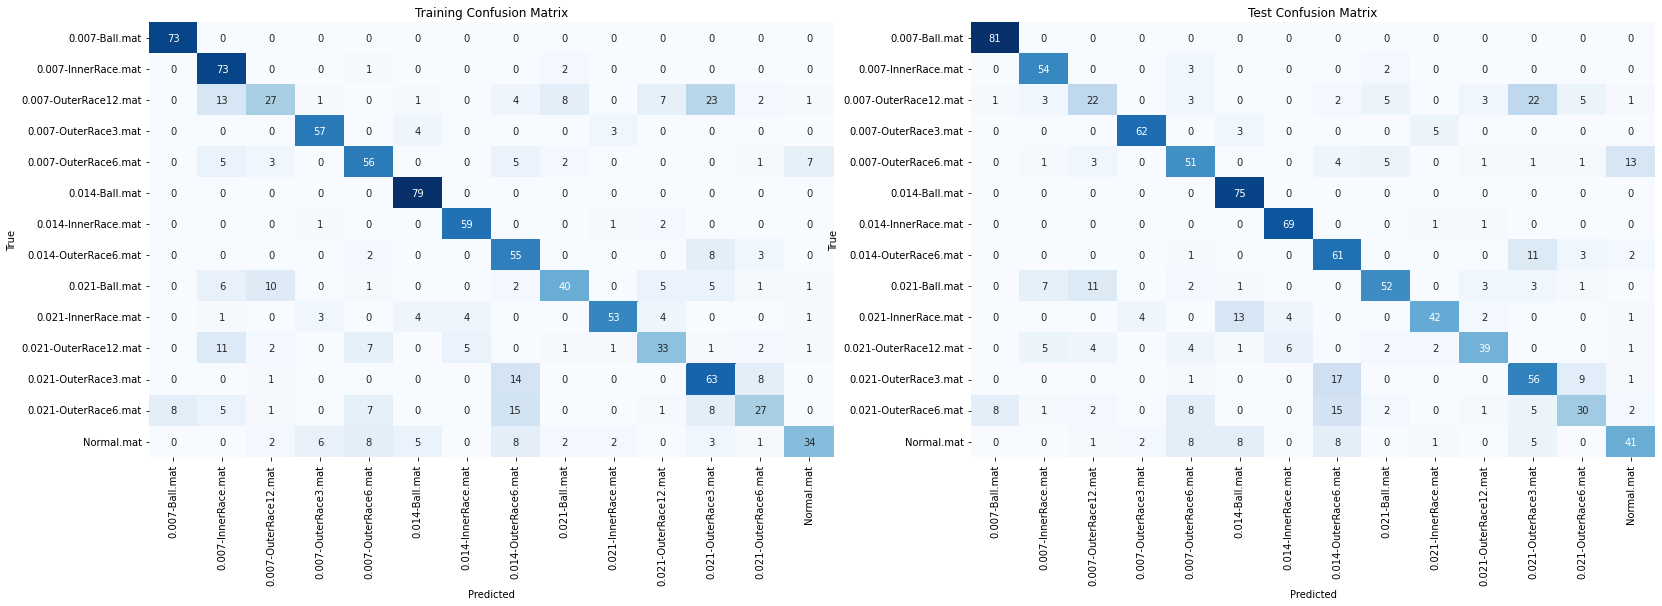

In [ ]:
fault_type = data_gabungan_DE.fault.unique()

plt.figure(3,figsize=(27,8))

plt.subplot(121)
sns.heatmap(test_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)

plt.subplot(122)
sns.heatmap(val_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [ ]:
class_report = classification_report(y_pred = val_predictions, y_true = y_val)
print(class_report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        81
           1       0.76      0.92      0.83        59
           2       0.51      0.33      0.40        67
           3       0.91      0.89      0.90        70
           4       0.63      0.64      0.63        80
           5       0.74      1.00      0.85        75
           6       0.87      0.97      0.92        71
           7       0.57      0.78      0.66        78
           8       0.76      0.65      0.70        80
           9       0.82      0.64      0.72        66
          10       0.78      0.61      0.68        64
          11       0.54      0.67      0.60        84
          12       0.61      0.41      0.49        74
          13       0.66      0.55      0.60        74

    accuracy                           0.72      1023
   macro avg       0.72      0.72      0.71      1023
weighted avg       0.72      0.72      0.71      1023



In [ ]:
print('Evaluate IRNN...')
model = Sequential()
model.add(JANET(hidden_units,  input_shape=X_train.shape[1:]))
model.add(Dense(64))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

rmsprop = Adam(lr=learning_rate, amsgrad=True)

model.compile(loss='categorical_crossentropy',
              optimizer=(Adam(lr=learning_rate)),
              metrics=['accuracy'])

Evaluate IRNN...
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 janet_2 (JANET)             (None, 128)               33280     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 41,666
Trainable params: 41,666
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


###### 3.4.3.1.1 Fitting

In [ ]:
hasil_model=model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=300,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[ModelCheckpoint('rnn_ta222301004.h5', monitor='val_accuracy',
                                     save_best_only=False, save_weights_only=False, mode='max')])

Epoch 1/300


11/11 [==============================] - 1s 35ms/step - loss: 0.5038 - accuracy: 0.8886 - val_loss: 0.3820 - val_accuracy: 0.9041
Epoch 2/300
11/11 [==============================] - 0s 10ms/step - loss: 0.3083 - accuracy: 0.8988 - val_loss: 0.2781 - val_accuracy: 0.9110
Epoch 3/300
11/11 [==============================] - 0s 8ms/step - loss: 0.2480 - accuracy: 0.9120 - val_loss: 0.2283 - val_accuracy: 0.9247
Epoch 4/300
11/11 [==============================] - 0s 8ms/step - loss: 0.2179 - accuracy: 0.9164 - val_loss: 0.1964 - val_accuracy: 0.9384
Epoch 5/300
11/11 [==============================] - 0s 10ms/step - loss: 0.1973 - accuracy: 0.9238 - val_loss: 0.1721 - val_accuracy: 0.9452
Epoch 6/300
11/11 [==============================] - 0s 8ms/step - loss: 0.1803 - accuracy: 0.9355 - val_loss: 0.1547 - val_accuracy: 0.9452
Epoch 7/300
11/11 [==============================] - 0s 9ms/step - loss: 0.1670 - accuracy: 0.9413 - val_loss: 0.1423 - val_accuracy: 0.9589
Epoch 8/300
11/11 [===

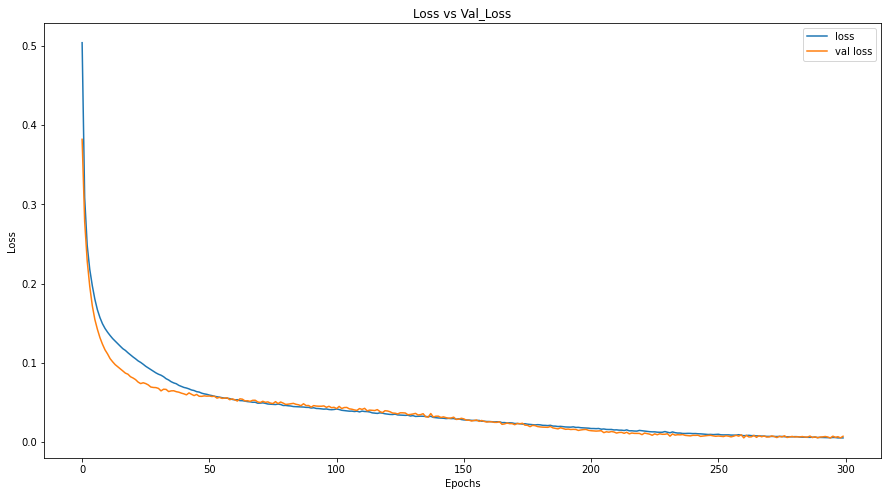

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(hasil_model.history['loss'], label = 'loss')
plt.plot(hasil_model.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

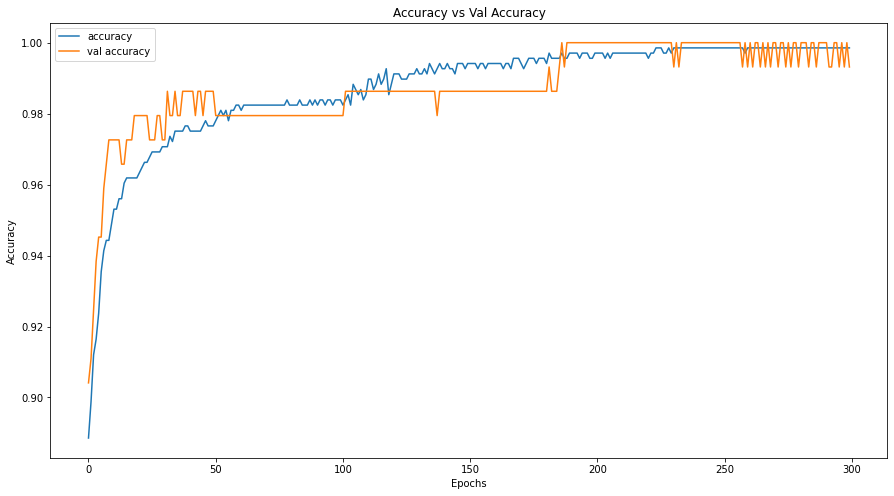

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(hasil_model.history['accuracy'], label = 'accuracy')
plt.plot(hasil_model.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy vs Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# MLP for Pima Indians Dataset serialize to YAML and HDF5
from tensorflow.keras.models import Sequential, model_from_json

In [ ]:
model.save('coba_save_model.h5')

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("rnn_janet.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("rnn_janet.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
model.save_weights("rnn_ta222301004.h5")

In [ ]:
print('Evaluate IRNN...')
reconstructed_model = Sequential()
reconstructed_model.add(JANET(hidden_units,  input_shape=X_train.shape[1:]))
# model.add(Dense())
reconstructed_model.add(Dense(num_classes, activation='softmax'))

reconstructed_model.summary()

rmsprop = Adam(lr=learning_rate, amsgrad=True)

reconstructed_model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

Evaluate IRNN...
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 janet_11 (JANET)            (None, 128)               33280     
                                                                 
 dense_14 (Dense)            (None, 14)                1806      
                                                                 
Total params: 35,086
Trainable params: 35,086
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


###### 3.4.3.1.2 Testing

##### coba 1

In [ ]:
reconstructed_model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

In [ ]:
scores = model.evaluate(X_val,y_val, verbose=1)
print('IndRNN test score:', scores[0])
print('IndRNN test accuracy:', scores[1])

5/5 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 1.0000
IndRNN test score: 0.006847997196018696
IndRNN test accuracy: 1.0


In [ ]:
pred = model.predict(X_test,verbose=1)

191/191 [==============================] - 3s 14ms/step


In [ ]:
tempp=pd.DataFrame(pred)

In [ ]:
arr_temp=[]
for i in range(len(y_test)):
  for j in range(len(y_test[i])):
    if(y_test[i][j]!=0.0):
      arr_temp.append(j)
      break

In [ ]:
len(arr_temp)

6088

In [ ]:
hasil_prediksi=pd.concat([pd.DataFrame(tempp.idxmax(axis=1)),pd.DataFrame(arr_temp)],axis=1)

In [ ]:
hasil_prediksi.columns=['pred','actual']

In [ ]:
hasil_prediksi['match']=hasil_prediksi.pred.eq(hasil_prediksi.actual)

In [ ]:
akurasi=hasil_prediksi.groupby('actual').match.mean().mul(100).round(2)

In [ ]:
akurasi.mean()

99.87642857142858

In [ ]:
akurasi

actual
0      99.75
1      99.75
2      99.75
3     100.00
4     100.00
5     100.00
6     100.00
7      99.76
8     100.00
9     100.00
10     99.75
11    100.00
12     99.75
13     99.76
Name: match, dtype: float64

    'Normal.mat' : 0,
    '0.007-InnerRace.mat' : 1,
    '0.014-InnerRace.mat' : 2,
    '0.021-InnerRace.mat' : 3,
    '0.028-InnerRace.mat' : 4,
    '0.007-OuterRace12.mat' : 5,
    '0.007-OuterRace3.mat' : 6,
    '0.007-OuterRace6.mat' : 7,
    '0.014-OuterRace3.mat' : 8,
    '0.014-OuterRace6.mat' : 9,
    '0.021-OuterRace12.mat' : 10,
    '0.021-OuterRace3.mat' : 11,
    '0.021-OuterRace6.mat' : 12,
    '0.007-Ball.mat': 13,
    '0.014-Ball.mat' : 14,
    '0.021-Ball.mat' : 15,
    '0.028-Ball.mat' : 16

In [ ]:
hasil_prediksi.loc[hasil_prediksi.actual==7]['pred'].value_counts()

7     414
11      1
Name: pred, dtype: int64

    'Normal':0,
    '0.007-Ball':1,
    '0.007-InnerRace':2,
    '0.007-OuterRace':3,
    '0.014-Ball':4,
    '0.014-InnerRace':5,
    '0.014-OuterRace':6,
    '0.021-Ball':7,
    '0.021-InnerRace':8,
    '0.021-OuterRace':9,
    '0.028-InnerRace':11,
    '0.028-Ball':10

In [ ]:
merged_dat_1730.head()

,rms,kurtosis,max,min,std,mean,crest_factor,skewness,fault
0,0.142884,-1.016337,0.319071,-0.292567,0.139922,0.028942,2.233083,-0.160392,0.007-Ball.mat
1,0.142884,-1.016337,0.319071,-0.292567,0.139922,0.028942,2.233083,-0.160392,0.007-Ball.mat
2,0.142884,-1.016337,0.319071,-0.292567,0.139922,0.028942,2.233083,-0.160392,0.007-Ball.mat
3,0.142884,-1.016337,0.319071,-0.292567,0.139922,0.028942,2.233083,-0.160392,0.007-Ball.mat
4,0.142884,-1.016337,0.319071,-0.292567,0.139922,0.028942,2.233083,-0.160392,0.007-Ball.mat


In [ ]:
merged_dat

,Unnamed: 0,rms,kurtosis,max,min,std,mean,crest_factor,skewness,fault
0,0,0.139206,-0.076075,0.457285,-0.361948,0.138378,0.015169,3.284940,0.138247,0.007-Ball.mat
1,1,0.139206,-0.076075,0.457285,-0.361948,0.138378,0.015169,3.284940,0.138247,0.007-Ball.mat
2,2,0.139206,-0.076075,0.457285,-0.361948,0.138378,0.015169,3.284940,0.138247,0.007-Ball.mat
3,3,0.139206,-0.076075,0.457285,-0.361948,0.138378,0.015169,3.284940,0.138247,0.007-Ball.mat
4,4,0.139206,-0.076075,0.457285,-0.361948,0.138378,0.015169,3.284940,0.138247,0.007-Ball.mat
...,...,...,...,...,...,...,...,...,...,...
15213,1007,0.068300,-0.225347,0.225305,-0.157087,0.067684,0.009154,3.298743,0.058845,Normal.mat
15214,1008,0.068300,-0.225347,0.225305,-0.157087,0.067684,0.009154,3.298743,0.058845,Normal.mat
15215,1009,0.068300,-0.225347,0.225305,-0.157087,0.067684,0.009154,3.298743,0.058845,Normal.mat
15216,1010,0.068300,-0.225347,0.225305,-0.157087,0.067684,0.009154,3.298743,0.058845,Normal.mat


In [ ]:
X_validasi = merged_dat_1730.drop('fault',axis=1)

y_datagabungan_validasi=data_gabungan_DE['fault'].replace({
    'Normal.mat' : 0,
    '0.007-InnerRace.mat' : 1,
    '0.014-InnerRace.mat' : 2,
    '0.021-InnerRace.mat' : 3,
    '0.007-OuterRace12.mat' : 4,
    '0.007-OuterRace3.mat' : 5,
    '0.007-OuterRace6.mat' : 6,
    '0.014-OuterRace6.mat' : 7,
    '0.021-OuterRace12.mat' : 8,
    '0.021-OuterRace3.mat' : 9,
    '0.021-OuterRace6.mat' : 10,
    '0.007-Ball.mat': 11,
    '0.014-Ball.mat' : 12,
    '0.021-Ball.mat' : 13,
})

y_validasi = to_categorical(y_datagabungan_validasi)

X_validasi_scaled = standard.transform(X_validasi)

X_validasi = np.array(X_validasi_scaled).reshape(X_validasi_scaled.shape[0], -1, 1)
X_validasi = np.array(X_validasi).astype('float32')

In [ ]:
y_validasi

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
scores = model.evaluate(X_validasi, y_validasi, verbose=1)
print('IndRNN test score:', scores[0])
print('IndRNN test accuracy:', scores[1])

476/476 [==============================] - 1s 3ms/step - loss: 15.9347 - accuracy: 6.5712e-05
IndRNN test score: 15.934738159179688
IndRNN test accuracy: 6.571165431523696e-05


In [ ]:
pip install tensorflow-model-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
n_model = Sequential()
n_model.add(keras.layers.InputLayer(input_shape=X_train.shape[1:]))
n_model.add(keras.layers.LSTM(hidden_units))
n_model.add(Dense(64,kernel_regularizer='l2'))
n_model.add(Dense(num_classes, activation='softmax'))

n_model.summary()

rmsprop = Adam(lr=learning_rate, amsgrad=True)

n_model.compile(loss='categorical_crossentropy',
              optimizer=(Adam(lr=learning_rate)),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 14)                910       
                                                                 
Total params: 75,726
Trainable params: 75,726
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
import tensorflow_model_optimization as tfmot

cluster_weights = tfmot.clustering.keras.cluster_weights
CentroidInitialization = tfmot.clustering.keras.CentroidInitialization

clustering_params = {
  'number_of_clusters': 16,
  'cluster_centroids_init': CentroidInitialization.LINEAR
}

# Cluster a whole model
clustered_model = cluster_weights(n_model, **clustering_params)

# Use smaller learning rate for fine-tuning clustered model
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)

clustered_model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=opt,
  metrics=['accuracy'])

clustered_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cluster_lstm (ClusterWeight  (None, 128)              132640    
 sRNN)                                                           
                                                                 
 cluster_dense_2 (ClusterWei  (None, 64)               16464     
 ghts)                                                           
                                                                 
 cluster_dense_3 (ClusterWei  (None, 14)               1822      
 ghts)                                                           
                                                                 
Total params: 150,926
Trainable params: 75,790
Non-trainable params: 75,136
_________________________________________________________________


In [ ]:
y_datagabungan.unique()

array([11,  1,  4,  5,  6, 12,  2,  7, 13,  3,  8,  9, 10,  0])

In [ ]:
temp=pd.concat([merged_dat_1.loc[merged_dat_1.fault=='Normal.mat'],
           merged_dat_1.loc[merged_dat_1.fault=='0.007-Ball.mat']],axis=0)

In [ ]:
X_temp = temp.drop(['fault','Unnamed: 0'],axis=1)
y_temp = temp['fault'].values

In [ ]:
X_temp_pcaed = PCA(n_components=2).fit_transform(X_temp)

In [ ]:
# y = to_categorical(y_temp)
X_train,X_test,y_train,y_test=train_test_split(X_temp_pcaed,
                                               y_temp,train_size=0.6,
                                               random_state=42)

X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,train_size=0.8,
                                             random_state=42)

# X_train = np.array(X_train).reshape(X_train.shape[0], -1, 1)
# X_test = np.array(X_test).reshape(X_test.shape[0], -1, 1)
# X_val = np.array(X_val).reshape(X_val.shape[0], -1, 1)
X_val = np.array(X_val).astype('float32')
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')

In [ ]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'Result of t-SNE on scaled data')

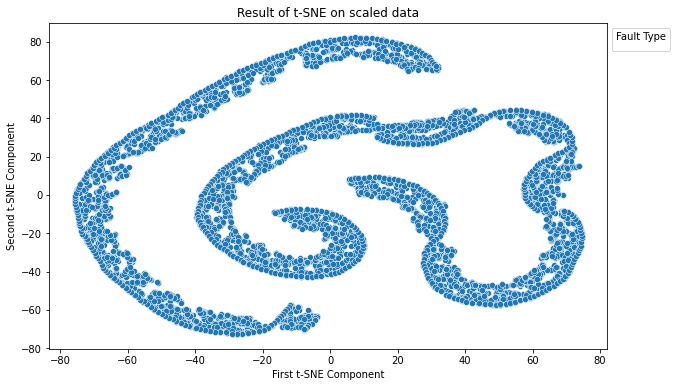

In [ ]:
tsne_res = TSNE(n_components=2,random_state=4).fit_transform(merged_dat_1.drop('fault',axis=1))
plt.figure(figsize=(10,6))
sns.scatterplot(
        x=tsne_res[:,0], y= tsne_res[:,1],
        palette=sns.color_palette("Paired",10),
        data=pd.DataFrame(tsne_res))
plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.title("Result of t-SNE on scaled data")

In [ ]:
sebelum_cluster = pd.concat([pd.DataFrame(X_datagabungan_scaled_pcaed).reset_index().drop('index',axis=1),pd.DataFrame(y_datagabungan).reset_index().drop('index',axis=1)],axis=1)
sebelum_cluster.columns = ['pca_1','pca_2','fault_type']

In [ ]:
setelah_cluster = pd.concat([pd.DataFrame(X_datagabungan_scaled_pcaed).reset_index().drop('index',axis=1),pd.DataFrame(label).reset_index().drop('index',axis=1)],axis=1)
setelah_cluster.columns = ['pca_1','pca_2','fault_type']

In [ ]:
setelah_cluster.shape

(6820, 3)

In [ ]:
sebelum_cluster.shape

(6820, 3)

In [ ]:
sebelum_cluster.groupby('fault_type')['fault_type'].count()

fault_type
0     486
1     486
2     486
3     489
4     485
5     487
6     488
7     489
8     487
9     485
10    489
11    489
12    487
13    487
Name: fault_type, dtype: int64

In [ ]:
setelah_cluster.groupby('fault_type')['fault_type'].count()

fault_type
0    3125
1    1354
2     343
3    1230
4     768
Name: fault_type, dtype: int64

In [ ]:
cluster_gabungan = pd.concat([pd.DataFrame(X_temp_pcaed).reset_index().drop('index',axis=1),
                                                pd.DataFrame(y_temp).reset_index().drop('index',axis=1),
                                                pd.DataFrame(label).reset_index().drop('index',axis=1)],axis=1)
cluster_gabungan.columns = ['pca_1','pca_2','fault_type','fault_cluster']

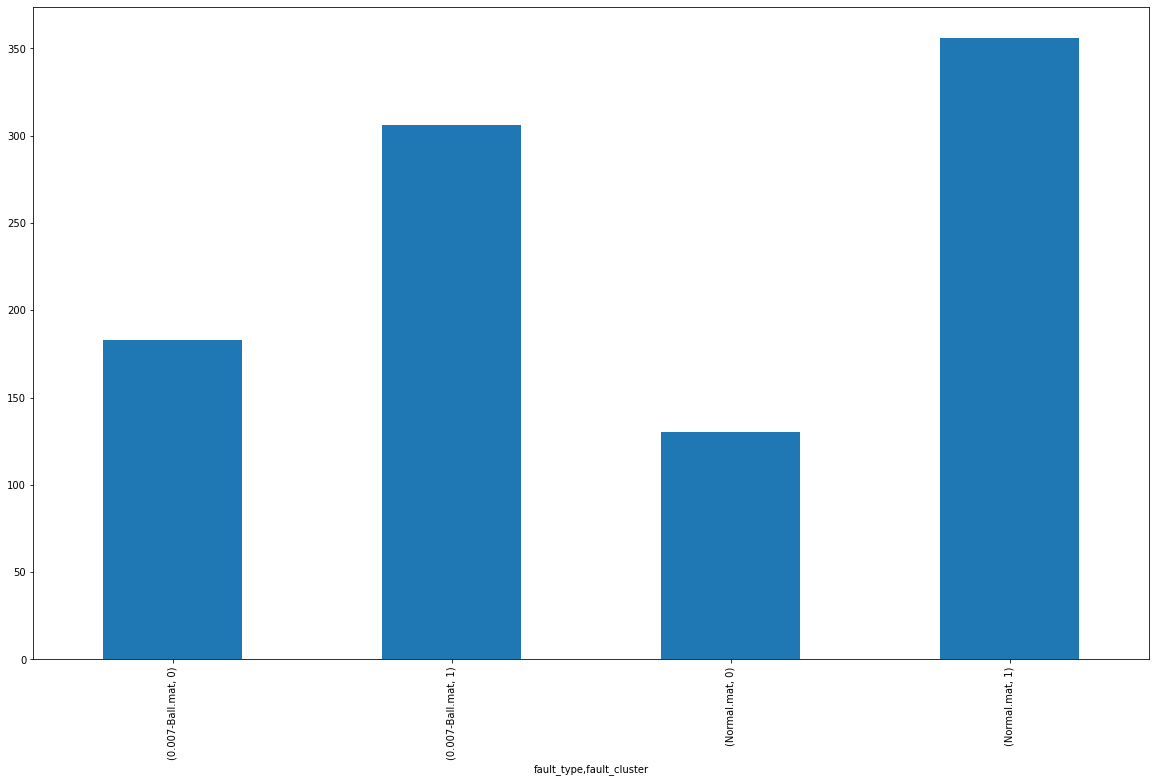

In [ ]:
plt.figure(figsize=(20,12))
cluster_gabungan.groupby(['fault_type','fault_cluster'])['fault_cluster'].count().plot(kind='bar')

In [ ]:
index_temp = setelah_cluster.loc[setelah_cluster.fault_type==2].index

In [ ]:
sebelum_cluster.iloc[index_temp,:].groupby('fault_type')['fault_type'].count()

fault_type
2       2
8     134
10      5
12      2
Name: fault_type, dtype: int64

In [ ]:
for i in range(len(label)):
  if(label[i]==y_datagabungan[i]):
    print(i)

5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269


In [ ]:
y_datagabungan

0        11
1        11
2        11
3        11
4        11
         ..
15213     0
15214     0
15215     0
15216     0
15217     0
Name: fault, Length: 15218, dtype: int64

In [ ]:
label

array([1, 1, 1, ..., 8, 8, 8], dtype=int32)

##### coba 2

In [ ]:
merged_dat_2.head()

,rms,kurtosis,max,min,std,mean,crest_factor,skewness,fault
0,0.142612,0.534681,0.415353,-0.405757,0.141999,0.0132,2.912476,0.023758,0.007-Ball.mat
1,0.142612,0.534681,0.415353,-0.405757,0.141999,0.0132,2.912476,0.023758,0.007-Ball.mat
2,0.142612,0.534681,0.415353,-0.405757,0.141999,0.0132,2.912476,0.023758,0.007-Ball.mat
3,0.142612,0.534681,0.415353,-0.405757,0.141999,0.0132,2.912476,0.023758,0.007-Ball.mat
4,0.142612,0.534681,0.415353,-0.405757,0.141999,0.0132,2.912476,0.023758,0.007-Ball.mat


In [ ]:
merged_dat.head()

,rms,kurtosis,max,min,std,mean,crest_factor,skewness,fault
0,0.139206,-0.076075,0.457285,-0.361948,0.138378,0.015169,3.28494,0.138247,0.007-Ball.mat
1,0.139206,-0.076075,0.457285,-0.361948,0.138378,0.015169,3.28494,0.138247,0.007-Ball.mat
2,0.139206,-0.076075,0.457285,-0.361948,0.138378,0.015169,3.28494,0.138247,0.007-Ball.mat
3,0.139206,-0.076075,0.457285,-0.361948,0.138378,0.015169,3.28494,0.138247,0.007-Ball.mat
4,0.139206,-0.076075,0.457285,-0.361948,0.138378,0.015169,3.28494,0.138247,0.007-Ball.mat


In [ ]:
merged_dat_2.loc[merged_dat_2.fault=='0.007-Ball.mat'].describe()

,rms,kurtosis,max,min,std,mean,crest_factor
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,0.142613,0.534240,0.415625,-0.406086,0.142000,0.013203,2.914351
std,0.000031,0.014053,0.008670,0.010497,0.000022,0.000093,0.059735
min,0.142612,0.086951,0.415353,-0.740167,0.141999,0.013200,2.912476
25%,0.142612,0.534681,0.415353,-0.405757,0.141999,0.013200,2.912476
50%,0.142612,0.534681,0.415353,-0.405757,0.141999,0.013200,2.912476
75%,0.142612,0.534681,0.415353,-0.405757,0.141999,0.013200,2.912476
max,0.143609,0.534681,0.691560,-0.405757,0.142697,0.016156,4.815576


In [ ]:
merged_dat.loc[merged_dat.fault=='0.007-Ball.mat'].describe()

,rms,kurtosis,max,min,std,mean,crest_factor
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,0.139210,-0.075960,0.457489,-0.362238,0.138382,0.015168,3.286272
std,0.000126,0.003681,0.006499,0.009271,0.000128,0.000016,0.042489
min,0.139206,-0.076075,0.457285,-0.657764,0.138378,0.014664,3.284940
25%,0.139206,-0.076075,0.457285,-0.361948,0.138378,0.015169,3.284940
50%,0.139206,-0.076075,0.457285,-0.361948,0.138378,0.015169,3.284940
75%,0.139206,-0.076075,0.457285,-0.361948,0.138378,0.015169,3.284940
max,0.143225,0.041363,0.664649,-0.361948,0.142472,0.015169,4.640600


In [ ]:
data_gabungan_validasi = merged_dat_2.copy()
data_gabungan_validasi = data_gabungan_validasi.loc[data_gabungan_validasi.fault=='0.007-Ball.mat']

In [ ]:
X_datagabungan = data_gabungan_validasi.drop('fault',axis=1)

In [ ]:
X_datagabungan_scaled = standard.transform(X_datagabungan)

In [ ]:
X_datagabungan_scaled

array([[-0.68102073,  0.28824925, -0.68770126, ..., -0.27504156,
         0.00456729,  0.03072115],
       [-0.68102073,  0.28824925, -0.68770126, ..., -0.27504156,
         0.00456729,  0.03072115],
       [-0.68102073,  0.28824925, -0.68770126, ..., -0.27504156,
         0.00456729,  0.03072115],
       ...,
       [-0.68102073,  0.28824925, -0.68770126, ..., -0.27504156,
         0.00456729,  0.03072115],
       [-0.68102073,  0.28824925, -0.68770126, ..., -0.27504156,
         0.00456729,  0.03072115],
       [-0.67804179, -0.05046951, -0.38714501, ...,  0.23995471,
         4.20674045, -0.0579165 ]])

In [ ]:
preprocessing.StandardScaler().fit_transform(X_datagabungan)

array([[-3.14037147e-02,  3.14037147e-02, -3.14037147e-02, ...,
        -3.14037147e-02, -3.14037147e-02,  3.14037147e-02],
       [-3.14037147e-02,  3.14037147e-02, -3.14037147e-02, ...,
        -3.14037147e-02, -3.14037147e-02,  3.14037147e-02],
       [-3.14037147e-02,  3.14037147e-02, -3.14037147e-02, ...,
        -3.14037147e-02, -3.14037147e-02,  3.14037147e-02],
       ...,
       [-3.14037147e-02,  3.14037147e-02, -3.14037147e-02, ...,
        -3.14037147e-02, -3.14037147e-02,  3.14037147e-02],
       [-3.14037147e-02,  3.14037147e-02, -3.14037147e-02, ...,
        -3.14037147e-02, -3.14037147e-02,  3.14037147e-02],
       [ 3.18433667e+01, -3.18433667e+01,  3.18433667e+01, ...,
         3.18433667e+01,  3.18433667e+01, -3.18433667e+01]])

In [ ]:
y_datagabungan=data_gabungan_validasi['fault'].replace({
    'Normal.mat' : 0,
    '0.007-InnerRace.mat' : 1,
    '0.014-InnerRace.mat' : 2,
    '0.021-InnerRace.mat' : 3,
    '0.007-OuterRace12.mat' : 4,
    '0.007-OuterRace3.mat' : 5,
    '0.007-OuterRace6.mat' : 6,
    '0.014-OuterRace6.mat' : 7,
    '0.021-OuterRace12.mat' : 8,
    '0.021-OuterRace3.mat' : 9,
    '0.021-OuterRace6.mat' : 10,
    '0.007-Ball.mat': 11,
    '0.014-Ball.mat' : 12,
    '0.021-Ball.mat' : 13,
})

y = to_categorical(y_datagabungan)

In [ ]:
X = np.array(X_datagabungan_scaled).reshape(X_datagabungan.shape[0], -1, 1)

In [ ]:
X.shape

(1015, 8, 1)

In [ ]:
y.shape

(1015, 12)

In [ ]:
pred_val = model.predict(X)

32/32 [==============================] - 2s 62ms/step


In [ ]:
tempp=pd.DataFrame(pred_val)

arr_temp=[]
for i in range(len(y)):
  for j in range(len(y[i])):
    if(y[i][j]!=0.0):
      arr_temp.append(j)
      break

hasil_prediksi=pd.concat([pd.DataFrame(tempp.idxmax(axis=1)),pd.DataFrame(arr_temp)],axis=1)

hasil_prediksi.columns=['pred','actual']
hasil_prediksi['match']=hasil_prediksi.pred.eq(hasil_prediksi.actual)
akurasi=hasil_prediksi.groupby('actual').match.mean().mul(100).round(2)

In [ ]:
akurasi

actual
11    0.1
Name: match, dtype: float64

##### 3.4.3.2 Metode 2

In [ ]:
print('Evaluate IRNN...')
model_2 = Sequential()
model_2.add(JANET(hidden_units,  input_shape=X_train.shape[1:]))
model_2.add(tf.keras.layers.Dropout(0.5))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.summary()

rmsprop = Adam(lr=learning_rate, amsgrad=True)

model_2.compile(loss='categorical_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

Evaluate IRNN...
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 janet_5 (JANET)             (None, 256)               132096    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 12)                3084      
                                                                 
Total params: 135,180
Trainable params: 135,180
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
hasil_model_2=model_2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=200,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[ModelCheckpoint('weights/janet_mnist.h5', monitor='val_acc',
                                     save_best_only=True, save_weights_only=True, mode='max')])

Epoch 1/200
219/221 [============================>.] - ETA: 0s - loss: 1.6020 - accuracy: 0.3956

221/221 [==============================] - 4s 18ms/step - loss: 1.6014 - accuracy: 0.3957 - val_loss: 1.5770 - val_accuracy: 0.3880
Epoch 2/200
213/221 [===========================>..] - ETA: 0s - loss: 1.6013 - accuracy: 0.3944

221/221 [==============================] - 2s 10ms/step - loss: 1.6017 - accuracy: 0.3940 - val_loss: 1.5758 - val_accuracy: 0.3940
Epoch 3/200
214/221 [============================>.] - ETA: 0s - loss: 1.6014 - accuracy: 0.3944

221/221 [==============================] - 2s 9ms/step - loss: 1.6010 - accuracy: 0.3943 - val_loss: 1.5753 - val_accuracy: 0.4073
Epoch 4/200
213/221 [===========================>..] - ETA: 0s - loss: 1.5947 - accuracy: 0.3959

221/221 [==============================] - 2s 9ms/step - loss: 1.5976 - accuracy: 0.3946 - val_loss: 1.5768 - val_accuracy: 0.3914
Epoch 5/200
212/221 [===========================>..] - ETA: 0s - loss: 1.5966 - accuracy: 0.3935

221/221 [==============================] - 2s 9ms/step - loss: 1.5982 - accuracy: 0.3930 - val_loss: 1.5734 - val_accuracy: 0.3869
Epoch 6/200
218/221 [============================>.] - ETA: 0s - loss: 1.5977 - accuracy: 0.3910

221/221 [==============================] - 2s 9ms/step - loss: 1.5973 - accuracy: 0.3913 - val_loss: 1.5703 - val_accuracy: 0.4045
Epoch 7/200
218/221 [============================>.] - ETA: 0s - loss: 1.5972 - accuracy: 0.3944

221/221 [==============================] - 2s 8ms/step - loss: 1.5966 - accuracy: 0.3947 - val_loss: 1.5704 - val_accuracy: 0.3979
Epoch 8/200
212/221 [===========================>..] - ETA: 0s - loss: 1.5948 - accuracy: 0.3951

221/221 [==============================] - 2s 9ms/step - loss: 1.5956 - accuracy: 0.3953 - val_loss: 1.5695 - val_accuracy: 0.3991
Epoch 9/200
216/221 [============================>.] - ETA: 0s - loss: 1.5948 - accuracy: 0.3969

221/221 [==============================] - 2s 9ms/step - loss: 1.5944 - accuracy: 0.3971 - val_loss: 1.5661 - val_accuracy: 0.4007
Epoch 10/200
219/221 [============================>.] - ETA: 0s - loss: 1.5928 - accuracy: 0.3927

221/221 [==============================] - 2s 9ms/step - loss: 1.5930 - accuracy: 0.3927 - val_loss: 1.5666 - val_accuracy: 0.3992
Epoch 11/200
216/221 [============================>.] - ETA: 0s - loss: 1.5913 - accuracy: 0.4002

221/221 [==============================] - 2s 9ms/step - loss: 1.5910 - accuracy: 0.4004 - val_loss: 1.5670 - val_accuracy: 0.4006
Epoch 12/200
220/221 [============================>.] - ETA: 0s - loss: 1.5929 - accuracy: 0.3942

221/221 [==============================] - 2s 9ms/step - loss: 1.5927 - accuracy: 0.3943 - val_loss: 1.5663 - val_accuracy: 0.4073
Epoch 13/200
219/221 [============================>.] - ETA: 0s - loss: 1.5910 - accuracy: 0.3956

221/221 [==============================] - 2s 9ms/step - loss: 1.5909 - accuracy: 0.3960 - val_loss: 1.5629 - val_accuracy: 0.4077
Epoch 14/200
213/221 [===========================>..] - ETA: 0s - loss: 1.5880 - accuracy: 0.3998

221/221 [==============================] - 2s 9ms/step - loss: 1.5882 - accuracy: 0.3994 - val_loss: 1.5619 - val_accuracy: 0.4056
Epoch 15/200
212/221 [===========================>..] - ETA: 0s - loss: 1.5897 - accuracy: 0.3985

221/221 [==============================] - 2s 9ms/step - loss: 1.5904 - accuracy: 0.3986 - val_loss: 1.5603 - val_accuracy: 0.4107
Epoch 16/200
216/221 [============================>.] - ETA: 0s - loss: 1.5887 - accuracy: 0.3996

221/221 [==============================] - 2s 9ms/step - loss: 1.5887 - accuracy: 0.4001 - val_loss: 1.5617 - val_accuracy: 0.3940
Epoch 17/200
213/221 [===========================>..] - ETA: 0s - loss: 1.5875 - accuracy: 0.4002

221/221 [==============================] - 2s 9ms/step - loss: 1.5873 - accuracy: 0.4003 - val_loss: 1.5589 - val_accuracy: 0.4080
Epoch 18/200
213/221 [===========================>..] - ETA: 0s - loss: 1.5848 - accuracy: 0.3986

221/221 [==============================] - 2s 9ms/step - loss: 1.5868 - accuracy: 0.3983 - val_loss: 1.5595 - val_accuracy: 0.4046
Epoch 19/200
213/221 [===========================>..] - ETA: 0s - loss: 1.5848 - accuracy: 0.3977

221/221 [==============================] - 2s 9ms/step - loss: 1.5855 - accuracy: 0.3977 - val_loss: 1.5576 - val_accuracy: 0.4026
Epoch 20/200
213/221 [===========================>..] - ETA: 0s - loss: 1.5873 - accuracy: 0.3964

221/221 [==============================] - 2s 9ms/step - loss: 1.5873 - accuracy: 0.3968 - val_loss: 1.5575 - val_accuracy: 0.4056
Epoch 21/200
219/221 [============================>.] - ETA: 0s - loss: 1.5862 - accuracy: 0.3984

221/221 [==============================] - 3s 12ms/step - loss: 1.5860 - accuracy: 0.3986 - val_loss: 1.5568 - val_accuracy: 0.4034
Epoch 22/200
218/221 [============================>.] - ETA: 0s - loss: 1.5789 - accuracy: 0.4013

221/221 [==============================] - 2s 11ms/step - loss: 1.5794 - accuracy: 0.4010 - val_loss: 1.5561 - val_accuracy: 0.3962
Epoch 23/200
218/221 [============================>.] - ETA: 0s - loss: 1.5832 - accuracy: 0.3964

221/221 [==============================] - 2s 9ms/step - loss: 1.5834 - accuracy: 0.3961 - val_loss: 1.5555 - val_accuracy: 0.4070
Epoch 24/200
215/221 [============================>.] - ETA: 0s - loss: 1.5798 - accuracy: 0.4030

221/221 [==============================] - 3s 12ms/step - loss: 1.5807 - accuracy: 0.4025 - val_loss: 1.5542 - val_accuracy: 0.4026
Epoch 25/200
218/221 [============================>.] - ETA: 0s - loss: 1.5833 - accuracy: 0.4020

221/221 [==============================] - 2s 9ms/step - loss: 1.5836 - accuracy: 0.4016 - val_loss: 1.5535 - val_accuracy: 0.4042
Epoch 26/200
219/221 [============================>.] - ETA: 0s - loss: 1.5807 - accuracy: 0.4021

221/221 [==============================] - 2s 9ms/step - loss: 1.5801 - accuracy: 0.4021 - val_loss: 1.5515 - val_accuracy: 0.4113
Epoch 27/200
219/221 [============================>.] - ETA: 0s - loss: 1.5832 - accuracy: 0.3965

221/221 [==============================] - 2s 9ms/step - loss: 1.5826 - accuracy: 0.3968 - val_loss: 1.5548 - val_accuracy: 0.4050
Epoch 28/200
218/221 [============================>.] - ETA: 0s - loss: 1.5771 - accuracy: 0.4007

221/221 [==============================] - 2s 9ms/step - loss: 1.5780 - accuracy: 0.4009 - val_loss: 1.5518 - val_accuracy: 0.4109
Epoch 29/200
219/221 [============================>.] - ETA: 0s - loss: 1.5751 - accuracy: 0.4019

221/221 [==============================] - 2s 9ms/step - loss: 1.5756 - accuracy: 0.4014 - val_loss: 1.5503 - val_accuracy: 0.4175
Epoch 30/200
220/221 [============================>.] - ETA: 0s - loss: 1.5784 - accuracy: 0.4023

221/221 [==============================] - 2s 9ms/step - loss: 1.5784 - accuracy: 0.4022 - val_loss: 1.5501 - val_accuracy: 0.4095
Epoch 31/200
218/221 [============================>.] - ETA: 0s - loss: 1.5759 - accuracy: 0.4020

221/221 [==============================] - 2s 9ms/step - loss: 1.5755 - accuracy: 0.4020 - val_loss: 1.5489 - val_accuracy: 0.4157
Epoch 32/200
213/221 [===========================>..] - ETA: 0s - loss: 1.5755 - accuracy: 0.3989

221/221 [==============================] - 2s 9ms/step - loss: 1.5753 - accuracy: 0.3991 - val_loss: 1.5479 - val_accuracy: 0.4090
Epoch 33/200
217/221 [============================>.] - ETA: 0s - loss: 1.5760 - accuracy: 0.4027

221/221 [==============================] - 2s 9ms/step - loss: 1.5756 - accuracy: 0.4025 - val_loss: 1.5483 - val_accuracy: 0.4148
Epoch 34/200
217/221 [============================>.] - ETA: 0s - loss: 1.5747 - accuracy: 0.4050

221/221 [==============================] - 2s 9ms/step - loss: 1.5736 - accuracy: 0.4058 - val_loss: 1.5456 - val_accuracy: 0.4069
Epoch 35/200
213/221 [===========================>..] - ETA: 0s - loss: 1.5738 - accuracy: 0.4029

221/221 [==============================] - 2s 9ms/step - loss: 1.5717 - accuracy: 0.4041 - val_loss: 1.5468 - val_accuracy: 0.4135
Epoch 36/200
217/221 [============================>.] - ETA: 0s - loss: 1.5696 - accuracy: 0.4057

221/221 [==============================] - 2s 9ms/step - loss: 1.5700 - accuracy: 0.4059 - val_loss: 1.5480 - val_accuracy: 0.3973
Epoch 37/200
221/221 [==============================] - ETA: 0s - loss: 1.5750 - accuracy: 0.4014

221/221 [==============================] - 2s 9ms/step - loss: 1.5750 - accuracy: 0.4014 - val_loss: 1.5453 - val_accuracy: 0.4061
Epoch 38/200
219/221 [============================>.] - ETA: 0s - loss: 1.5741 - accuracy: 0.4030

221/221 [==============================] - 2s 9ms/step - loss: 1.5731 - accuracy: 0.4034 - val_loss: 1.5452 - val_accuracy: 0.4176
Epoch 39/200
219/221 [============================>.] - ETA: 0s - loss: 1.5749 - accuracy: 0.4022

221/221 [==============================] - 2s 9ms/step - loss: 1.5740 - accuracy: 0.4025 - val_loss: 1.5458 - val_accuracy: 0.3957
Epoch 40/200
215/221 [============================>.] - ETA: 0s - loss: 1.5729 - accuracy: 0.4006

221/221 [==============================] - 2s 9ms/step - loss: 1.5736 - accuracy: 0.4007 - val_loss: 1.5433 - val_accuracy: 0.4091
Epoch 41/200
218/221 [============================>.] - ETA: 0s - loss: 1.5727 - accuracy: 0.4045

221/221 [==============================] - 2s 10ms/step - loss: 1.5730 - accuracy: 0.4041 - val_loss: 1.5458 - val_accuracy: 0.3967
Epoch 42/200
216/221 [============================>.] - ETA: 0s - loss: 1.5694 - accuracy: 0.4028

221/221 [==============================] - 2s 9ms/step - loss: 1.5686 - accuracy: 0.4034 - val_loss: 1.5451 - val_accuracy: 0.4131
Epoch 43/200
219/221 [============================>.] - ETA: 0s - loss: 1.5690 - accuracy: 0.4053

221/221 [==============================] - 2s 10ms/step - loss: 1.5691 - accuracy: 0.4055 - val_loss: 1.5472 - val_accuracy: 0.3985
Epoch 44/200
220/221 [============================>.] - ETA: 0s - loss: 1.5700 - accuracy: 0.4045

221/221 [==============================] - 2s 9ms/step - loss: 1.5697 - accuracy: 0.4046 - val_loss: 1.5418 - val_accuracy: 0.4026
Epoch 45/200
214/221 [============================>.] - ETA: 0s - loss: 1.5658 - accuracy: 0.4044

221/221 [==============================] - 2s 10ms/step - loss: 1.5646 - accuracy: 0.4042 - val_loss: 1.5421 - val_accuracy: 0.4213
Epoch 46/200
219/221 [============================>.] - ETA: 0s - loss: 1.5686 - accuracy: 0.4055

221/221 [==============================] - 2s 9ms/step - loss: 1.5691 - accuracy: 0.4052 - val_loss: 1.5394 - val_accuracy: 0.4167
Epoch 47/200
212/221 [===========================>..] - ETA: 0s - loss: 1.5667 - accuracy: 0.4053

221/221 [==============================] - 2s 9ms/step - loss: 1.5671 - accuracy: 0.4056 - val_loss: 1.5405 - val_accuracy: 0.4185
Epoch 48/200
219/221 [============================>.] - ETA: 0s - loss: 1.5703 - accuracy: 0.4036

221/221 [==============================] - 2s 9ms/step - loss: 1.5701 - accuracy: 0.4037 - val_loss: 1.5406 - val_accuracy: 0.4194
Epoch 49/200
219/221 [============================>.] - ETA: 0s - loss: 1.5683 - accuracy: 0.4044

221/221 [==============================] - 3s 12ms/step - loss: 1.5676 - accuracy: 0.4046 - val_loss: 1.5396 - val_accuracy: 0.4048
Epoch 50/200
219/221 [============================>.] - ETA: 0s - loss: 1.5631 - accuracy: 0.4037

221/221 [==============================] - 2s 9ms/step - loss: 1.5630 - accuracy: 0.4036 - val_loss: 1.5400 - val_accuracy: 0.4155
Epoch 51/200
218/221 [============================>.] - ETA: 0s - loss: 1.5640 - accuracy: 0.4058

221/221 [==============================] - 2s 9ms/step - loss: 1.5639 - accuracy: 0.4053 - val_loss: 1.5419 - val_accuracy: 0.4022
Epoch 52/200
217/221 [============================>.] - ETA: 0s - loss: 1.5588 - accuracy: 0.4105

221/221 [==============================] - 2s 9ms/step - loss: 1.5594 - accuracy: 0.4102 - val_loss: 1.5385 - val_accuracy: 0.4081
Epoch 53/200
215/221 [============================>.] - ETA: 0s - loss: 1.5690 - accuracy: 0.4042

221/221 [==============================] - 2s 10ms/step - loss: 1.5696 - accuracy: 0.4036 - val_loss: 1.5358 - val_accuracy: 0.4202
Epoch 54/200
220/221 [============================>.] - ETA: 0s - loss: 1.5626 - accuracy: 0.4076

221/221 [==============================] - 2s 10ms/step - loss: 1.5624 - accuracy: 0.4077 - val_loss: 1.5382 - val_accuracy: 0.4042
Epoch 55/200
219/221 [============================>.] - ETA: 0s - loss: 1.5643 - accuracy: 0.4056

221/221 [==============================] - 2s 9ms/step - loss: 1.5641 - accuracy: 0.4057 - val_loss: 1.5371 - val_accuracy: 0.4198
Epoch 56/200
218/221 [============================>.] - ETA: 0s - loss: 1.5648 - accuracy: 0.4044

221/221 [==============================] - 2s 9ms/step - loss: 1.5643 - accuracy: 0.4046 - val_loss: 1.5367 - val_accuracy: 0.4225
Epoch 57/200
214/221 [============================>.] - ETA: 0s - loss: 1.5641 - accuracy: 0.4055

221/221 [==============================] - 2s 9ms/step - loss: 1.5634 - accuracy: 0.4051 - val_loss: 1.5336 - val_accuracy: 0.4234
Epoch 58/200
218/221 [============================>.] - ETA: 0s - loss: 1.5650 - accuracy: 0.4025

221/221 [==============================] - 2s 9ms/step - loss: 1.5650 - accuracy: 0.4022 - val_loss: 1.5344 - val_accuracy: 0.4257
Epoch 59/200
214/221 [============================>.] - ETA: 0s - loss: 1.5612 - accuracy: 0.4081

221/221 [==============================] - 2s 9ms/step - loss: 1.5615 - accuracy: 0.4073 - val_loss: 1.5349 - val_accuracy: 0.4192
Epoch 60/200
217/221 [============================>.] - ETA: 0s - loss: 1.5608 - accuracy: 0.4053

221/221 [==============================] - 2s 9ms/step - loss: 1.5611 - accuracy: 0.4055 - val_loss: 1.5343 - val_accuracy: 0.4028
Epoch 61/200
219/221 [============================>.] - ETA: 0s - loss: 1.5618 - accuracy: 0.4062

221/221 [==============================] - 2s 9ms/step - loss: 1.5618 - accuracy: 0.4060 - val_loss: 1.5352 - val_accuracy: 0.4258
Epoch 62/200
220/221 [============================>.] - ETA: 0s - loss: 1.5632 - accuracy: 0.4083

221/221 [==============================] - 2s 9ms/step - loss: 1.5631 - accuracy: 0.4083 - val_loss: 1.5331 - val_accuracy: 0.4236
Epoch 63/200
213/221 [===========================>..] - ETA: 0s - loss: 1.5613 - accuracy: 0.4082

221/221 [==============================] - 2s 9ms/step - loss: 1.5610 - accuracy: 0.4079 - val_loss: 1.5333 - val_accuracy: 0.4141
Epoch 64/200
212/221 [===========================>..] - ETA: 0s - loss: 1.5615 - accuracy: 0.4064

221/221 [==============================] - 2s 9ms/step - loss: 1.5635 - accuracy: 0.4073 - val_loss: 1.5327 - val_accuracy: 0.4278
Epoch 65/200
219/221 [============================>.] - ETA: 0s - loss: 1.5634 - accuracy: 0.4058

221/221 [==============================] - 2s 9ms/step - loss: 1.5632 - accuracy: 0.4061 - val_loss: 1.5315 - val_accuracy: 0.4152
Epoch 66/200
216/221 [============================>.] - ETA: 0s - loss: 1.5610 - accuracy: 0.4076

221/221 [==============================] - 2s 9ms/step - loss: 1.5607 - accuracy: 0.4073 - val_loss: 1.5325 - val_accuracy: 0.4128
Epoch 67/200
221/221 [==============================] - ETA: 0s - loss: 1.5598 - accuracy: 0.4072

221/221 [==============================] - 2s 9ms/step - loss: 1.5598 - accuracy: 0.4072 - val_loss: 1.5358 - val_accuracy: 0.4075
Epoch 68/200
218/221 [============================>.] - ETA: 0s - loss: 1.5644 - accuracy: 0.4085

221/221 [==============================] - 2s 9ms/step - loss: 1.5643 - accuracy: 0.4089 - val_loss: 1.5324 - val_accuracy: 0.4124
Epoch 69/200
219/221 [============================>.] - ETA: 0s - loss: 1.5571 - accuracy: 0.4105

221/221 [==============================] - 2s 9ms/step - loss: 1.5577 - accuracy: 0.4102 - val_loss: 1.5302 - val_accuracy: 0.4284
Epoch 70/200
218/221 [============================>.] - ETA: 0s - loss: 1.5605 - accuracy: 0.4081

221/221 [==============================] - 2s 9ms/step - loss: 1.5614 - accuracy: 0.4077 - val_loss: 1.5327 - val_accuracy: 0.4237
Epoch 71/200
212/221 [===========================>..] - ETA: 0s - loss: 1.5613 - accuracy: 0.4071

221/221 [==============================] - 2s 9ms/step - loss: 1.5604 - accuracy: 0.4070 - val_loss: 1.5308 - val_accuracy: 0.4165
Epoch 72/200
219/221 [============================>.] - ETA: 0s - loss: 1.5598 - accuracy: 0.4081

221/221 [==============================] - 2s 9ms/step - loss: 1.5593 - accuracy: 0.4084 - val_loss: 1.5293 - val_accuracy: 0.4141
Epoch 73/200
220/221 [============================>.] - ETA: 0s - loss: 1.5588 - accuracy: 0.4044

221/221 [==============================] - 2s 9ms/step - loss: 1.5586 - accuracy: 0.4045 - val_loss: 1.5276 - val_accuracy: 0.4207
Epoch 74/200
221/221 [==============================] - ETA: 0s - loss: 1.5587 - accuracy: 0.4072

221/221 [==============================] - 2s 10ms/step - loss: 1.5587 - accuracy: 0.4072 - val_loss: 1.5287 - val_accuracy: 0.4232
Epoch 75/200
214/221 [============================>.] - ETA: 0s - loss: 1.5576 - accuracy: 0.4098

221/221 [==============================] - 2s 9ms/step - loss: 1.5585 - accuracy: 0.4098 - val_loss: 1.5292 - val_accuracy: 0.4195
Epoch 76/200
218/221 [============================>.] - ETA: 0s - loss: 1.5521 - accuracy: 0.4108

221/221 [==============================] - 2s 9ms/step - loss: 1.5526 - accuracy: 0.4107 - val_loss: 1.5301 - val_accuracy: 0.4142
Epoch 77/200
220/221 [============================>.] - ETA: 0s - loss: 1.5574 - accuracy: 0.4090

221/221 [==============================] - 2s 9ms/step - loss: 1.5574 - accuracy: 0.4090 - val_loss: 1.5335 - val_accuracy: 0.4048
Epoch 78/200
216/221 [============================>.] - ETA: 0s - loss: 1.5533 - accuracy: 0.4117

221/221 [==============================] - 2s 9ms/step - loss: 1.5538 - accuracy: 0.4110 - val_loss: 1.5302 - val_accuracy: 0.4095
Epoch 79/200
213/221 [===========================>..] - ETA: 0s - loss: 1.5573 - accuracy: 0.4099

221/221 [==============================] - 2s 9ms/step - loss: 1.5576 - accuracy: 0.4099 - val_loss: 1.5277 - val_accuracy: 0.4280
Epoch 80/200
220/221 [============================>.] - ETA: 0s - loss: 1.5583 - accuracy: 0.4095

221/221 [==============================] - 2s 9ms/step - loss: 1.5583 - accuracy: 0.4095 - val_loss: 1.5275 - val_accuracy: 0.4212
Epoch 81/200
216/221 [============================>.] - ETA: 0s - loss: 1.5537 - accuracy: 0.4124

221/221 [==============================] - 2s 9ms/step - loss: 1.5539 - accuracy: 0.4113 - val_loss: 1.5284 - val_accuracy: 0.4165
Epoch 82/200
216/221 [============================>.] - ETA: 0s - loss: 1.5552 - accuracy: 0.4104

221/221 [==============================] - 2s 9ms/step - loss: 1.5557 - accuracy: 0.4107 - val_loss: 1.5261 - val_accuracy: 0.4218
Epoch 83/200
215/221 [============================>.] - ETA: 0s - loss: 1.5551 - accuracy: 0.4089

221/221 [==============================] - 2s 9ms/step - loss: 1.5552 - accuracy: 0.4088 - val_loss: 1.5267 - val_accuracy: 0.4253
Epoch 84/200
221/221 [==============================] - ETA: 0s - loss: 1.5560 - accuracy: 0.4110

221/221 [==============================] - 2s 9ms/step - loss: 1.5560 - accuracy: 0.4110 - val_loss: 1.5267 - val_accuracy: 0.4161
Epoch 85/200
214/221 [============================>.] - ETA: 0s - loss: 1.5576 - accuracy: 0.4096

221/221 [==============================] - 2s 9ms/step - loss: 1.5554 - accuracy: 0.4099 - val_loss: 1.5281 - val_accuracy: 0.4177
Epoch 86/200
219/221 [============================>.] - ETA: 0s - loss: 1.5562 - accuracy: 0.4065

221/221 [==============================] - 2s 9ms/step - loss: 1.5559 - accuracy: 0.4067 - val_loss: 1.5249 - val_accuracy: 0.4233
Epoch 87/200
219/221 [============================>.] - ETA: 0s - loss: 1.5528 - accuracy: 0.4108

221/221 [==============================] - 2s 9ms/step - loss: 1.5523 - accuracy: 0.4108 - val_loss: 1.5250 - val_accuracy: 0.4176
Epoch 88/200
218/221 [============================>.] - ETA: 0s - loss: 1.5572 - accuracy: 0.4127

221/221 [==============================] - 2s 9ms/step - loss: 1.5569 - accuracy: 0.4123 - val_loss: 1.5247 - val_accuracy: 0.4272
Epoch 89/200
217/221 [============================>.] - ETA: 0s - loss: 1.5514 - accuracy: 0.4115

221/221 [==============================] - 2s 9ms/step - loss: 1.5520 - accuracy: 0.4108 - val_loss: 1.5276 - val_accuracy: 0.4192
Epoch 90/200
218/221 [============================>.] - ETA: 0s - loss: 1.5502 - accuracy: 0.4122

221/221 [==============================] - 2s 9ms/step - loss: 1.5498 - accuracy: 0.4124 - val_loss: 1.5244 - val_accuracy: 0.4210
Epoch 91/200
217/221 [============================>.] - ETA: 0s - loss: 1.5503 - accuracy: 0.4110

221/221 [==============================] - 2s 9ms/step - loss: 1.5508 - accuracy: 0.4104 - val_loss: 1.5236 - val_accuracy: 0.4243
Epoch 92/200
219/221 [============================>.] - ETA: 0s - loss: 1.5554 - accuracy: 0.4084

221/221 [==============================] - 2s 9ms/step - loss: 1.5552 - accuracy: 0.4087 - val_loss: 1.5222 - val_accuracy: 0.4218
Epoch 93/200
219/221 [============================>.] - ETA: 0s - loss: 1.5519 - accuracy: 0.4095

221/221 [==============================] - 2s 9ms/step - loss: 1.5522 - accuracy: 0.4090 - val_loss: 1.5255 - val_accuracy: 0.4293
Epoch 94/200
213/221 [===========================>..] - ETA: 0s - loss: 1.5529 - accuracy: 0.4093

221/221 [==============================] - 2s 9ms/step - loss: 1.5525 - accuracy: 0.4100 - val_loss: 1.5236 - val_accuracy: 0.4270
Epoch 95/200
214/221 [============================>.] - ETA: 0s - loss: 1.5466 - accuracy: 0.4110

221/221 [==============================] - 2s 9ms/step - loss: 1.5489 - accuracy: 0.4106 - val_loss: 1.5218 - val_accuracy: 0.4169
Epoch 96/200
220/221 [============================>.] - ETA: 0s - loss: 1.5503 - accuracy: 0.4134

221/221 [==============================] - 2s 9ms/step - loss: 1.5501 - accuracy: 0.4135 - val_loss: 1.5216 - val_accuracy: 0.4186
Epoch 97/200
214/221 [============================>.] - ETA: 0s - loss: 1.5517 - accuracy: 0.4134

221/221 [==============================] - 2s 9ms/step - loss: 1.5521 - accuracy: 0.4135 - val_loss: 1.5217 - val_accuracy: 0.4165
Epoch 98/200
218/221 [============================>.] - ETA: 0s - loss: 1.5538 - accuracy: 0.4134

221/221 [==============================] - 2s 9ms/step - loss: 1.5530 - accuracy: 0.4134 - val_loss: 1.5225 - val_accuracy: 0.4273
Epoch 99/200
220/221 [============================>.] - ETA: 0s - loss: 1.5489 - accuracy: 0.4092

221/221 [==============================] - 3s 15ms/step - loss: 1.5489 - accuracy: 0.4090 - val_loss: 1.5227 - val_accuracy: 0.4232
Epoch 100/200
218/221 [============================>.] - ETA: 0s - loss: 1.5459 - accuracy: 0.4133

221/221 [==============================] - 2s 9ms/step - loss: 1.5467 - accuracy: 0.4133 - val_loss: 1.5238 - val_accuracy: 0.4276
Epoch 101/200
215/221 [============================>.] - ETA: 0s - loss: 1.5502 - accuracy: 0.4116

221/221 [==============================] - 2s 9ms/step - loss: 1.5507 - accuracy: 0.4115 - val_loss: 1.5215 - val_accuracy: 0.4320
Epoch 102/200
221/221 [==============================] - ETA: 0s - loss: 1.5499 - accuracy: 0.4104

221/221 [==============================] - 2s 9ms/step - loss: 1.5499 - accuracy: 0.4104 - val_loss: 1.5214 - val_accuracy: 0.4216
Epoch 103/200
219/221 [============================>.] - ETA: 0s - loss: 1.5522 - accuracy: 0.4126

221/221 [==============================] - 2s 10ms/step - loss: 1.5514 - accuracy: 0.4129 - val_loss: 1.5217 - val_accuracy: 0.4200
Epoch 104/200
218/221 [============================>.] - ETA: 0s - loss: 1.5462 - accuracy: 0.4157

221/221 [==============================] - 2s 9ms/step - loss: 1.5460 - accuracy: 0.4158 - val_loss: 1.5207 - val_accuracy: 0.4257
Epoch 105/200
214/221 [============================>.] - ETA: 0s - loss: 1.5470 - accuracy: 0.4151

221/221 [==============================] - 2s 9ms/step - loss: 1.5499 - accuracy: 0.4147 - val_loss: 1.5213 - val_accuracy: 0.4248
Epoch 106/200
214/221 [============================>.] - ETA: 0s - loss: 1.5492 - accuracy: 0.4089

221/221 [==============================] - 3s 12ms/step - loss: 1.5480 - accuracy: 0.4095 - val_loss: 1.5219 - val_accuracy: 0.4143
Epoch 107/200
215/221 [============================>.] - ETA: 0s - loss: 1.5488 - accuracy: 0.4121

221/221 [==============================] - 2s 9ms/step - loss: 1.5497 - accuracy: 0.4117 - val_loss: 1.5213 - val_accuracy: 0.4323
Epoch 108/200
215/221 [============================>.] - ETA: 0s - loss: 1.5451 - accuracy: 0.4119

221/221 [==============================] - 2s 9ms/step - loss: 1.5461 - accuracy: 0.4112 - val_loss: 1.5200 - val_accuracy: 0.4285
Epoch 109/200
215/221 [============================>.] - ETA: 0s - loss: 1.5478 - accuracy: 0.4147

221/221 [==============================] - 2s 9ms/step - loss: 1.5463 - accuracy: 0.4150 - val_loss: 1.5189 - val_accuracy: 0.4349
Epoch 110/200
215/221 [============================>.] - ETA: 0s - loss: 1.5480 - accuracy: 0.4117

221/221 [==============================] - 2s 10ms/step - loss: 1.5464 - accuracy: 0.4124 - val_loss: 1.5210 - val_accuracy: 0.4253
Epoch 111/200
219/221 [============================>.] - ETA: 0s - loss: 1.5491 - accuracy: 0.4117

221/221 [==============================] - 2s 10ms/step - loss: 1.5495 - accuracy: 0.4115 - val_loss: 1.5187 - val_accuracy: 0.4175
Epoch 112/200
218/221 [============================>.] - ETA: 0s - loss: 1.5479 - accuracy: 0.4136

221/221 [==============================] - 2s 10ms/step - loss: 1.5471 - accuracy: 0.4138 - val_loss: 1.5189 - val_accuracy: 0.4229
Epoch 113/200
221/221 [==============================] - ETA: 0s - loss: 1.5496 - accuracy: 0.4129

221/221 [==============================] - 2s 10ms/step - loss: 1.5496 - accuracy: 0.4129 - val_loss: 1.5174 - val_accuracy: 0.4325
Epoch 114/200
215/221 [============================>.] - ETA: 0s - loss: 1.5447 - accuracy: 0.4149

221/221 [==============================] - 2s 9ms/step - loss: 1.5460 - accuracy: 0.4144 - val_loss: 1.5196 - val_accuracy: 0.4096
Epoch 115/200
216/221 [============================>.] - ETA: 0s - loss: 1.5472 - accuracy: 0.4111

221/221 [==============================] - 2s 9ms/step - loss: 1.5480 - accuracy: 0.4110 - val_loss: 1.5182 - val_accuracy: 0.4190
Epoch 116/200
220/221 [============================>.] - ETA: 0s - loss: 1.5504 - accuracy: 0.4113

221/221 [==============================] - 2s 9ms/step - loss: 1.5504 - accuracy: 0.4114 - val_loss: 1.5207 - val_accuracy: 0.4227
Epoch 117/200
220/221 [============================>.] - ETA: 0s - loss: 1.5485 - accuracy: 0.4109

221/221 [==============================] - 2s 10ms/step - loss: 1.5484 - accuracy: 0.4108 - val_loss: 1.5211 - val_accuracy: 0.4252
Epoch 118/200
220/221 [============================>.] - ETA: 0s - loss: 1.5485 - accuracy: 0.4121

221/221 [==============================] - 2s 9ms/step - loss: 1.5483 - accuracy: 0.4123 - val_loss: 1.5182 - val_accuracy: 0.4233
Epoch 119/200
216/221 [============================>.] - ETA: 0s - loss: 1.5455 - accuracy: 0.4130

221/221 [==============================] - 2s 10ms/step - loss: 1.5461 - accuracy: 0.4128 - val_loss: 1.5178 - val_accuracy: 0.4230
Epoch 120/200
216/221 [============================>.] - ETA: 0s - loss: 1.5452 - accuracy: 0.4153

221/221 [==============================] - 2s 10ms/step - loss: 1.5443 - accuracy: 0.4158 - val_loss: 1.5171 - val_accuracy: 0.4212
Epoch 121/200
219/221 [============================>.] - ETA: 0s - loss: 1.5515 - accuracy: 0.4122

221/221 [==============================] - 2s 10ms/step - loss: 1.5511 - accuracy: 0.4121 - val_loss: 1.5175 - val_accuracy: 0.4124
Epoch 122/200
214/221 [============================>.] - ETA: 0s - loss: 1.5478 - accuracy: 0.4127

221/221 [==============================] - 2s 9ms/step - loss: 1.5467 - accuracy: 0.4133 - val_loss: 1.5158 - val_accuracy: 0.4228
Epoch 123/200
216/221 [============================>.] - ETA: 0s - loss: 1.5433 - accuracy: 0.4132

221/221 [==============================] - 2s 10ms/step - loss: 1.5440 - accuracy: 0.4136 - val_loss: 1.5191 - val_accuracy: 0.4219
Epoch 124/200
220/221 [============================>.] - ETA: 0s - loss: 1.5476 - accuracy: 0.4122

221/221 [==============================] - 2s 9ms/step - loss: 1.5478 - accuracy: 0.4120 - val_loss: 1.5157 - val_accuracy: 0.4239
Epoch 125/200
217/221 [============================>.] - ETA: 0s - loss: 1.5451 - accuracy: 0.4150

221/221 [==============================] - 2s 9ms/step - loss: 1.5456 - accuracy: 0.4149 - val_loss: 1.5164 - val_accuracy: 0.4306
Epoch 126/200
219/221 [============================>.] - ETA: 0s - loss: 1.5447 - accuracy: 0.4153

221/221 [==============================] - 2s 9ms/step - loss: 1.5434 - accuracy: 0.4155 - val_loss: 1.5156 - val_accuracy: 0.4254
Epoch 127/200
220/221 [============================>.] - ETA: 0s - loss: 1.5448 - accuracy: 0.4138

221/221 [==============================] - 2s 10ms/step - loss: 1.5448 - accuracy: 0.4139 - val_loss: 1.5169 - val_accuracy: 0.4231
Epoch 128/200
219/221 [============================>.] - ETA: 0s - loss: 1.5433 - accuracy: 0.4140

221/221 [==============================] - 2s 10ms/step - loss: 1.5434 - accuracy: 0.4141 - val_loss: 1.5159 - val_accuracy: 0.4223
Epoch 129/200
214/221 [============================>.] - ETA: 0s - loss: 1.5465 - accuracy: 0.4146

221/221 [==============================] - 2s 9ms/step - loss: 1.5450 - accuracy: 0.4152 - val_loss: 1.5184 - val_accuracy: 0.4105
Epoch 130/200
216/221 [============================>.] - ETA: 0s - loss: 1.5441 - accuracy: 0.4142

221/221 [==============================] - 2s 9ms/step - loss: 1.5446 - accuracy: 0.4139 - val_loss: 1.5149 - val_accuracy: 0.4366
Epoch 131/200
215/221 [============================>.] - ETA: 0s - loss: 1.5400 - accuracy: 0.4151

221/221 [==============================] - 2s 9ms/step - loss: 1.5405 - accuracy: 0.4153 - val_loss: 1.5141 - val_accuracy: 0.4364
Epoch 132/200
215/221 [============================>.] - ETA: 0s - loss: 1.5428 - accuracy: 0.4159

221/221 [==============================] - 3s 12ms/step - loss: 1.5424 - accuracy: 0.4163 - val_loss: 1.5168 - val_accuracy: 0.4323
Epoch 133/200
216/221 [============================>.] - ETA: 0s - loss: 1.5431 - accuracy: 0.4156

221/221 [==============================] - 2s 9ms/step - loss: 1.5458 - accuracy: 0.4154 - val_loss: 1.5172 - val_accuracy: 0.4137
Epoch 134/200
219/221 [============================>.] - ETA: 0s - loss: 1.5458 - accuracy: 0.4154

221/221 [==============================] - 3s 12ms/step - loss: 1.5455 - accuracy: 0.4155 - val_loss: 1.5148 - val_accuracy: 0.4193
Epoch 135/200
218/221 [============================>.] - ETA: 0s - loss: 1.5424 - accuracy: 0.4135

221/221 [==============================] - 2s 10ms/step - loss: 1.5429 - accuracy: 0.4134 - val_loss: 1.5129 - val_accuracy: 0.4300
Epoch 136/200
215/221 [============================>.] - ETA: 0s - loss: 1.5448 - accuracy: 0.4130

221/221 [==============================] - 2s 9ms/step - loss: 1.5439 - accuracy: 0.4140 - val_loss: 1.5142 - val_accuracy: 0.4304
Epoch 137/200
220/221 [============================>.] - ETA: 0s - loss: 1.5453 - accuracy: 0.4123

221/221 [==============================] - 2s 9ms/step - loss: 1.5455 - accuracy: 0.4123 - val_loss: 1.5177 - val_accuracy: 0.4297
Epoch 138/200
217/221 [============================>.] - ETA: 0s - loss: 1.5441 - accuracy: 0.4120

221/221 [==============================] - 2s 10ms/step - loss: 1.5451 - accuracy: 0.4120 - val_loss: 1.5155 - val_accuracy: 0.4150
Epoch 139/200
221/221 [==============================] - ETA: 0s - loss: 1.5439 - accuracy: 0.4136

221/221 [==============================] - 2s 9ms/step - loss: 1.5439 - accuracy: 0.4136 - val_loss: 1.5144 - val_accuracy: 0.4300
Epoch 140/200
219/221 [============================>.] - ETA: 0s - loss: 1.5449 - accuracy: 0.4120

221/221 [==============================] - 2s 10ms/step - loss: 1.5455 - accuracy: 0.4120 - val_loss: 1.5128 - val_accuracy: 0.4318
Epoch 141/200
214/221 [============================>.] - ETA: 0s - loss: 1.5437 - accuracy: 0.4131

221/221 [==============================] - 2s 10ms/step - loss: 1.5438 - accuracy: 0.4130 - val_loss: 1.5149 - val_accuracy: 0.4143
Epoch 142/200
215/221 [============================>.] - ETA: 0s - loss: 1.5444 - accuracy: 0.4169

221/221 [==============================] - 2s 9ms/step - loss: 1.5428 - accuracy: 0.4180 - val_loss: 1.5138 - val_accuracy: 0.4193
Epoch 143/200
217/221 [============================>.] - ETA: 0s - loss: 1.5430 - accuracy: 0.4136

221/221 [==============================] - 2s 9ms/step - loss: 1.5427 - accuracy: 0.4143 - val_loss: 1.5124 - val_accuracy: 0.4428
Epoch 144/200
217/221 [============================>.] - ETA: 0s - loss: 1.5438 - accuracy: 0.4161

221/221 [==============================] - 2s 9ms/step - loss: 1.5439 - accuracy: 0.4161 - val_loss: 1.5127 - val_accuracy: 0.4328
Epoch 145/200
215/221 [============================>.] - ETA: 0s - loss: 1.5435 - accuracy: 0.4167

221/221 [==============================] - 2s 9ms/step - loss: 1.5416 - accuracy: 0.4180 - val_loss: 1.5127 - val_accuracy: 0.4131
Epoch 146/200
218/221 [============================>.] - ETA: 0s - loss: 1.5406 - accuracy: 0.4161

221/221 [==============================] - 2s 9ms/step - loss: 1.5408 - accuracy: 0.4161 - val_loss: 1.5159 - val_accuracy: 0.4120
Epoch 147/200
217/221 [============================>.] - ETA: 0s - loss: 1.5429 - accuracy: 0.4119

221/221 [==============================] - 2s 9ms/step - loss: 1.5434 - accuracy: 0.4121 - val_loss: 1.5111 - val_accuracy: 0.4312
Epoch 148/200
217/221 [============================>.] - ETA: 0s - loss: 1.5441 - accuracy: 0.4126

221/221 [==============================] - 2s 10ms/step - loss: 1.5425 - accuracy: 0.4135 - val_loss: 1.5152 - val_accuracy: 0.4323
Epoch 149/200
218/221 [============================>.] - ETA: 0s - loss: 1.5417 - accuracy: 0.4139

221/221 [==============================] - 2s 10ms/step - loss: 1.5428 - accuracy: 0.4134 - val_loss: 1.5111 - val_accuracy: 0.4220
Epoch 150/200
219/221 [============================>.] - ETA: 0s - loss: 1.5415 - accuracy: 0.4141

221/221 [==============================] - 2s 10ms/step - loss: 1.5417 - accuracy: 0.4139 - val_loss: 1.5163 - val_accuracy: 0.4345
Epoch 151/200
214/221 [============================>.] - ETA: 0s - loss: 1.5418 - accuracy: 0.4135

221/221 [==============================] - 2s 10ms/step - loss: 1.5417 - accuracy: 0.4140 - val_loss: 1.5121 - val_accuracy: 0.4340
Epoch 152/200
221/221 [==============================] - ETA: 0s - loss: 1.5407 - accuracy: 0.4169

221/221 [==============================] - 2s 9ms/step - loss: 1.5407 - accuracy: 0.4169 - val_loss: 1.5140 - val_accuracy: 0.4277
Epoch 153/200
218/221 [============================>.] - ETA: 0s - loss: 1.5373 - accuracy: 0.4143

221/221 [==============================] - 2s 10ms/step - loss: 1.5368 - accuracy: 0.4147 - val_loss: 1.5159 - val_accuracy: 0.4263
Epoch 154/200
213/221 [===========================>..] - ETA: 0s - loss: 1.5389 - accuracy: 0.4144

221/221 [==============================] - 2s 9ms/step - loss: 1.5408 - accuracy: 0.4138 - val_loss: 1.5108 - val_accuracy: 0.4417
Epoch 155/200
221/221 [==============================] - ETA: 0s - loss: 1.5419 - accuracy: 0.4165

221/221 [==============================] - 2s 10ms/step - loss: 1.5419 - accuracy: 0.4165 - val_loss: 1.5113 - val_accuracy: 0.4225
Epoch 156/200
218/221 [============================>.] - ETA: 0s - loss: 1.5417 - accuracy: 0.4168

221/221 [==============================] - 2s 9ms/step - loss: 1.5420 - accuracy: 0.4165 - val_loss: 1.5112 - val_accuracy: 0.4341
Epoch 157/200
214/221 [============================>.] - ETA: 0s - loss: 1.5409 - accuracy: 0.4154

221/221 [==============================] - 2s 10ms/step - loss: 1.5400 - accuracy: 0.4153 - val_loss: 1.5097 - val_accuracy: 0.4411
Epoch 158/200
220/221 [============================>.] - ETA: 0s - loss: 1.5389 - accuracy: 0.4149

221/221 [==============================] - 2s 9ms/step - loss: 1.5387 - accuracy: 0.4149 - val_loss: 1.5115 - val_accuracy: 0.4292
Epoch 159/200
220/221 [============================>.] - ETA: 0s - loss: 1.5420 - accuracy: 0.4158

221/221 [==============================] - 2s 9ms/step - loss: 1.5418 - accuracy: 0.4158 - val_loss: 1.5087 - val_accuracy: 0.4303
Epoch 160/200
215/221 [============================>.] - ETA: 0s - loss: 1.5353 - accuracy: 0.4165

221/221 [==============================] - 2s 9ms/step - loss: 1.5328 - accuracy: 0.4176 - val_loss: 1.5087 - val_accuracy: 0.4351
Epoch 161/200
217/221 [============================>.] - ETA: 0s - loss: 1.5380 - accuracy: 0.4148

221/221 [==============================] - 2s 9ms/step - loss: 1.5375 - accuracy: 0.4148 - val_loss: 1.5099 - val_accuracy: 0.4236
Epoch 162/200
215/221 [============================>.] - ETA: 0s - loss: 1.5387 - accuracy: 0.4151

221/221 [==============================] - 2s 9ms/step - loss: 1.5381 - accuracy: 0.4152 - val_loss: 1.5110 - val_accuracy: 0.4363
Epoch 163/200
213/221 [===========================>..] - ETA: 0s - loss: 1.5364 - accuracy: 0.4154

221/221 [==============================] - 2s 10ms/step - loss: 1.5363 - accuracy: 0.4161 - val_loss: 1.5104 - val_accuracy: 0.4291
Epoch 164/200
220/221 [============================>.] - ETA: 0s - loss: 1.5428 - accuracy: 0.4170

221/221 [==============================] - 2s 10ms/step - loss: 1.5426 - accuracy: 0.4170 - val_loss: 1.5101 - val_accuracy: 0.4350
Epoch 165/200
219/221 [============================>.] - ETA: 0s - loss: 1.5400 - accuracy: 0.4142

221/221 [==============================] - 2s 9ms/step - loss: 1.5403 - accuracy: 0.4141 - val_loss: 1.5121 - val_accuracy: 0.4180
Epoch 166/200
221/221 [==============================] - ETA: 0s - loss: 1.5347 - accuracy: 0.4187

221/221 [==============================] - 2s 9ms/step - loss: 1.5347 - accuracy: 0.4187 - val_loss: 1.5103 - val_accuracy: 0.4220
Epoch 167/200
214/221 [============================>.] - ETA: 0s - loss: 1.5408 - accuracy: 0.4159

221/221 [==============================] - 2s 9ms/step - loss: 1.5403 - accuracy: 0.4159 - val_loss: 1.5088 - val_accuracy: 0.4223
Epoch 168/200
220/221 [============================>.] - ETA: 0s - loss: 1.5402 - accuracy: 0.4132

221/221 [==============================] - 2s 9ms/step - loss: 1.5400 - accuracy: 0.4133 - val_loss: 1.5099 - val_accuracy: 0.4197
Epoch 169/200
220/221 [============================>.] - ETA: 0s - loss: 1.5378 - accuracy: 0.4138

221/221 [==============================] - 2s 9ms/step - loss: 1.5381 - accuracy: 0.4137 - val_loss: 1.5084 - val_accuracy: 0.4327
Epoch 170/200
219/221 [============================>.] - ETA: 0s - loss: 1.5355 - accuracy: 0.4124

221/221 [==============================] - 2s 10ms/step - loss: 1.5361 - accuracy: 0.4123 - val_loss: 1.5091 - val_accuracy: 0.4215
Epoch 171/200
220/221 [============================>.] - ETA: 0s - loss: 1.5388 - accuracy: 0.4154

221/221 [==============================] - 2s 10ms/step - loss: 1.5386 - accuracy: 0.4155 - val_loss: 1.5071 - val_accuracy: 0.4285
Epoch 172/200
220/221 [============================>.] - ETA: 0s - loss: 1.5424 - accuracy: 0.4150

221/221 [==============================] - 2s 10ms/step - loss: 1.5424 - accuracy: 0.4150 - val_loss: 1.5096 - val_accuracy: 0.4197
Epoch 173/200
220/221 [============================>.] - ETA: 0s - loss: 1.5410 - accuracy: 0.4152

221/221 [==============================] - 2s 9ms/step - loss: 1.5410 - accuracy: 0.4152 - val_loss: 1.5091 - val_accuracy: 0.4284
Epoch 174/200
220/221 [============================>.] - ETA: 0s - loss: 1.5393 - accuracy: 0.4155

221/221 [==============================] - 3s 13ms/step - loss: 1.5395 - accuracy: 0.4154 - val_loss: 1.5088 - val_accuracy: 0.4274
Epoch 175/200
219/221 [============================>.] - ETA: 0s - loss: 1.5370 - accuracy: 0.4171

221/221 [==============================] - 3s 12ms/step - loss: 1.5373 - accuracy: 0.4171 - val_loss: 1.5085 - val_accuracy: 0.4280
Epoch 176/200
214/221 [============================>.] - ETA: 0s - loss: 1.5405 - accuracy: 0.4156

221/221 [==============================] - 2s 9ms/step - loss: 1.5394 - accuracy: 0.4162 - val_loss: 1.5096 - val_accuracy: 0.4353
Epoch 177/200
219/221 [============================>.] - ETA: 0s - loss: 1.5408 - accuracy: 0.4129

221/221 [==============================] - 2s 10ms/step - loss: 1.5411 - accuracy: 0.4128 - val_loss: 1.5070 - val_accuracy: 0.4250
Epoch 178/200
218/221 [============================>.] - ETA: 0s - loss: 1.5370 - accuracy: 0.4200

221/221 [==============================] - 2s 10ms/step - loss: 1.5370 - accuracy: 0.4199 - val_loss: 1.5086 - val_accuracy: 0.4386
Epoch 179/200
219/221 [============================>.] - ETA: 0s - loss: 1.5387 - accuracy: 0.4153

221/221 [==============================] - 2s 9ms/step - loss: 1.5387 - accuracy: 0.4151 - val_loss: 1.5090 - val_accuracy: 0.4422
Epoch 180/200
216/221 [============================>.] - ETA: 0s - loss: 1.5407 - accuracy: 0.4165

221/221 [==============================] - 2s 10ms/step - loss: 1.5407 - accuracy: 0.4157 - val_loss: 1.5091 - val_accuracy: 0.4333
Epoch 181/200
216/221 [============================>.] - ETA: 0s - loss: 1.5343 - accuracy: 0.4200

221/221 [==============================] - 2s 10ms/step - loss: 1.5350 - accuracy: 0.4197 - val_loss: 1.5085 - val_accuracy: 0.4305
Epoch 182/200
217/221 [============================>.] - ETA: 0s - loss: 1.5415 - accuracy: 0.4174

221/221 [==============================] - 2s 9ms/step - loss: 1.5408 - accuracy: 0.4176 - val_loss: 1.5091 - val_accuracy: 0.4186
Epoch 183/200
213/221 [===========================>..] - ETA: 0s - loss: 1.5403 - accuracy: 0.4131

221/221 [==============================] - 2s 9ms/step - loss: 1.5398 - accuracy: 0.4126 - val_loss: 1.5083 - val_accuracy: 0.4389
Epoch 184/200
219/221 [============================>.] - ETA: 0s - loss: 1.5407 - accuracy: 0.4141

221/221 [==============================] - 2s 9ms/step - loss: 1.5409 - accuracy: 0.4143 - val_loss: 1.5079 - val_accuracy: 0.4384
Epoch 185/200
217/221 [============================>.] - ETA: 0s - loss: 1.5392 - accuracy: 0.4186

221/221 [==============================] - 2s 9ms/step - loss: 1.5397 - accuracy: 0.4183 - val_loss: 1.5079 - val_accuracy: 0.4338
Epoch 186/200
216/221 [============================>.] - ETA: 0s - loss: 1.5409 - accuracy: 0.4153

221/221 [==============================] - 2s 9ms/step - loss: 1.5409 - accuracy: 0.4150 - val_loss: 1.5075 - val_accuracy: 0.4317
Epoch 187/200
221/221 [==============================] - ETA: 0s - loss: 1.5367 - accuracy: 0.4145

221/221 [==============================] - 2s 10ms/step - loss: 1.5367 - accuracy: 0.4145 - val_loss: 1.5088 - val_accuracy: 0.4233
Epoch 188/200
214/221 [============================>.] - ETA: 0s - loss: 1.5369 - accuracy: 0.4174

221/221 [==============================] - 2s 9ms/step - loss: 1.5358 - accuracy: 0.4186 - val_loss: 1.5064 - val_accuracy: 0.4245
Epoch 189/200
219/221 [============================>.] - ETA: 0s - loss: 1.5409 - accuracy: 0.4143

221/221 [==============================] - 2s 9ms/step - loss: 1.5410 - accuracy: 0.4140 - val_loss: 1.5073 - val_accuracy: 0.4302
Epoch 190/200
214/221 [============================>.] - ETA: 0s - loss: 1.5383 - accuracy: 0.4164

221/221 [==============================] - 2s 10ms/step - loss: 1.5389 - accuracy: 0.4171 - val_loss: 1.5070 - val_accuracy: 0.4389
Epoch 191/200
214/221 [============================>.] - ETA: 0s - loss: 1.5311 - accuracy: 0.4199

221/221 [==============================] - 2s 9ms/step - loss: 1.5323 - accuracy: 0.4192 - val_loss: 1.5102 - val_accuracy: 0.4429
Epoch 192/200
215/221 [============================>.] - ETA: 0s - loss: 1.5392 - accuracy: 0.4141

221/221 [==============================] - 2s 10ms/step - loss: 1.5382 - accuracy: 0.4143 - val_loss: 1.5071 - val_accuracy: 0.4273
Epoch 193/200
219/221 [============================>.] - ETA: 0s - loss: 1.5367 - accuracy: 0.4169

221/221 [==============================] - 2s 10ms/step - loss: 1.5365 - accuracy: 0.4170 - val_loss: 1.5060 - val_accuracy: 0.4310
Epoch 194/200
212/221 [===========================>..] - ETA: 0s - loss: 1.5382 - accuracy: 0.4174

221/221 [==============================] - 3s 12ms/step - loss: 1.5379 - accuracy: 0.4183 - val_loss: 1.5059 - val_accuracy: 0.4326
Epoch 195/200
212/221 [===========================>..] - ETA: 0s - loss: 1.5369 - accuracy: 0.4145

221/221 [==============================] - 2s 10ms/step - loss: 1.5356 - accuracy: 0.4156 - val_loss: 1.5089 - val_accuracy: 0.4203
Epoch 196/200
217/221 [============================>.] - ETA: 0s - loss: 1.5368 - accuracy: 0.4176

221/221 [==============================] - 2s 9ms/step - loss: 1.5364 - accuracy: 0.4181 - val_loss: 1.5062 - val_accuracy: 0.4408
Epoch 197/200
221/221 [==============================] - ETA: 0s - loss: 1.5384 - accuracy: 0.4156

221/221 [==============================] - 2s 9ms/step - loss: 1.5384 - accuracy: 0.4156 - val_loss: 1.5082 - val_accuracy: 0.4298
Epoch 198/200
218/221 [============================>.] - ETA: 0s - loss: 1.5378 - accuracy: 0.4158

221/221 [==============================] - 2s 9ms/step - loss: 1.5371 - accuracy: 0.4162 - val_loss: 1.5059 - val_accuracy: 0.4344
Epoch 199/200
215/221 [============================>.] - ETA: 0s - loss: 1.5410 - accuracy: 0.4169

221/221 [==============================] - 2s 10ms/step - loss: 1.5400 - accuracy: 0.4171 - val_loss: 1.5051 - val_accuracy: 0.4301
Epoch 200/200
220/221 [============================>.] - ETA: 0s - loss: 1.5408 - accuracy: 0.4139

221/221 [==============================] - 2s 9ms/step - loss: 1.5408 - accuracy: 0.4139 - val_loss: 1.5044 - val_accuracy: 0.4338


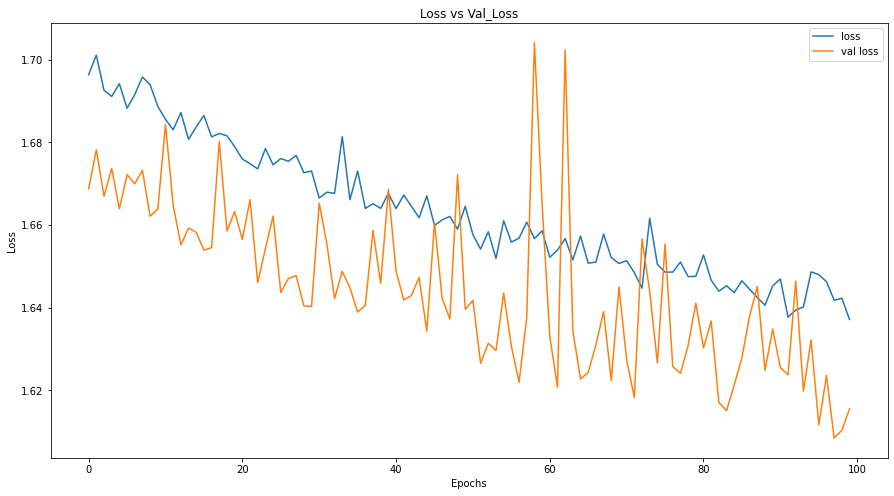

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(hasil_model_2.history['loss'], label = 'loss')
plt.plot(hasil_model_2.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

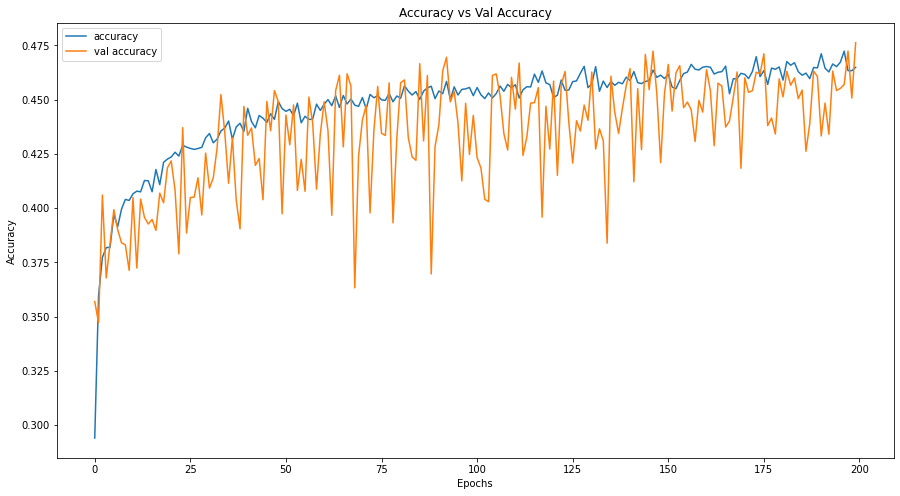

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(hasil_model.history['accuracy'], label = 'accuracy')
plt.plot(hasil_model.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy vs Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### 3.5.2 Cross Validation

In [ ]:
from sklearn.model_selection import KFold

##### PyTorch

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(0)
torch.set_default_dtype(torch.float32)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
class JANet(nn.Module):
    
    def __init__(self, inputs, cells, num_outputs, num_timesteps, output_activation=None):
        super(JANet, self).__init__()
        
        self.inputs = inputs
        self.cells = cells
        self.classes = num_outputs
        self.num_timesteps = num_timesteps
        self.output_activation = output_activation
        
        kernel_data = torch.zeros(inputs, 2 * cells, dtype=torch.get_default_dtype())
        kernel_data = torch.nn.init.xavier_uniform_(kernel_data)
        self.kernel = nn.Parameter(kernel_data)
        
        recurrent_kernel_data = torch.zeros(cells, 2 * cells, dtype=torch.get_default_dtype())
        recurrent_kernel_data = torch.nn.init.xavier_uniform_(recurrent_kernel_data)
        self.recurrent_kernel = nn.Parameter(recurrent_kernel_data)
        
        recurrent_bias = np.zeros(2 * cells)
        # chrono initializer
        recurrent_bias[:cells] = np.log(np.random.uniform(1., self.num_timesteps - 1, size=cells))
        recurrent_bias = recurrent_bias.astype('float32')
        self.recurrent_bias = nn.Parameter(torch.from_numpy(recurrent_bias))
        
        self.output_dense = nn.Linear(cells, num_outputs)
        
    def forward(self, inputs):
        h_state = torch.zeros(inputs.size(0), self.cells, dtype=torch.get_default_dtype()).to(device)
        c_state = torch.zeros(inputs.size(0), self.cells, dtype=torch.get_default_dtype()).to(device)
        
        num_timesteps = inputs.size(1)
        
        for t in range(num_timesteps):
            ip = inputs[:, t, :]
            
            z = torch.mm(ip, self.kernel)
            z += torch.mm(h_state, self.recurrent_kernel) + self.recurrent_bias
            
            z0 = z[:, :self.cells]
            z1 = z[:, self.cells: self.cells * 2]
            
            f = F.sigmoid(z0)
            c = f * c_state + (1. - f) * F.tanh(z1)
            
            h = c
            
            h_state = h
            c_state = c
        
        preds = self.output_dense(h_state)
        
        if self.output_activation is not None:
            preds = self.output_activation(preds)
        
        return preds

In [ ]:
# we define some constants 
import os
import shutil
if not os.path.exists('weights'):
    os.makedirs('weights/')

# Parameters taken from https://arxiv.org/abs/1804.04849
TIME_STEPS = 100
NUM_UNITS = 128
LEARNING_RATE = 0.001
STEPS_PER_EPOCH = 100
NUM_EPOCHS = 10
BATCH_SIZE = 50


CHECKPOINTS_DIR = 'checkpoints_addition_pytorch/'
CHECKPOINT_PATH = CHECKPOINTS_DIR + 'addition_janet.pkl'

if not os.path.exists(CHECKPOINTS_DIR):
    os.makedirs(CHECKPOINTS_DIR)

In [ ]:
# Code reused from https://github.com/batzner/indrnn/blob/master/examples/addition_rnn.py
# with some modifications to run on Tensorflow Eager mode
def batch_generator():
    while True:
        """Generate the adding problem dataset"""
        # Build the first sequence
        add_values = np.random.rand(BATCH_SIZE, TIME_STEPS)

        # Build the second sequence with one 1 in each half and 0s otherwise
        add_indices = np.zeros_like(add_values, dtype='float32')
        half = int(TIME_STEPS / 2)
        for i in range(BATCH_SIZE):
            first_half = np.random.randint(half)
            second_half = np.random.randint(half, TIME_STEPS)
            add_indices[i, [first_half, second_half]] = 1.

        # Zip the values and indices in a third dimension:
        # inputs has the shape (batch_size, time_steps, 2)
        inputs = np.dstack((add_values, add_indices))
        targets = np.sum(np.multiply(add_values, add_indices), axis=1)
        targets = np.expand_dims(targets, -1)

        # center at zero mean
        inputs -= np.mean(inputs, axis=0, keepdims=True)
        
        inputs = inputs.astype('float32')
        targets = targets.astype('float32')

        yield inputs, targets

In [ ]:
y.shape

(15218, 14)

In [ ]:
model = JANet(inputs=X_datagabungan_scaled, cells=NUM_UNITS, num_outputs=14, num_timesteps=TIME_STEPS,output_activation=nn.Softmax())

In [ ]:
loss_fn = nn.MSELoss().to(device)
optimizer = optim.Adam(list(model.parameters()), lr=LEARNING_RATE)

In [ ]:
%%time
model = model.to(device)

best_loss = 100.
generator = batch_generator()

loss_history = []
update_counter = 1



for epoch in range(NUM_EPOCHS):
    print("Epoch # : ", epoch + 1)

    for step in range(STEPS_PER_EPOCH):
        # get batch dataset
        inputs, targets = X_datagabungan_scaled,y
        
        inputs = torch.from_numpy(inputs).to(device)
        targets = torch.from_numpy(targets).to(device)
        
        # remove previous gradients
        optimizer.zero_grad()

        # get gradients and loss at this iteration
        predictions = model(inputs)

        # trainset, not train_loader
        # probably x in your case

        print("Accuracy = {}".format(accuracy))

        loss = loss_fn(predictions, targets)
        
        # Compute the gradients in all the parameters
        loss.backward()
        
        # update the weights
        optimizer.step()

        loss_history.append(loss.item())
        print(update_counter, ":", loss_history[-1])

        update_counter += 1
    print()

    # save the weights
    torch.save(model.state_dict(), CHECKPOINT_PATH)
    
    print("Saving weights")
    print()
print()

Epoch # :  1
1 : 0.15996584296226501


/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
<ipython-input-106-cb85060c1040>:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  preds = self.output_activation(preds)


2 : 0.15134155750274658
3 : 0.13915757834911346
4 : 0.19914114475250244
5 : 0.12617550790309906
6 : 0.19160407781600952
7 : 0.11943142116069794
8 : 0.1655232310295105
9 : 0.17418403923511505
10 : 0.2031581550836563
11 : 0.17210444808006287
12 : 0.14694662392139435
13 : 0.13134430348873138
14 : 0.1756577342748642
15 : 0.1319093108177185
16 : 0.15249848365783691
17 : 0.11914582550525665
18 : 0.1984567642211914
19 : 0.1513853371143341
20 : 0.13954389095306396
21 : 0.18156151473522186
22 : 0.16047383844852448
23 : 0.17514142394065857
24 : 0.180280402302742
25 : 0.14652012288570404
26 : 0.1446705311536789
27 : 0.16174805164337158
28 : 0.15289810299873352
29 : 0.20508168637752533
30 : 0.16035209596157074
31 : 0.21603237092494965
32 : 0.14129334688186646
33 : 0.1763811856508255
34 : 0.17245079576969147
35 : 0.1778157353401184
36 : 0.17126405239105225
37 : 0.11467995494604111
38 : 0.1585034728050232
39 : 0.16381509602069855
40 : 0.1407380998134613
41 : 0.17594598233699799
42 : 0.16017401218414

In [ ]:
predictions

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SoftmaxBackward0>)

In [ ]:
targets

tensor([[1.3621],
        [0.8207],
        [1.2713],
        [0.8946],
        [1.8017],
        [1.5060],
        [0.5749],
        [1.0261],
        [0.7841],
        [1.5078],
        [0.8585],
        [1.1235],
        [1.3480],
        [1.1622],
        [0.6370],
        [0.8735],
        [0.8584],
        [1.4303],
        [1.2023],
        [0.5729],
        [0.8600],
        [1.0263],
        [1.0462],
        [0.9393],
        [1.4557],
        [1.4345],
        [0.3456],
        [0.9922],
        [0.9107],
        [1.0020],
        [0.9936],
        [1.2623],
        [0.8965],
        [1.2293],
        [0.9033],
        [0.7737],
        [1.0512],
        [0.8678],
        [1.6455],
        [1.3420],
        [0.7075],
        [0.7554],
        [1.3991],
        [0.5442],
        [1.3927],
        [1.3460],
        [0.6998],
        [1.6458],
        [1.3274],
        [0.9816]])